In [62]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv('xx.csv')
print len(df)

ss_dict      = {}
ss_dict['H'] = 'a-Helix'
ss_dict['B'] = 'B-Bridge'
ss_dict['E'] = 'Strand'
ss_dict['G'] = '3-Helix'
ss_dict['I'] = '5-Helix'
ss_dict['T'] = 'Turn'
ss_dict['S'] = 'Bend'
ss_dict['C'] = 'Coil'

def classify_ss(ss):
    try:
        ss_category = ss_dict[ss]
    except KeyError:
        ss_category = ss_dict['C']
    return(ss_category)

df['Cys1_SS_cat'] = df['Cys1_SS'].apply(classify_ss)
df['Cys2_SS_cat'] = df['Cys2_SS'].apply(classify_ss)

19605


#### Analyse the distribution of side chain dihedral angles: Intro
The resultant cystine residue from the formation of the covalent disulfide bond between the thiol groups of two cysteine side chains is comprised of five dihedral angles. Based on X-ray structures we look at the distribution of these angles (X1, X2 and X3) to define their different conformations.

/Users/David/coding/coding/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/David/coding/coding/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/David/coding/coding/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

0         75
1        -90
2        -80
3        105
4         70
5         95
6         85
7         95
8       -105
9        -75
10      -100
11       -85
12        80
13       -95
14       100
15       105
16        80
17        75
18        75
19       -90
20       -80
21        90
22       -95
23       -85
24       -85
25       -90
26      -135
27       -95
28       -95
29       100
        ... 
19575   -105
19576   -100
19577     95
19578   -110
19579    105
19580     75
19581     70
19582     80
19583     75
19584     60
19585    110
19586     90
19587    -90
19588    105
19589     90
19590    -85
19591    -90
19592    -95
19593    -70
19594    -85
19595   -100
19596    -75
19597    -90
19598   -110
19599    -85
19600     95
19601     90
19602     65
19603     95
19604    -75
Name: x3, Length: 19605, dtype: int64


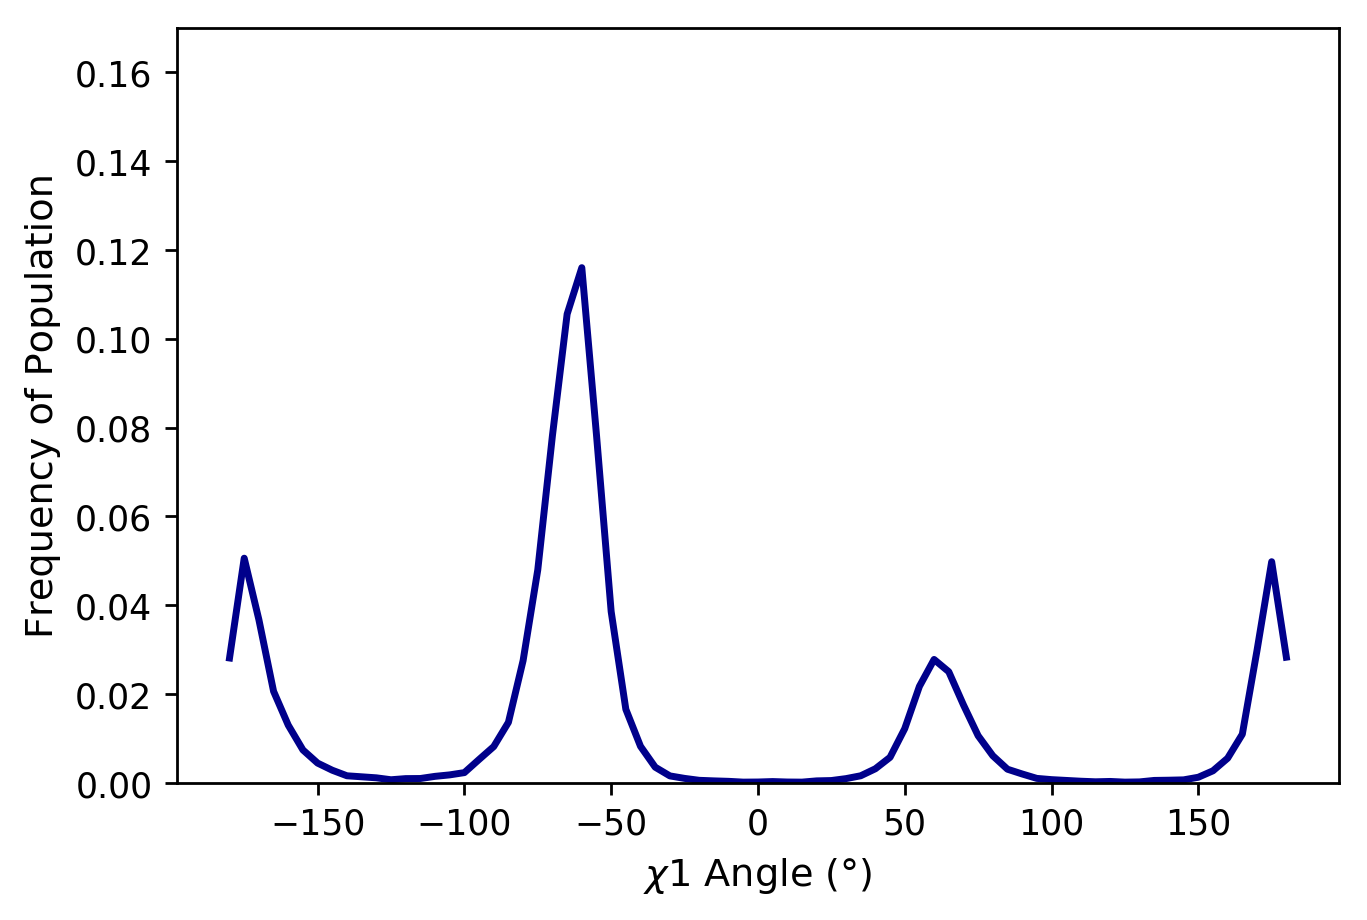

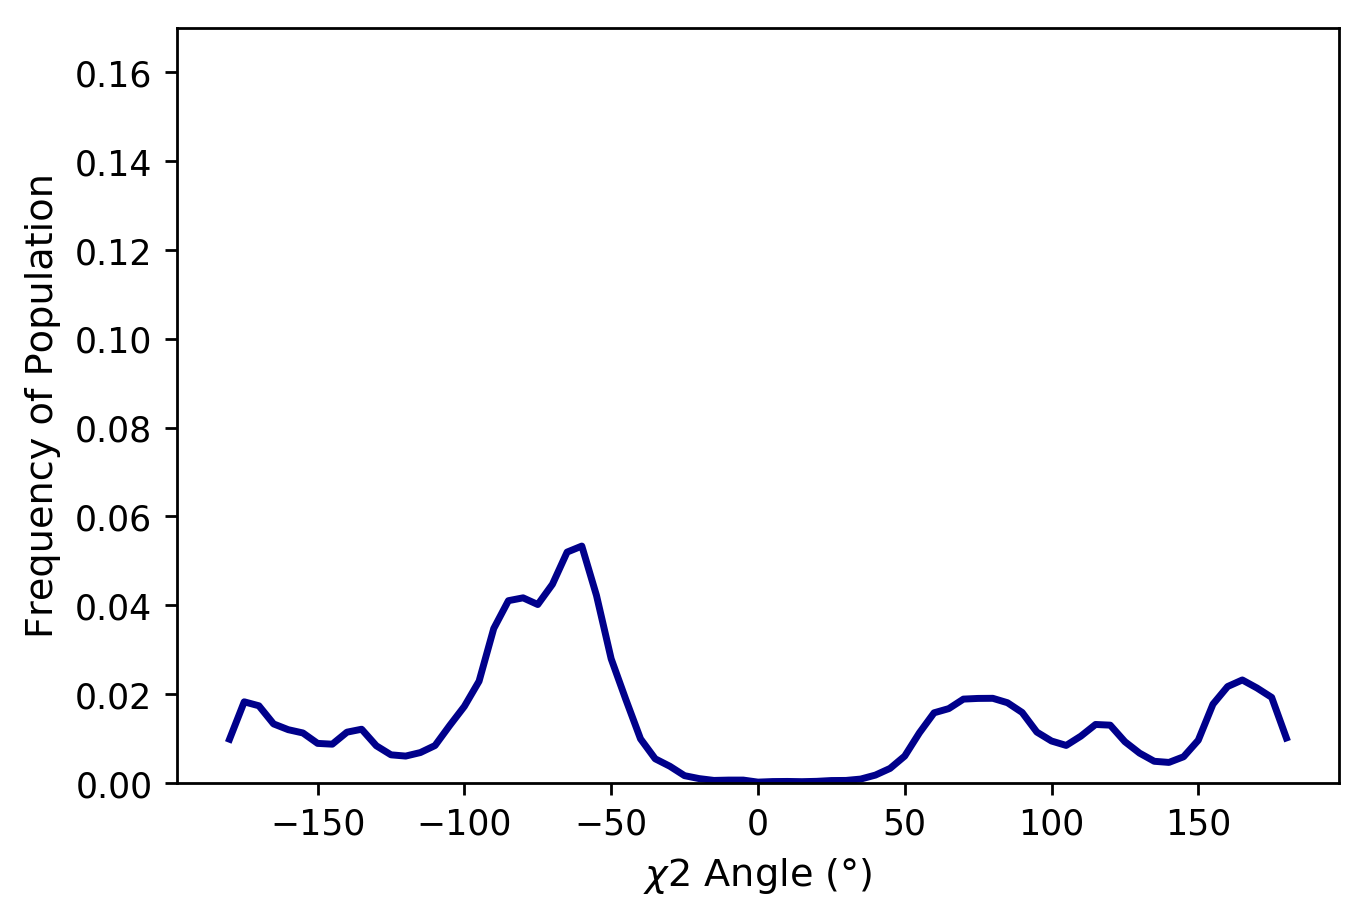

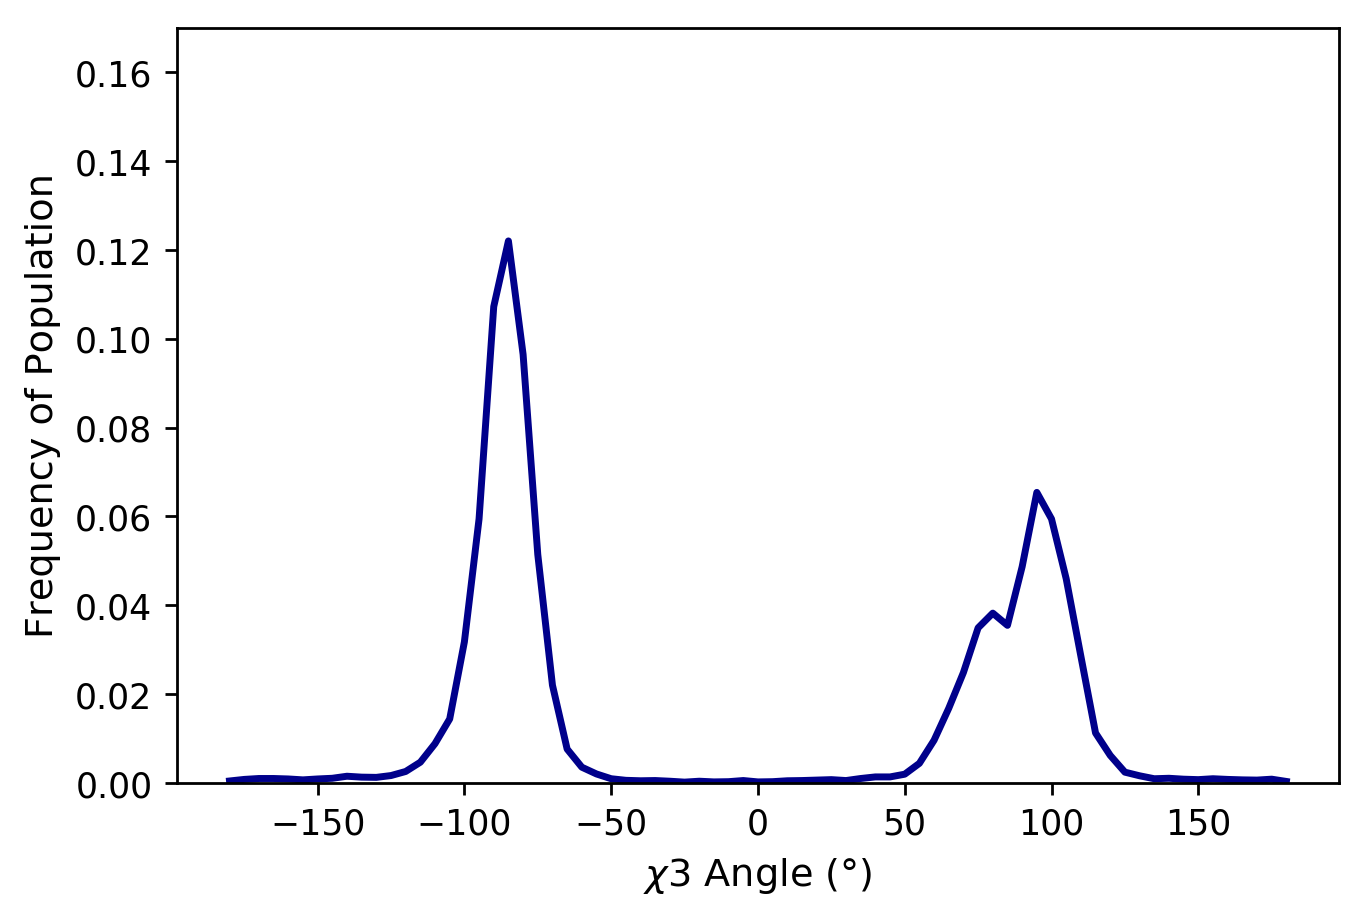

In [64]:
import collections
import operator

############################
# Round all five cystine X angles to nearest 5 degress
#############################


config = df[['Cys1_x1','Cys1_x2','x3','Cys2_x2','Cys2_x1']]
config['Cys1_x1'] = config['Cys1_x1'].map(lambda Cys1_x1: int(5 * round(float(Cys1_x1)/5)))
config['Cys2_x1'] = config['Cys2_x1'].map(lambda Cys2_x1: int(5 * round(float(Cys2_x1)/5)))

config['Cys1_x2'] = config['Cys1_x2'].map(lambda Cys1_x2: int(5 * round(float(Cys1_x2)/5)))
config['Cys2_x2'] = config['Cys2_x2'].map(lambda Cys2_x2: int(5 * round(float(Cys2_x2)/5)))

config['x3'] = config['x3'].map(lambda x3: int(5 * round(float(x3)/5)))
print config['x3']
#config = config.loc[config['x3'].isin(range(0,180))]
#########################################
## Looking at total X angle distribution so combine X1 / X1B and X2 / X2B
#########################################
x1 = config['Cys1_x1'].tolist() + config['Cys2_x1'].tolist()
x2 = config['Cys1_x2'].tolist() + config['Cys2_x2'].tolist()
x3 = config['x3'].tolist()
##########################################################
## Use collections to counter the frequency of each angle
###########################################################

x1_frequency = collections.Counter(x1)
x2_frequency = collections.Counter(x2)
x3_frequency = collections.Counter(x3)

########################################
# Sort dictionary in orderered fashion (smallest to largest)
###########################################
ordered_x1_frequency = sorted(x1_frequency.items(), key=operator.itemgetter(0))
ordered_x2_frequency = sorted(x2_frequency.items(), key=operator.itemgetter(0))
ordered_x3_frequency = sorted(x3_frequency.items(), key=operator.itemgetter(0))


################################
# Define each axis
################################
x1_axis = [(_[0]) for _ in ordered_x1_frequency]
x2_axis = [(_[0]) for _ in ordered_x2_frequency]
x3_axis = [(_[0]) for _ in ordered_x3_frequency]

#########################################################################
# Convert the number of angles to a frequency by dividing by total angles
#########################################################################
x1_frequency = [(float(_[1]) / float(len(x1))) for _ in ordered_x1_frequency]
x2_frequency = [(float(_[1]) / float(len(x2))) for _ in ordered_x2_frequency]
x3_frequency = [(float(_[1]) / float(len(x3))) for _ in ordered_x3_frequency]



##########################################
# Start to generate line graphs'
#########################################
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250
import matplotlib.pyplot as plt

import numpy as np



#######################################
# Create X1 graph
#######################################
plt.plot(x1_axis,x1_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(r"$\chi$1 Angle ($\degree$)", fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes = plt.gca()
############################
# Set y_lim to be consistent with other graphs
############################
axes.set_ylim([0,0.17])
plt.savefig('x1.png')
plt.show()

#############################
# Create X2 graph
#############################
plt.plot(x2_axis,x2_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(r"$\chi$2 Angle ($\degree$)", fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes = plt.gca()
axes.set_ylim([0,0.17])
plt.savefig('x2.png')
plt.show()

###############################
# Creat X3 graph
###############################
plt.plot(x3_axis,x3_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(r"$\chi$3 Angle ($\degree$)", fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes =plt.gca()
axes.set_ylim([0,0.17])
plt.savefig('x3.png')
plt.show()

#### Cystine dihedral distribution: Results
In agreement with previous analysis, can see that X1 adopts the 'Gauche-, Gauche+ and Trans' conformations with a very narrow distribution. Therefore defined as:
    Gauche+ (+60) = +30 to +90
    Gauche- (-60) = -90 to -30
    Trans   (180) = 150 to 210
    
X2 also adopts these conformations, however a greater distribution is observed. Therefore the following ranges were used for classificaiton
    Gauche+ (+60) = +30 to +120
    Gauche- (-60) = -120 to -30
    Trans   (180) = 150 to 210 

X3 angle distribution follows the previously identified 'Right Handed (+90)' or 'Left Handed (-90)'
        Right Handed (+90) =   +60 to +120
        Left Handed  (-90) =  -120 to -60


#### Frequency of Configurations: Intro
Based on the definitions above, there is a possible 90 configurations a cystine can adopt when considering all five X angles (X1, X2, X3, X2, X1).
Below calculates the frequency of those configurations
If a disulfide had a dihedral angle ouf of the defined ranges above it was excluded from analysis

In [65]:
import itertools
import os,sys
import shutil
import numpy
import math 

##########################################################
# GENERATE A LIST OF ALL 90 THEORETICAL CONFIGURATIONS
# X1 and X2 angles can be Gauche+, Gauche- or Trans
# X3 angles can be +90 or -90
# Over 90 theoretical configurations
# Store in a list as 'configurations'
#########################################################
a = 60
b = -60
c = 180
d = -90
e = 90

import string
exclude        = set(string.punctuation)
dihedralsx     = numpy.empty(shape=(5,1))
possible       = [[a,b,c],[a,b,c],[d,e],[a,b,c],[a,b,c]]
configurations = list(itertools.product(*possible))
unique         = []
for value in configurations:
      if value[::-1] in unique:
            continue
      unique.append(value)
configurations = unique

###############################################################
### Round all of the dihedral X angles to suitable conformation
# X1 angles are +/- 30 degrees of ,+60,-60 or 180
#                          +60 = +30 to +90
#                          -60 = -90 to -30 
#                          180 = 150 to 210
#
# X2 angles show more distribution (refer to previous figure) Therefore are:
#                          +60 = +30 to + 120
#                          -60 = -120 to -30
#                          180 =  150 to 210
#
# X3 angles are either +90 (Right Handed) or -90 (Left Handed)
#                          +90 = +60 to 120
#                          -90 = -120 to -60
################################################################

#df = df.loc[(df['seqlength'] <= 200)]
#df = df.loc[df['chain1'] == df['chain2']]
dihedrals = df[['Cys1_x1','Cys1_x2','x3','Cys2_x2','Cys1_x1']]

#################################################################
# Define the rounding functions and apply to angles
###################################################################
def x1_rounded(x1):
    x1 = float(x1)
    if (x1 <=  90) & (x1 >= 30):
        x1= 60
    if (x1 >= -90)  & (x1 <= -30):
        x1 = -60   
    if (x1 <=  180) & (x1 >= 150):
        x1= 180
    if (x1 >= -180) & (x1 <= -150):
        x1=180
    return(x1)

def x2_rounded(x2):
    x2 = float(x2)
    if (x2 <=  130) & (x2 >= 30):
        x2= 60
    if (x2 >= -130) & (x2 <= -30):
        x2 = -60   
    if (x2 <=  180) & (x2 >= 150):
        x2= 180
    if (x2 >= -180) & (x2 <= -150):
        x2=180
    return(x2)

def x3_rounded(x3):
    x3 = float(x3)
    if (x3  <=  130)  & (x3 >= 60):
        x3   = 90
    if (x3  >=  -130) & (x3 <= -60):
        x3   = -90
    return(x3)
        
df['Cys1_x1']  = df['Cys1_x1'].apply(x1_rounded)
df['Cys2_x1']  = df['Cys2_x1'].apply(x1_rounded)
df['Cys1_x2']  = df['Cys1_x2'].apply(x2_rounded)
df['Cys2_x2']  = df['Cys2_x2'].apply(x2_rounded)
df['x3'     ]  = df['x3'    ].apply(x3_rounded)

###########################################################################################
# Count the number of each configuration
# Have to consider assymetical configuraitons (x1,x2,x3,x2',x1' ==  x1',x2',x3,x2,1)
##############################################################################################

def configuration_count(config):
    config         = list(config)
    forward_config = len(df.loc[(df['Cys1_x1'] == float(config[0])) & (df['Cys1_x2'] == float(config[1]))  & (df['x3'] == float(config[2])) & (df['Cys2_x2'] == float(config[3]))& (df['Cys2_x1'] == float(config[4])) ]) #& df['x2'] == float(config[1])])
    
    ###########################################################################################
    # If configuration IS NOT symmetrical, have to consider the reverse order (Cys2 - Cys1)
    #############################################################################################
    if config != config[::-1]:
        reverse_config =  len(df.loc[(df['Cys2_x1'] == float(config[0])) & (df['Cys2_x2'] == float(config[1]))  & (df['x3'] == float(config[2])) & (df['Cys1_x2'] == float(config[3]))& (df['Cys1_x1'] == float(config[4])) ])
        forward_config = reverse_config + forward_config
    return(forward_config)

#####################################################################
# Separate configurations based on the x3 angle (either +90 or -90)
# Store in dictionary
########################################################################
plus_x3_configuration_dict  = {}
minus_x3_configuration_dict = {}
for config in configurations:
    if list(config)[2] == 90:
        plus_x3_configuration_dict[config] = configuration_count(config)
    if list(config)[2] == -90:
        minus_x3_configuration_dict[config] = configuration_count(config)

for _ in minus_x3_configuration_dict:
    print _,minus_x3_configuration_dict[_]
for _ in plus_x3_configuration_dict:
    print _,plus_x3_configuration_dict[_]
                
plus_x3_ordered_configuration  = sorted(plus_x3_configuration_dict.items(),  key=operator.itemgetter(0))
minus_x3_ordered_configuration = sorted(minus_x3_configuration_dict.items(), key=operator.itemgetter(0))



total_lefthanded = sum((item) for item in minus_x3_configuration_dict.values())
total_righhanded = sum((item) for item in plus_x3_configuration_dict.values())
total_disulfides = total_lefthanded + total_righhanded
print 'Total Number of Disulfides:',len(df)
print 'Total Number of Disulfides in Defined Configurations for Structural Analysis:',total_disulfides

(-60, 180, -90, 180, -60) 26
(180, 180, -90, 180, 180) 1184
(60, 60, -90, 180, 60) 1
(60, 60, -90, -60, 60) 33
(-60, -60, -90, 180, -60) 890
(-60, 60, -90, 180, -60) 6
(60, -60, -90, 60, -60) 10
(60, 60, -90, -60, 180) 26
(180, 60, -90, -60, 180) 155
(-60, -60, -90, 180, 180) 173
(180, -60, -90, -60, 180) 43
(180, 60, -90, 180, 180) 24
(60, -60, -90, -60, 60) 23
(-60, 180, -90, 60, 180) 38
(60, 180, -90, 180, -60) 38
(-60, -60, -90, -60, -60) 3376
(60, 60, -90, 60, -60) 51
(-60, -60, -90, 60, 180) 242
(60, 180, -90, 180, 180) 7
(-60, 180, -90, 180, 180) 45
(-60, 60, -90, -60, -60) 71
(60, 60, -90, 60, 60) 0
(60, 180, -90, 180, 60) 2
(60, -60, -90, 180, 180) 24
(-60, 60, -90, -60, 180) 9
(60, 60, -90, 180, 180) 1
(60, -60, -90, -60, -60) 305
(-60, 60, -90, 60, 180) 7
(60, 60, -90, -60, -60) 125
(60, 60, -90, 180, -60) 13
(180, -60, -90, 180, 180) 12
(-60, 60, -90, 60, -60) 0
(60, 180, -90, -60, 180) 3
(-60, -60, -90, -60, 180) 1193
(-60, 60, -90, 180, 180) 4
(180, 60, -90, 60, 180) 36
(

#### Generate Configuration Frequency Graphs
Generate a 3D plot tha shows the frequency of population for each configuration

In [61]:

from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline
from pylab import rcParams
# rcParams['figure.figsize'] = 7, 8
##############################################################
# Two Figures:
#       fig  = x3 of -90
#       fig2 = x3 of +90
##############################################################

fig  = plt.figure(dpi = 300)
# fig2 = plt.figure()
ax1  = fig.add_subplot(112, projection='3d' )
ax2  = fig.add_subplot(122, projection='3d')

#############################################################################################
# Define the positions on the grid for x-axis and y-axis to plot the frequency of configuraitons 
# (Half the diaganol grid)
##############################################################################################
xpos = []
ypos = []

i = 0
while i < 9:
    xpos = xpos + [i for _ in range(i,9)]
    ypos = ypos + [_ for _ in range(i,9)]
    i    = i +1
zpos = [0 for _ in range(len(minus_x3_ordered_configuration))]


num_elements = len(xpos)
dx           = np.ones(45)
dy           = np.ones(45)
dx           = [0.8 for _ in range(len(minus_x3_ordered_configuration))]
dy           = [0.8 for _ in range(len(minus_x3_ordered_configuration))]
minus_dz     = [_[1] for _ in minus_x3_ordered_configuration]
plus_dz      = [_[1] for _ in plus_x3_ordered_configuration]

#####################################################################################
# Convert dz from total number to frequency, by dividing by total number of disulfides 
# in defined configurations. Then set the axis limits based on the maximum frequency observed
# (know it will be in the minus_90 configurations)
#####################################################################################
minus_dz = [float(_)/float(total_disulfides) for _ in minus_dz]
print minus_dz
plus_dz  = [float(_)/float(total_disulfides) for _ in plus_dz]
maximum_frequency = max(minus_dz)
ax1.set_zlim([0,0.3 + 0.05])
ax2.set_zlim([0,0.3 + 0.05])


#################################
# Define x-tick and y-tick labels
#################################
xy_tick_labels = ["-60,-60","-60,60","-60,180","60,-60","60,60",'60,180','180,-60,',"180,60",'180,180']

ax1.set_title(r"$\chi$3 = -90$\degree$", loc = 'center')
ax1.set_zlabel("Frequency",fontsize = 13)


plt.xticks(np.arange(min(xpos), max(xpos)+1, 1.0),xy_tick_labels,rotation=45)
plt.yticks(np.arange(min(ypos)+0.5, max(ypos)+1, 1.0),xy_tick_labels,rotation=-75)




ax2.set_title(r"$\chi$3 = +90$\degree$", loc = 'center')
ax2.set_zlabel("Frequency",fontsize = 13)
ax2.set_xlabel(r"Cys1 ($\chi$1,$\chi$2)($\degree$)",fontsize = 10, labelpad =25)
ax2.set_ylabel(r"Cys2 ($\chi$1,$\chi$2)($\degree$)",fontsize = 10, labelpad =25)

ax1.set_xlabel(r"Cys1 ($\chi$1,$\chi$2)($\degree$)",fontsize = 10, labelpad =25)
ax1.set_ylabel(r"Cys2 ($\chi$1,$\chi$2)($\degree$)",fontsize = 10, labelpad =25)


ax1.bar3d(xpos, ypos, zpos, dx, dy, minus_dz, color='blue')
ax2.bar3d(xpos, ypos, zpos, dx, dy, plus_dz, color='blue')
# plt.savefig('peptide+90_config.png', dpi=300)
# 


ValueError: num must be 1 <= num <= 1, not 2

<Figure size 1800x1200 with 0 Axes>

### Major differences between X3 +90 and X3 -90 (frequency of x2 angle matchings, x1 angle matchings?

### Ramachandran Plots of Individual Configurations

In [8]:
import math
import os
import sys
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250
import matplotlib.pyplot as plt
import numpy as np
from Bio import PDB
from matplotlib import colors
import matplotlib as mpl
###########################################################################
# Below function will create Ramachandran plots to show distribution of backbone angles
# The code is adapted from Peter Cock - https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/ramachandran/
# Code also adapted from PyRama - https://github.com/gerdos/PyRAMA
###########################################################################
rama_preferences = {
            "General": {
            "file": "./rama_data/pref_general.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.0005, 0.02, 1],
        },
           "Second": {
            "file": "./rama_data/pref_general.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.0005, 0.02, 1],
        }
    }
rama_pref_values = {}
for key, val in rama_preferences.items():
        rama_pref_values[key] = np.full((360, 360), 0, dtype=np.float64)
        with open(val["file"]) as fn:
            for line in fn:
                if not line.startswith("#"):
                    # Preference file has values for every second position only
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])
normals = {}
outliers = {}
for key, val in rama_preferences.items():
        normals[key]  = {"x": [], "y": []}
        outliers[key] = {"x": [], "y": []}   
        
def ramachandran(cys1_phi,cys1_psi,cys2_phi,cys2_psi,config):
    """
    Main calculation and plotting definition
    :param file_name_list: List of PDB files to plot
    :return: Nothing
    """
    for idx, (key, val) in enumerate(sorted(rama_preferences.items(), key=lambda x: x[0].lower())):
        plt.subplot(1, 2, idx + 1)
        #plt.subplot(1,2,1)
        plt.imshow(rama_pref_values[key], cmap=rama_preferences[key]["cmap"],
                   norm=colors.BoundaryNorm(rama_preferences[key]["bounds"], rama_preferences[key]["cmap"].N),
                   extent=(-180, 180, 180, -180))
        if idx == 0:
            plt.scatter(cys1_phi, cys1_psi,s = 6)
        if idx ==1:
            plt.scatter(cys2_phi, cys2_psi,s = 6, color = 'red')
        
        plt.xlim([-180, 180])
        plt.ylim([-180, 180])
        plt.plot([-180, 180], [0, 0], color="black")
        plt.plot([0, 0], [-180, 180], color="black")
        plt.locator_params(axis='x', nbins=7)
        plt.xlabel(r'$\phi$')
        plt.ylabel(r'$\psi$')
        plt.grid()
        plt.title(config,size=10)
        
        plt.tight_layout()
    plt.savefig(str(config)+'rama.png')
    plt.show()
    

In [9]:
###########################################################################################
# The re_write columns is for the 'reverse configuraiton' dataframes
# where the config = x1b,x2b,x3,x2,x1
# By reversing the column names can easily then append to the forward dataframe for analysis
############################################################################################
def rewrite_columns(dataframe):
    dataframe.columns = dataframe.columns.str.replace("Cys2", "Cys3")
    dataframe.columns = dataframe.columns.str.replace("Cys1", "Cys2")
    dataframe.columns = dataframe.columns.str.replace("Cys3", "Cys1")
    return (dataframe)

###################################################################
# Function to return the pandas dataframe for the desired configuration
####################################################################

configuration_dataframe_dict = {}
def configuration_dataframe_return(config):
    config = list(config)
    forward_config = pd.DataFrame(columns = list(df))
    reverse_config = pd.DataFrame(columns = list(df))
    ##############################################################################################################
    # Forward Configuration:
    # Dihedrals are labelled as X1,X2,X3,X2b,X1b:
    # The forward configuration is when this order matches the configuration
    # For example: Config == -180,-60,-90,-60,-60: 
    # Search the database and get any cystine residues where we observe that configuration
    # However the reverse of the CONFIG: -60,-60,-90,-60,-180 is also the same:
    # Therefore have to search where X1b, X2B, X3, X2, X1 == Config
    #
    # IF THE CONFIGURATION IS IDENTICAL: -60,-60,-90,-60,-60 we do not search for the reverse configuration as then
    # the dataframe would be doubled
    ###############################################################################################################
    forward_config = (df.loc[
                        (df['Cys1_x1'] == float(config[0])) & 
                        (df['Cys1_x2'] == float(config[1])) & 
                        (df['x3'     ] == float(config[2])) & 
                        (df['Cys2_x2'] == float(config[3])) & 
                        (df['Cys2_x1'] == float(config[4])) 
                       ])
    
    ###################################################################################
    # If the configuration IS NOT symmetrical, then search for the reverse configuration
    # x1b,x2b,x3,x2,x1
    ###################################################################################
    if config != config[::-1]:
        reverse_config = (df.loc[
                             (df['Cys2_x1'] == float(config[0])) & 
                             (df['Cys2_x2'] == float(config[1])) & 
                             (df['x3'     ] == float(config[2])) & 
                             (df['Cys1_x2'] == float(config[3])) & 
                             (df['Cys1_x1'] == float(config[4])) 
                            ])
        ###############################################################################################
        # Apply the rewrite_columns function so Cys1 and Cys2 properties match with that of forward_config
        ################################################################################################
        reverse_config = rewrite_columns(reverse_config)

        #################################################################################
        # Append the two dataframes together
        #################################################################################
        forward_config = pd.concat([forward_config, reverse_config])
    
    return(forward_config)

for config in configurations:
    configuration_dataframe_dict[config] = configuration_dataframe_return(config)

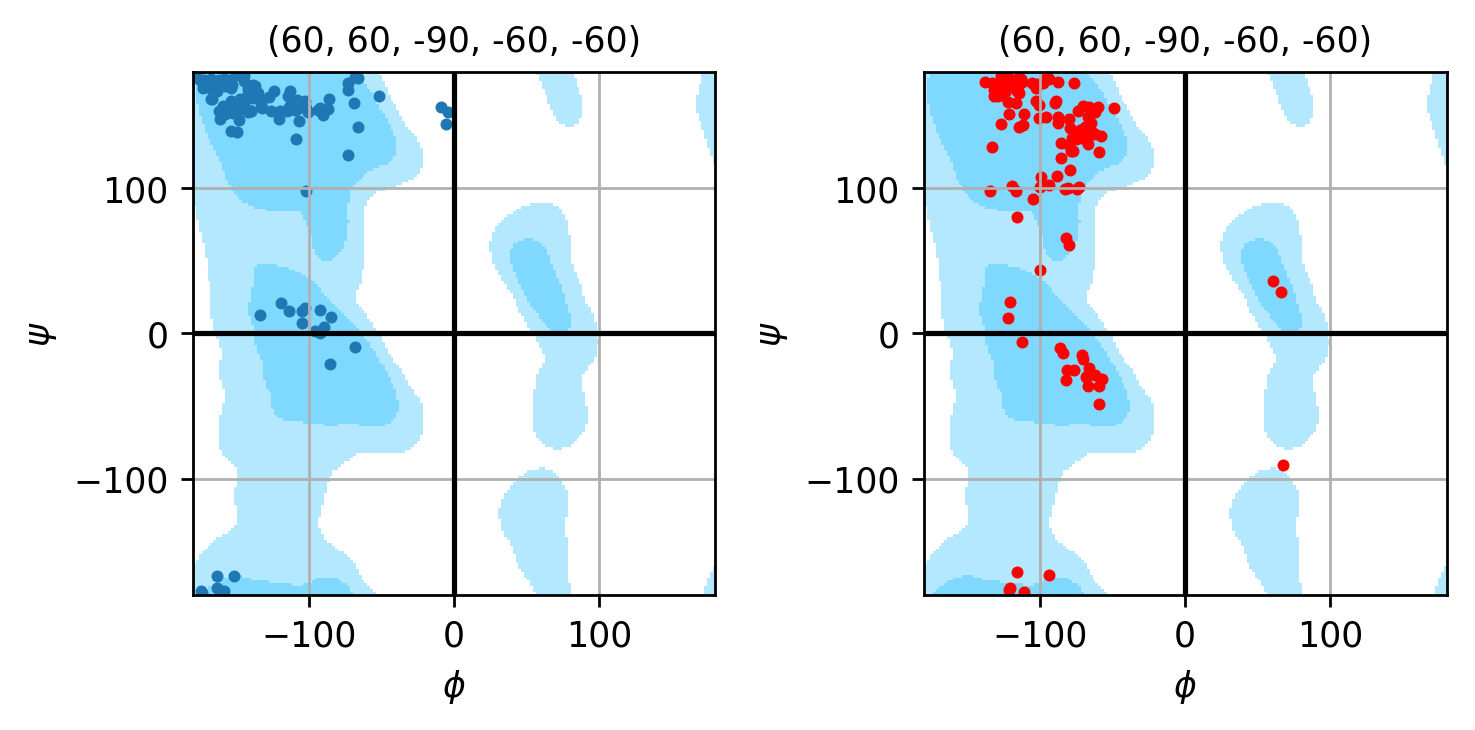

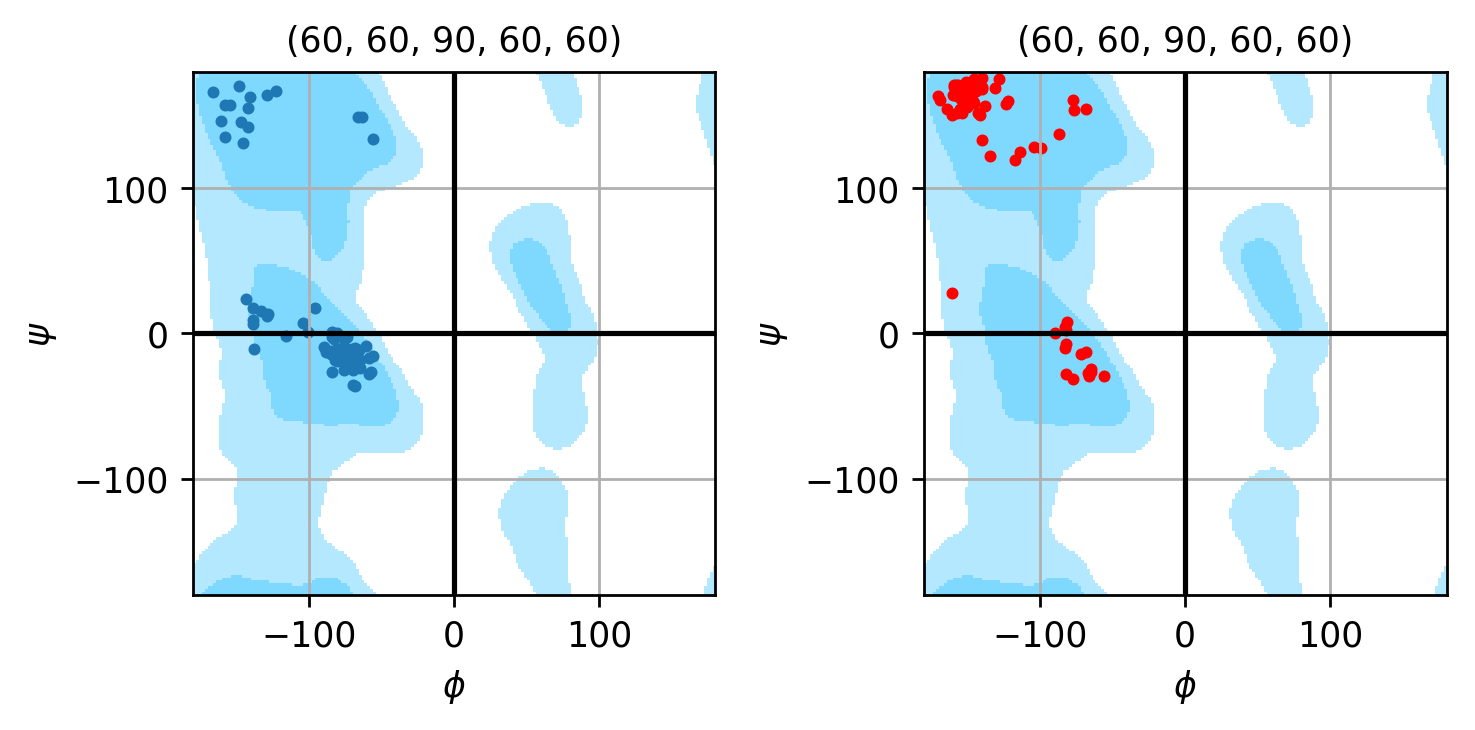

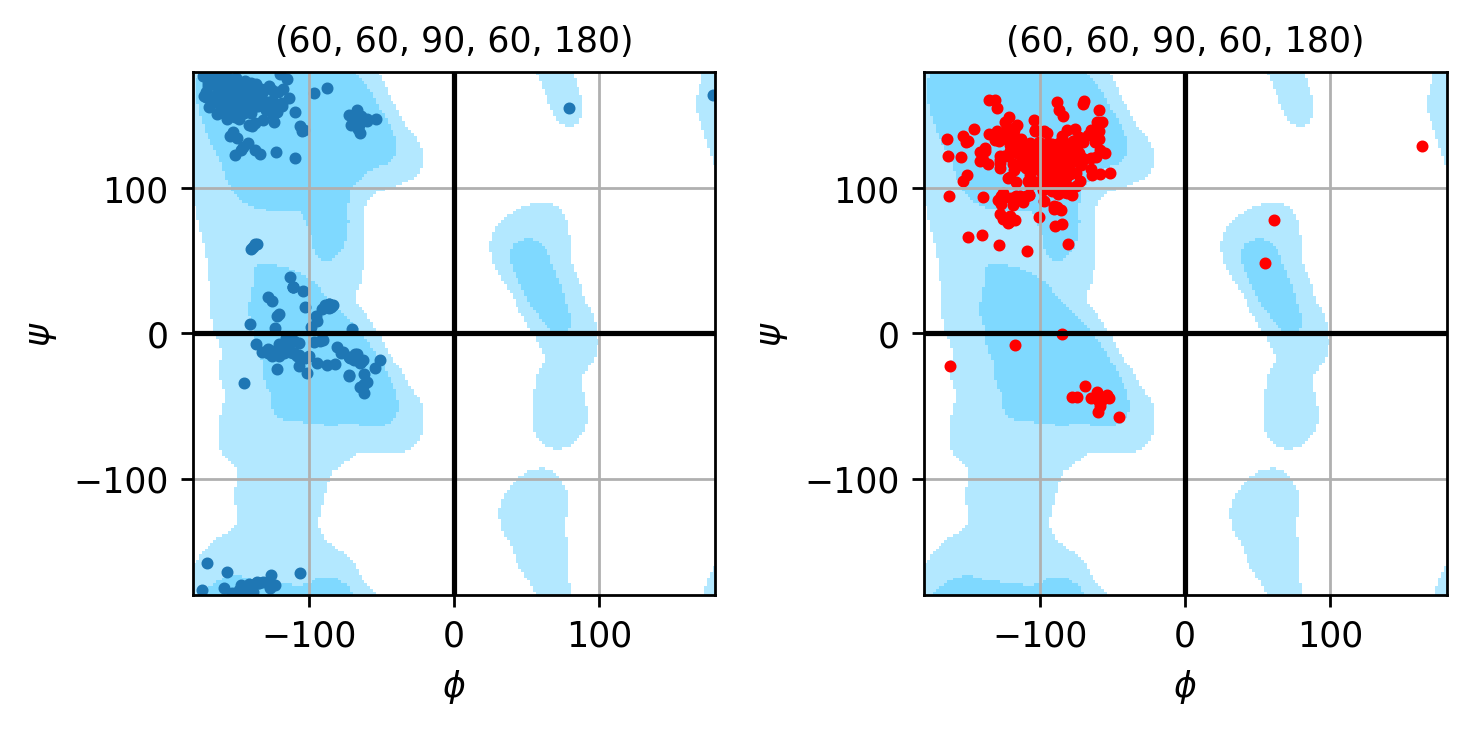

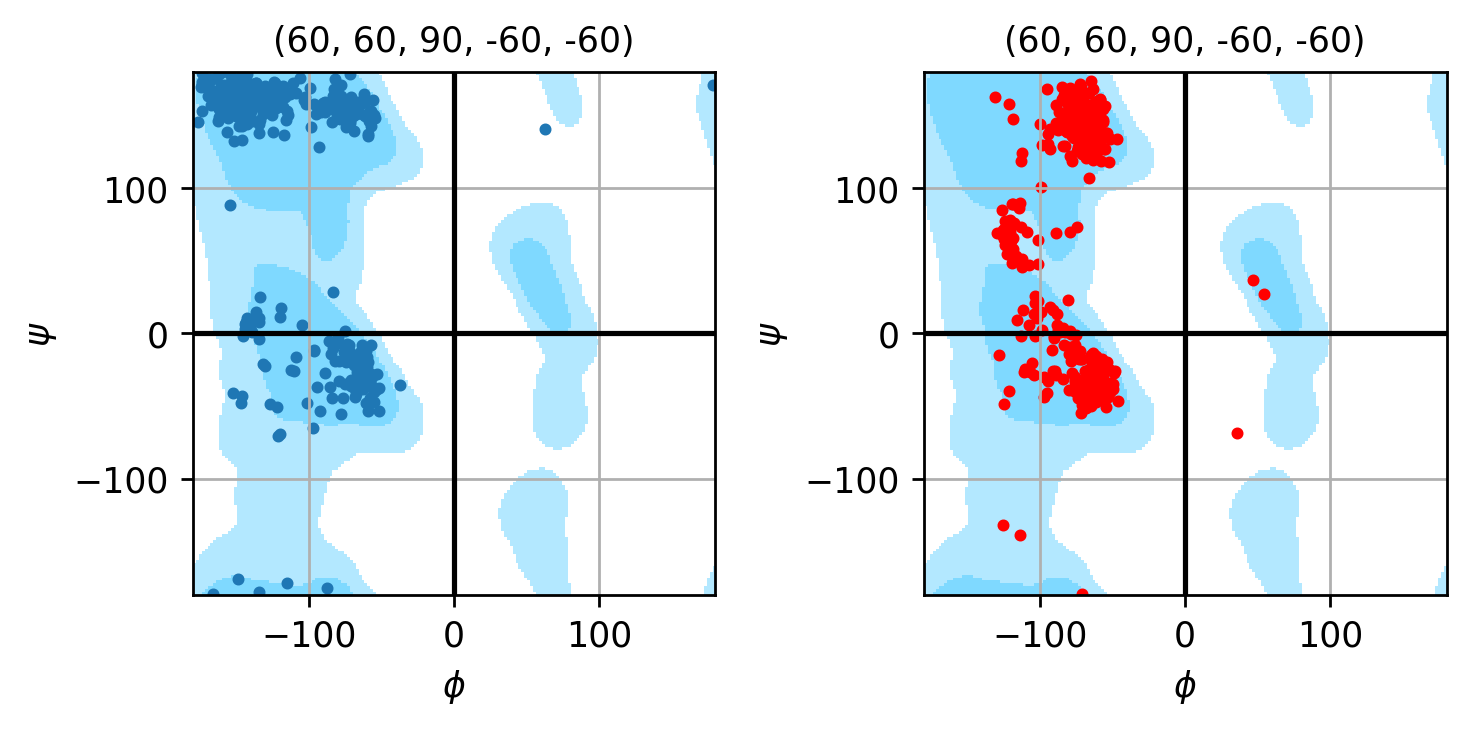

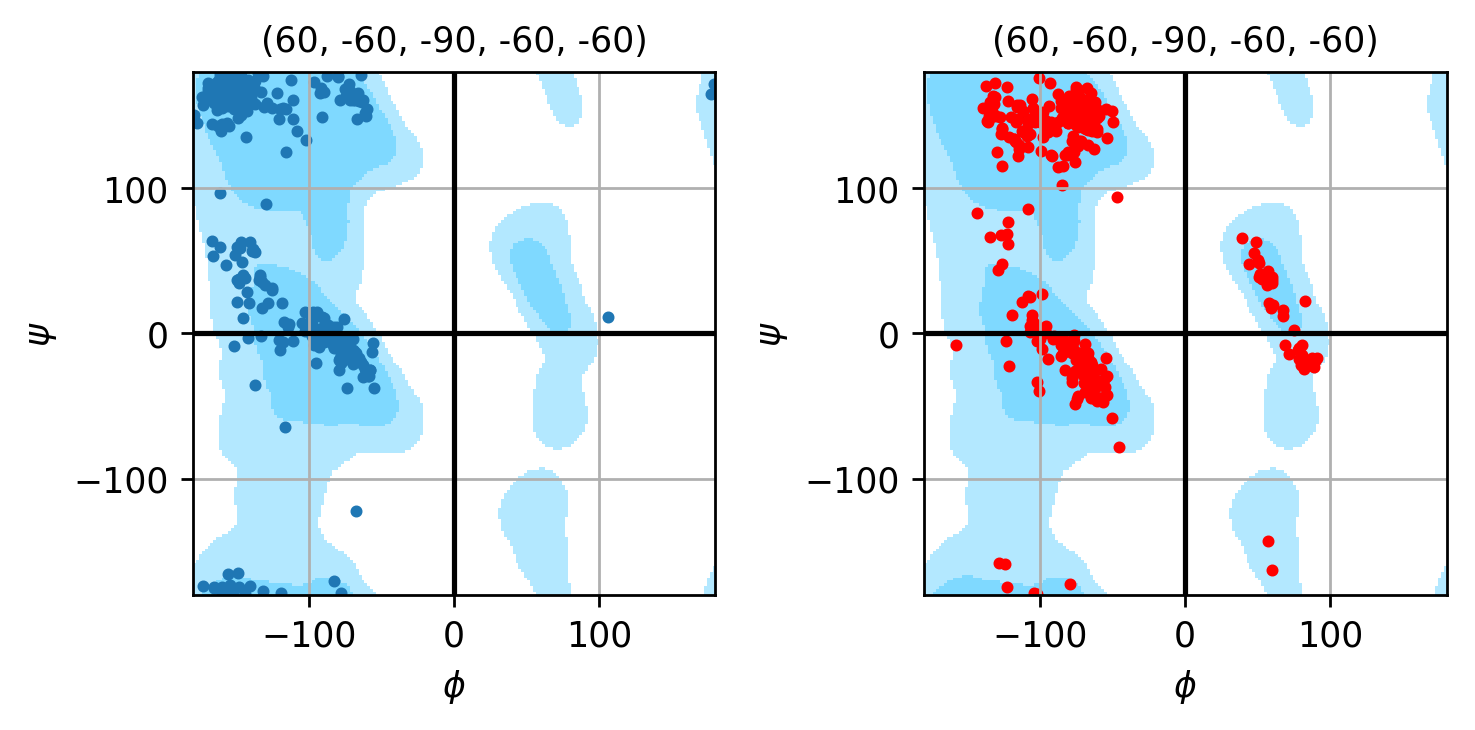

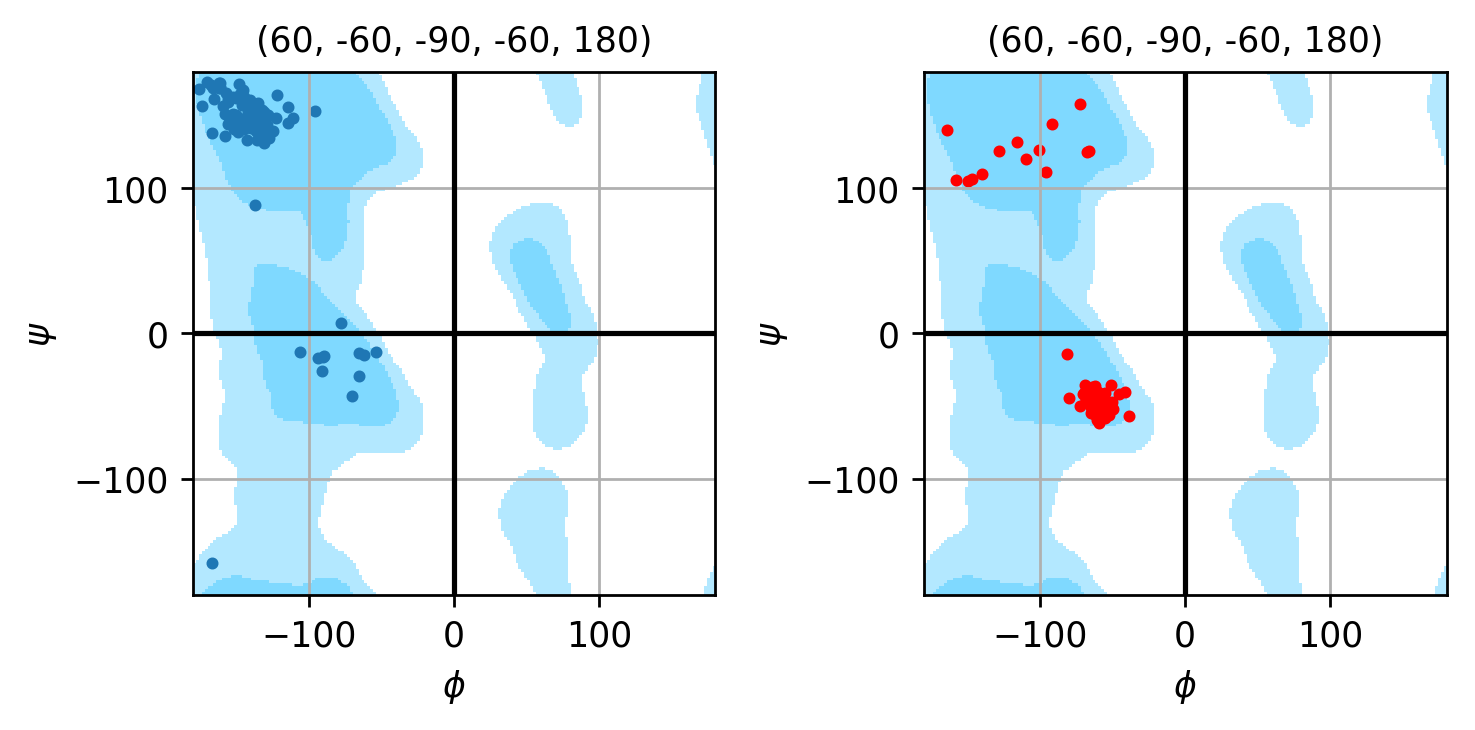

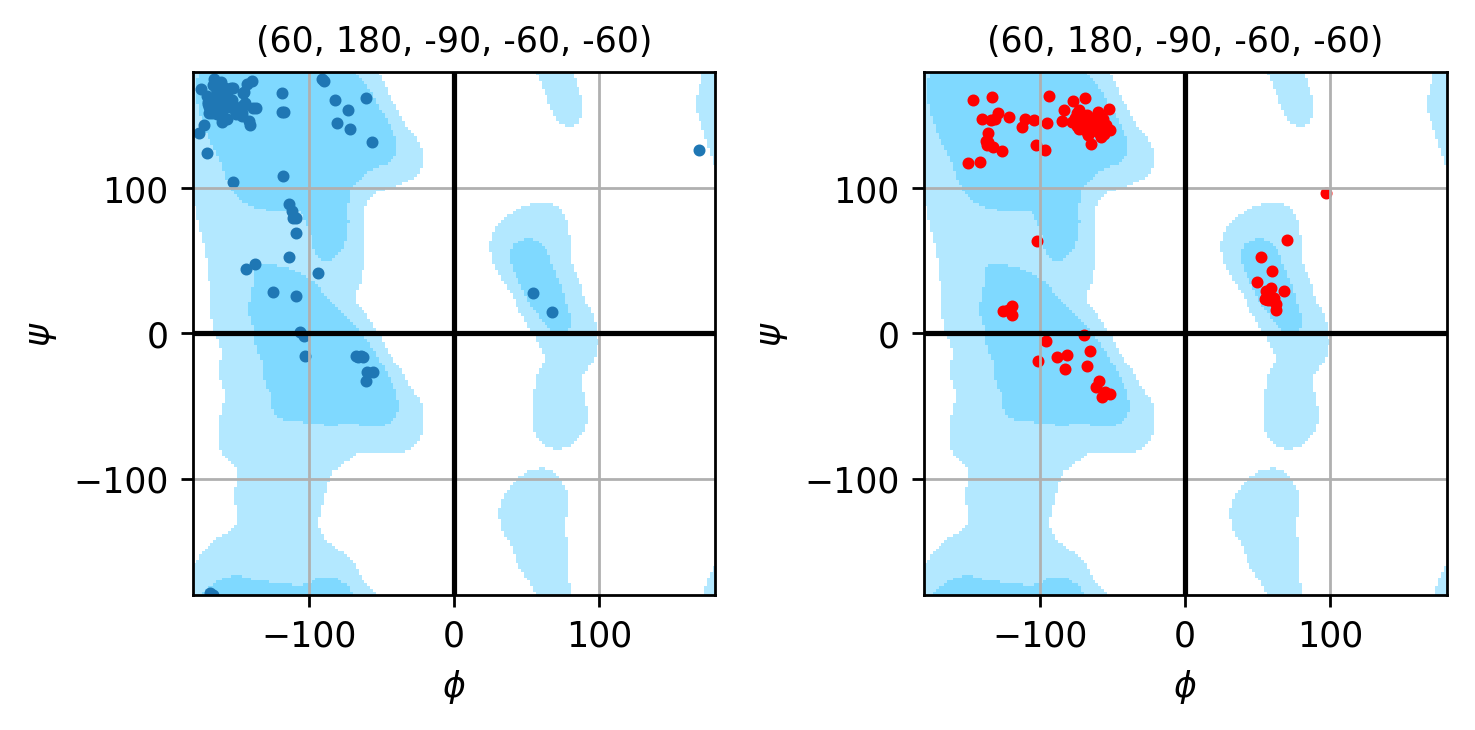

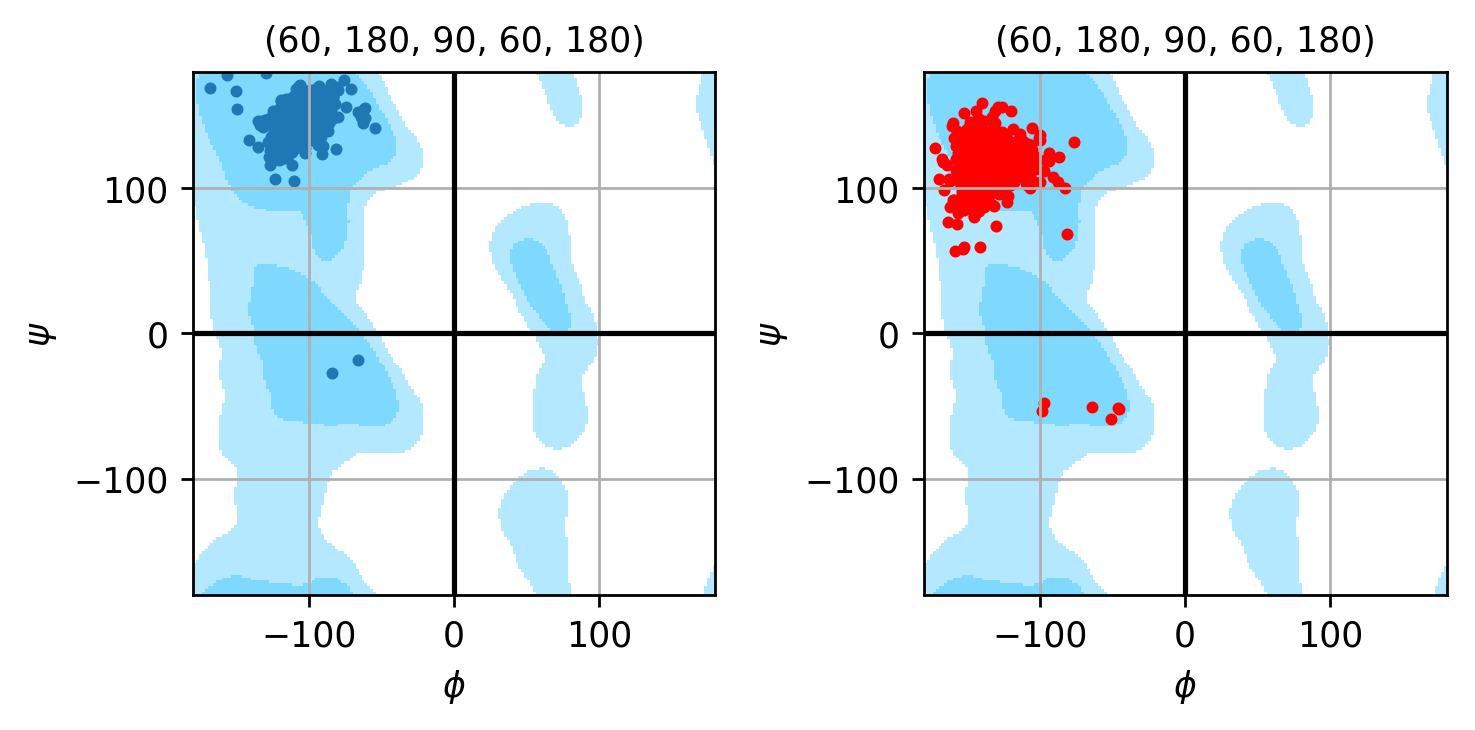

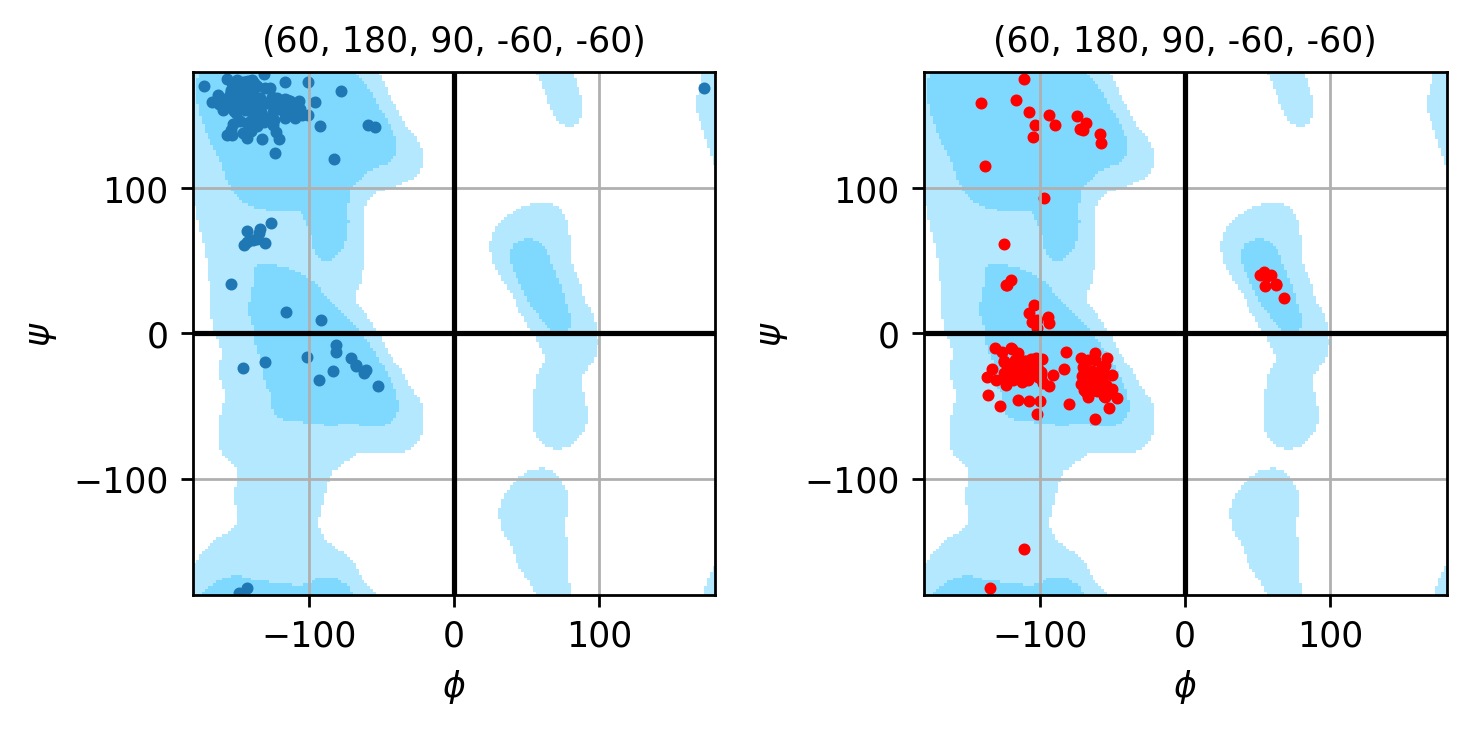

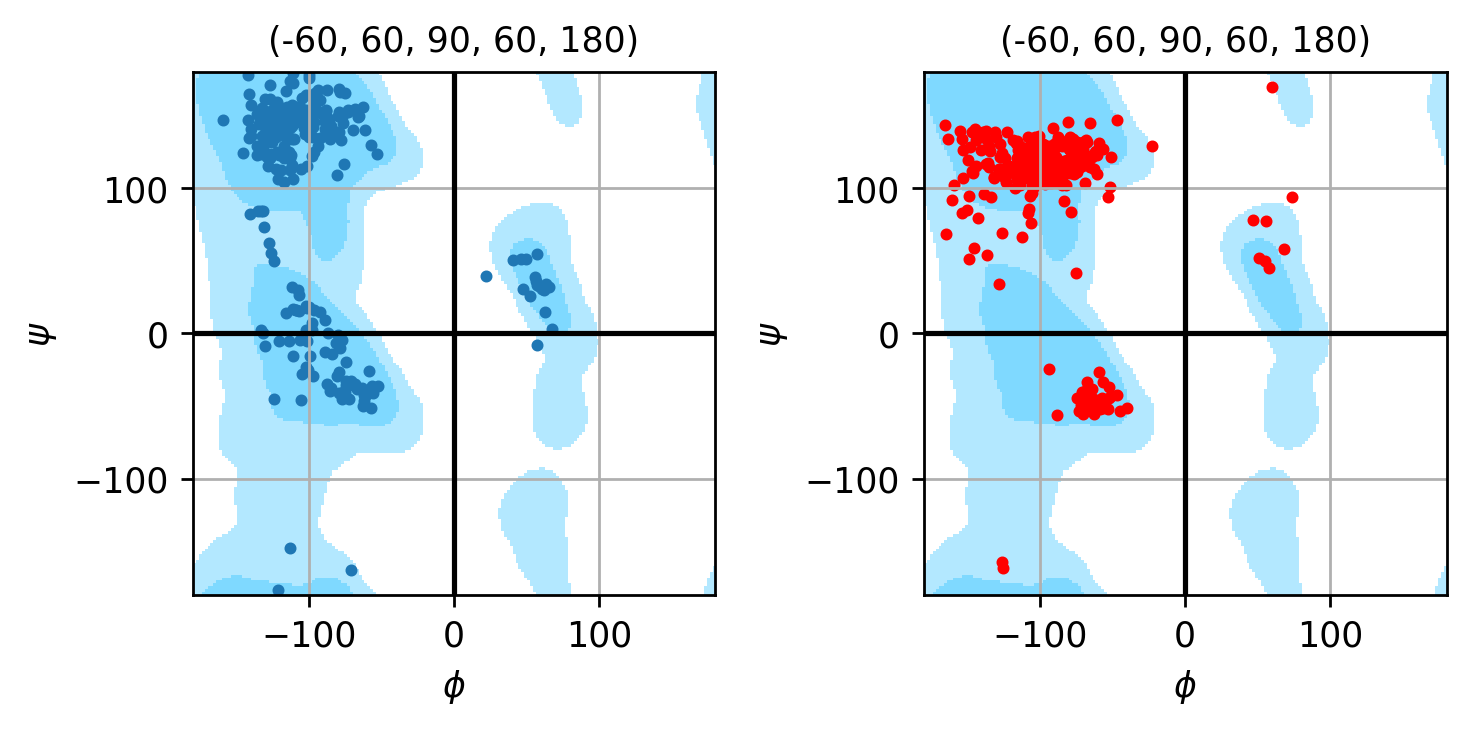

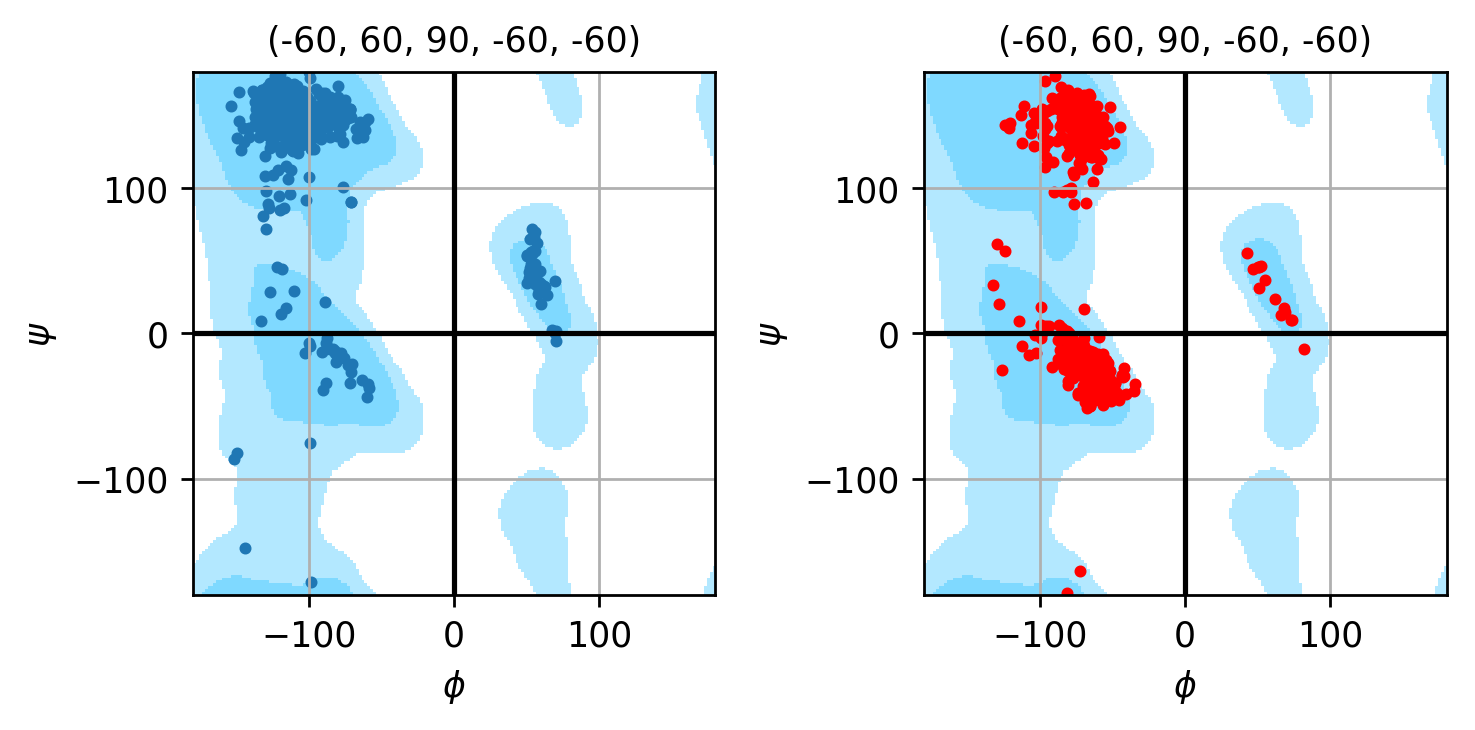

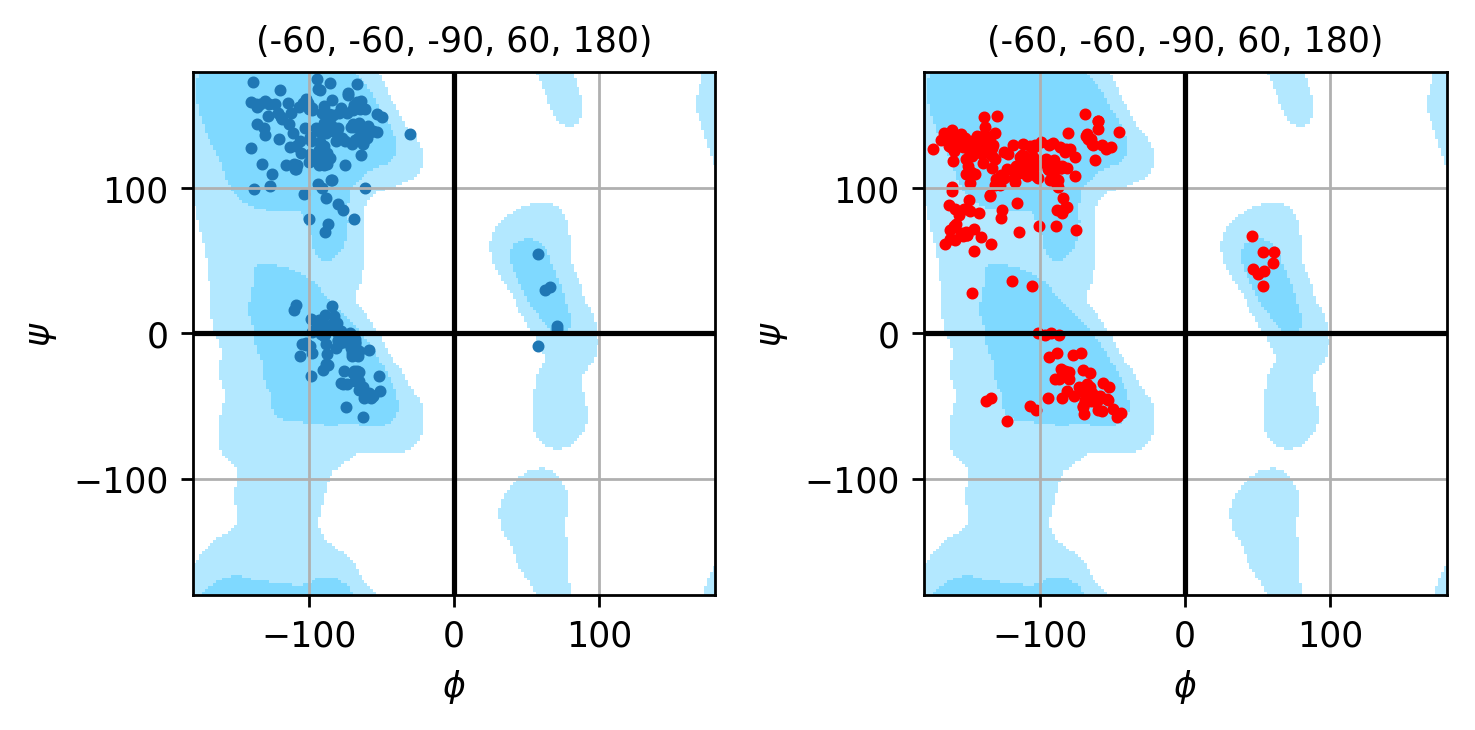

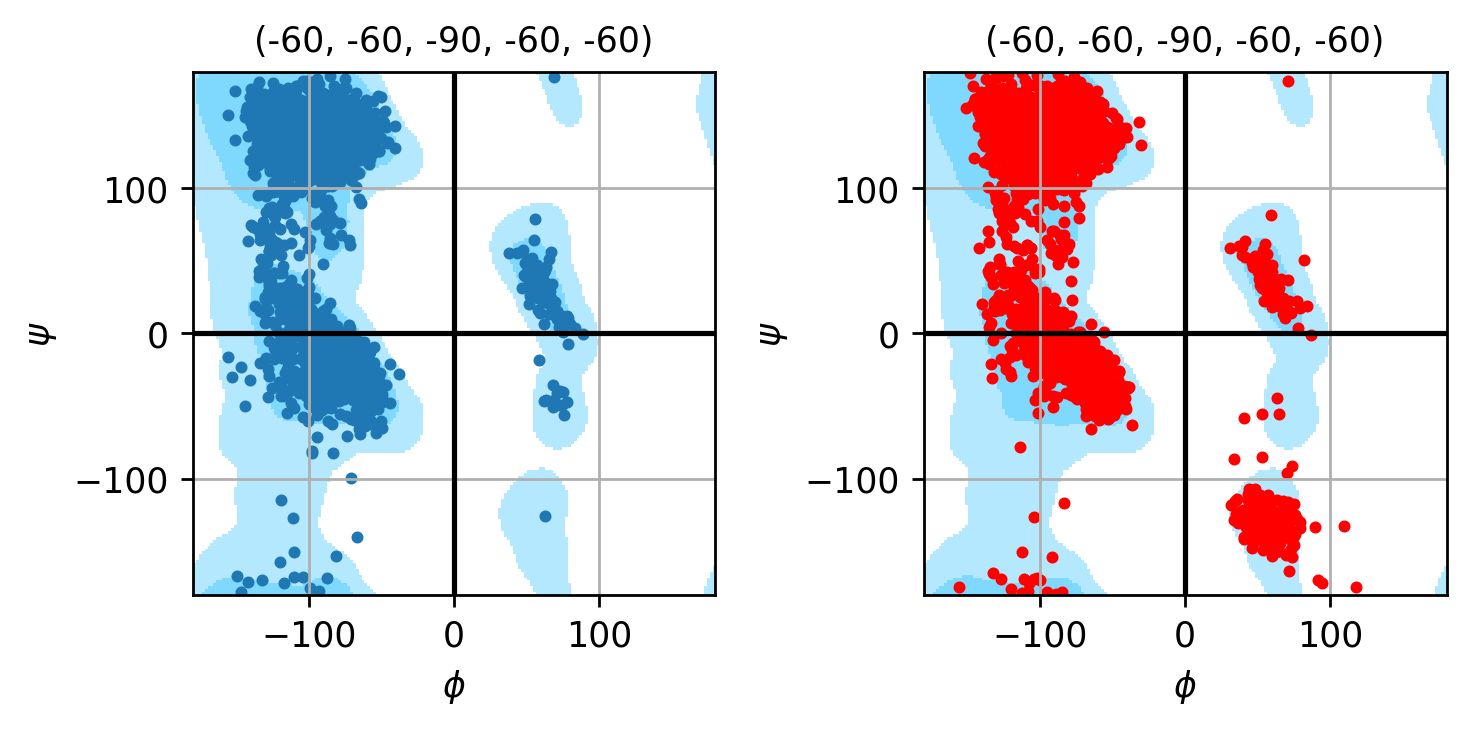

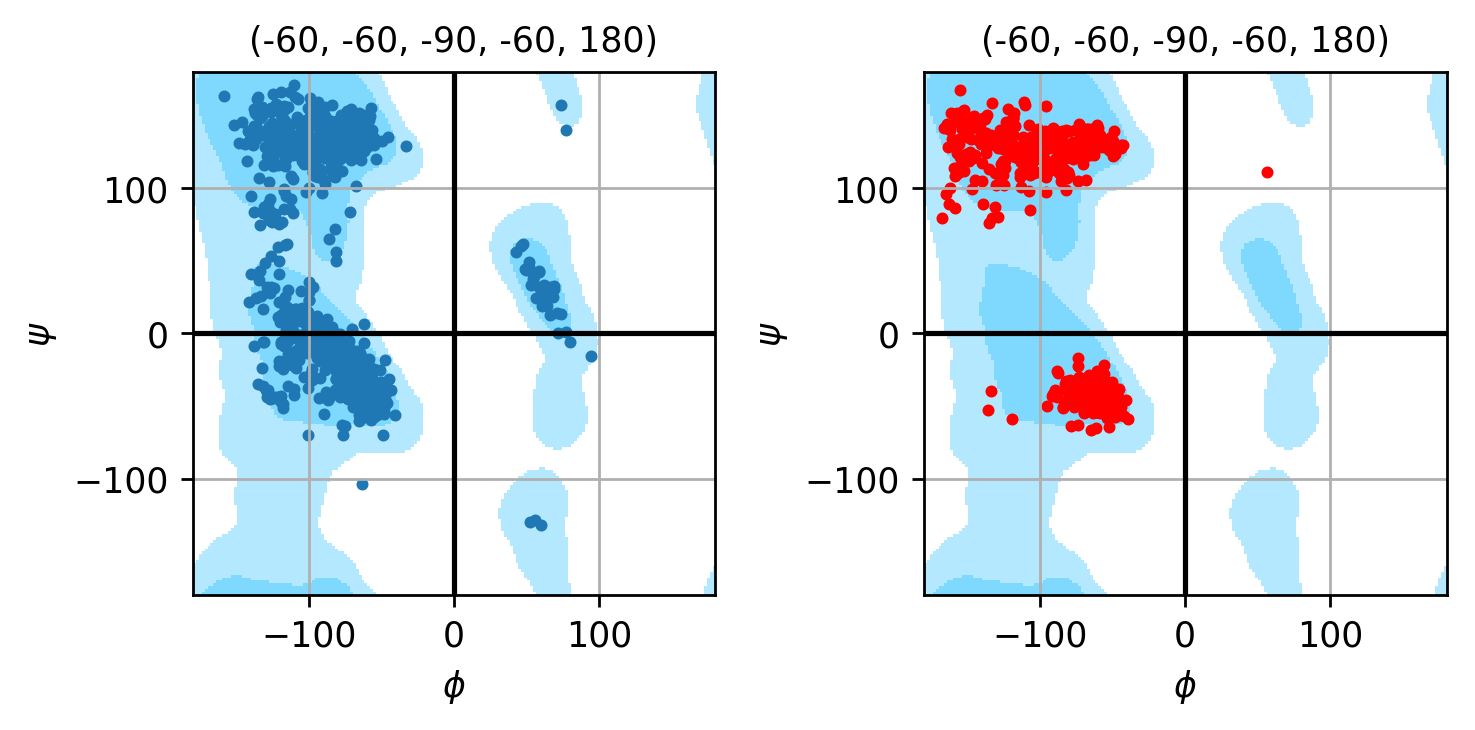

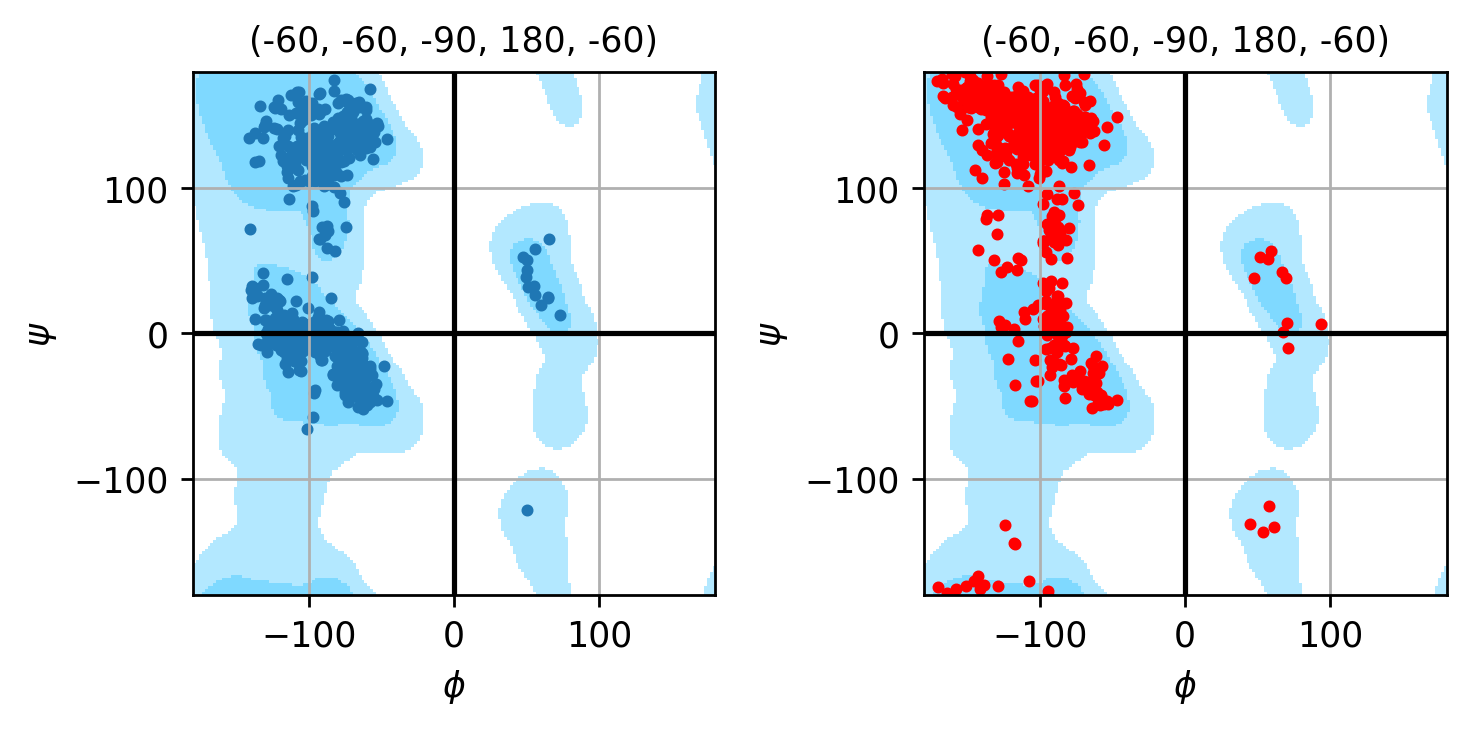

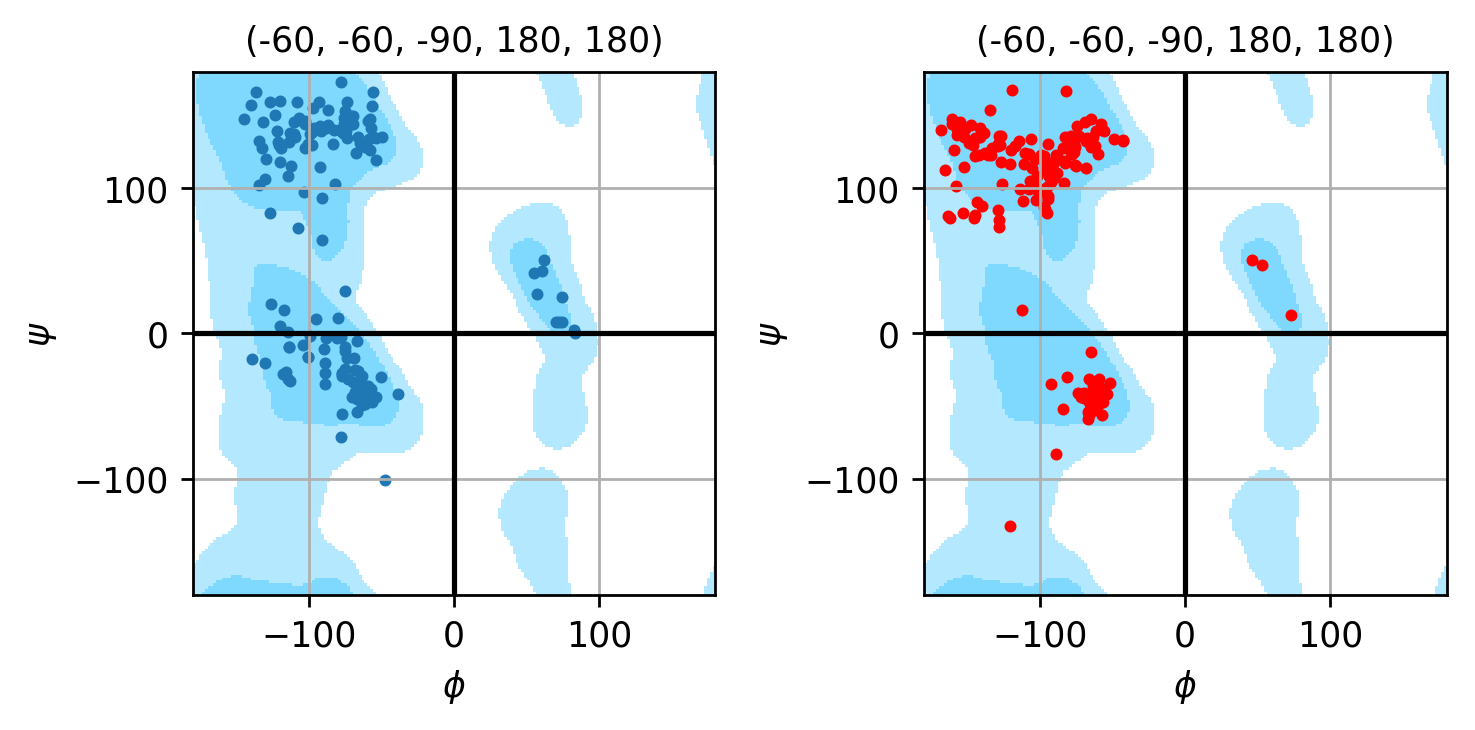

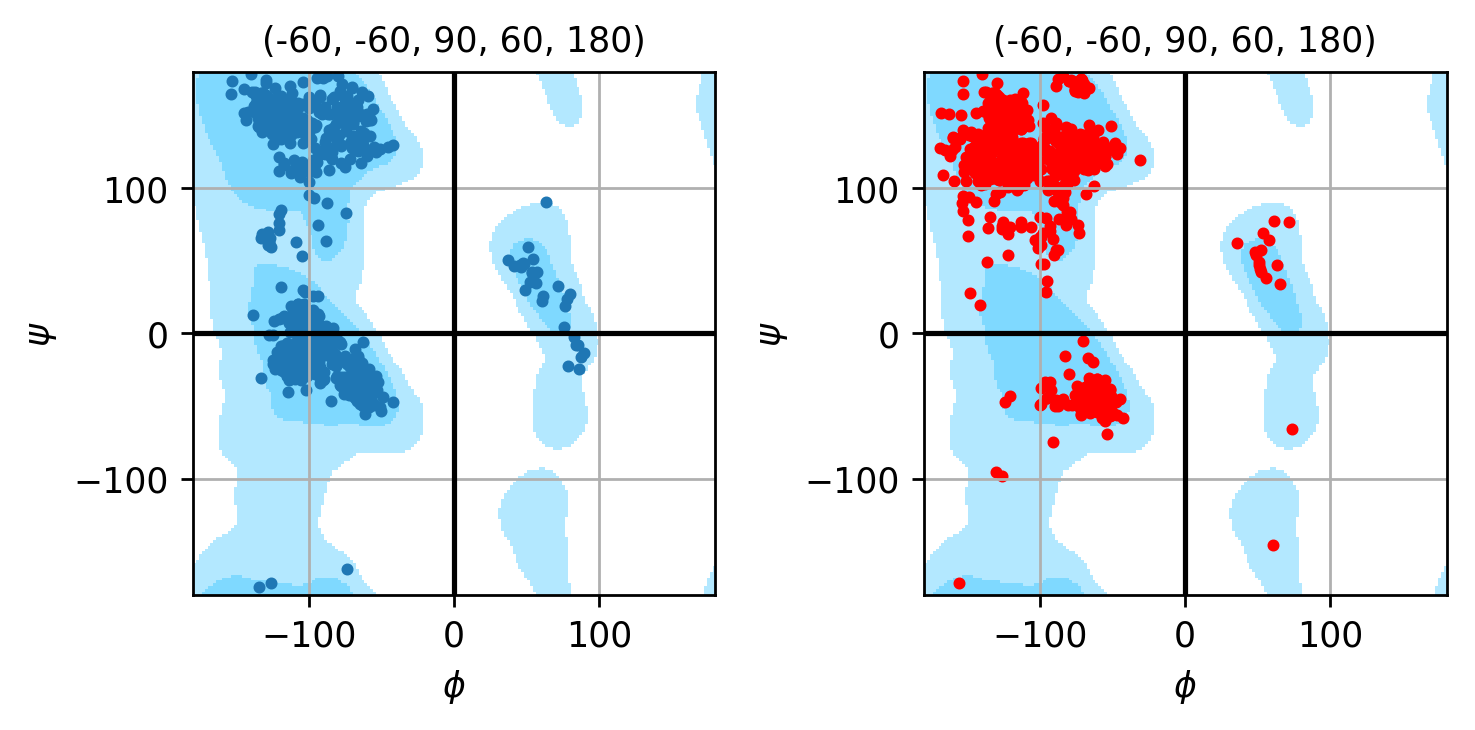

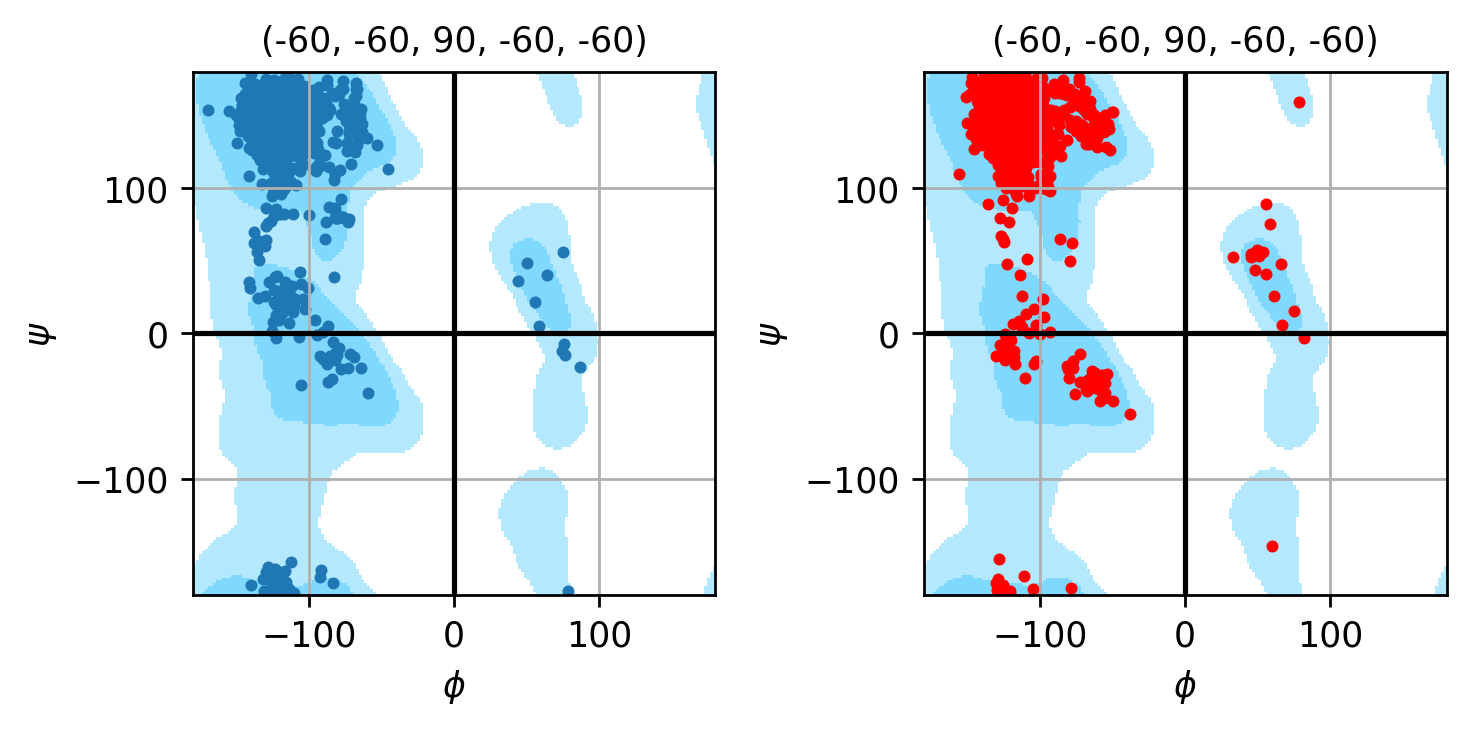

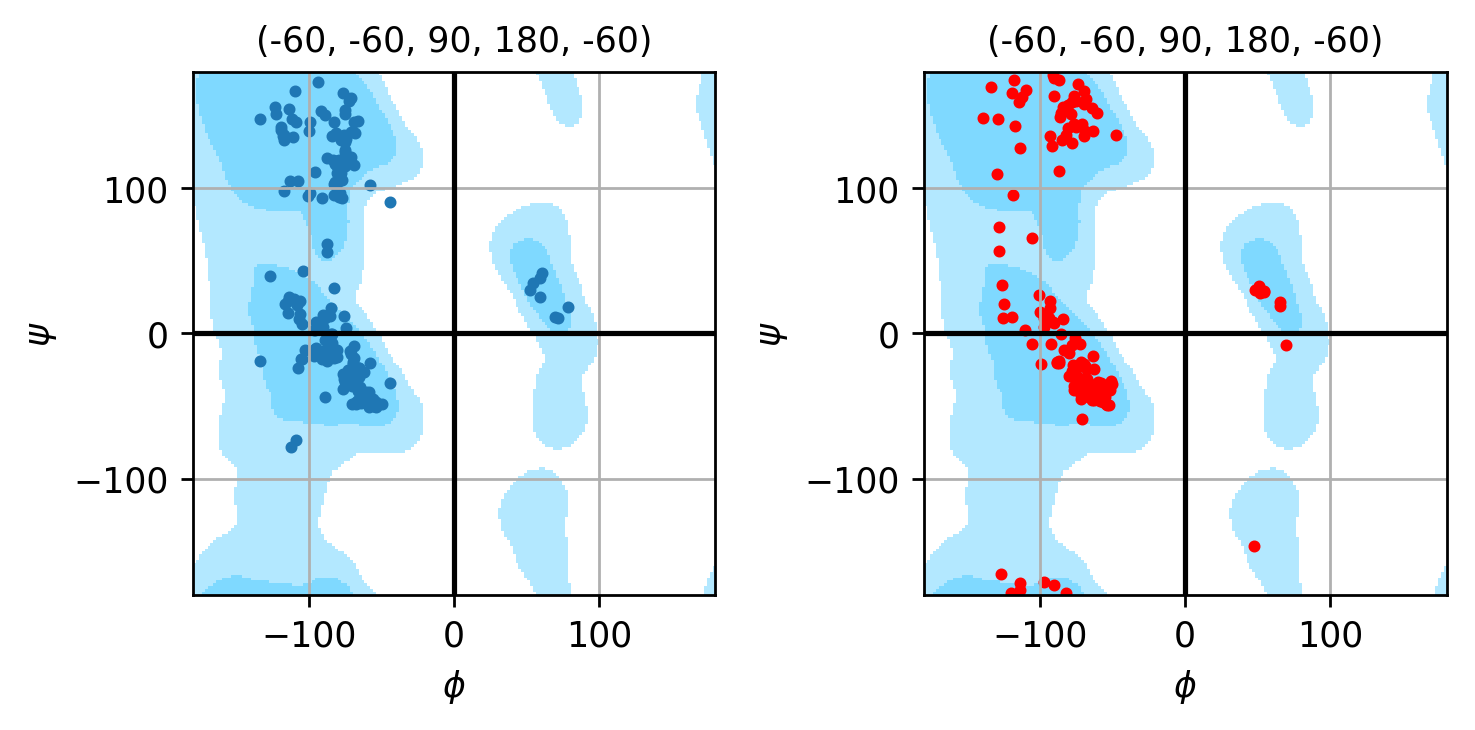

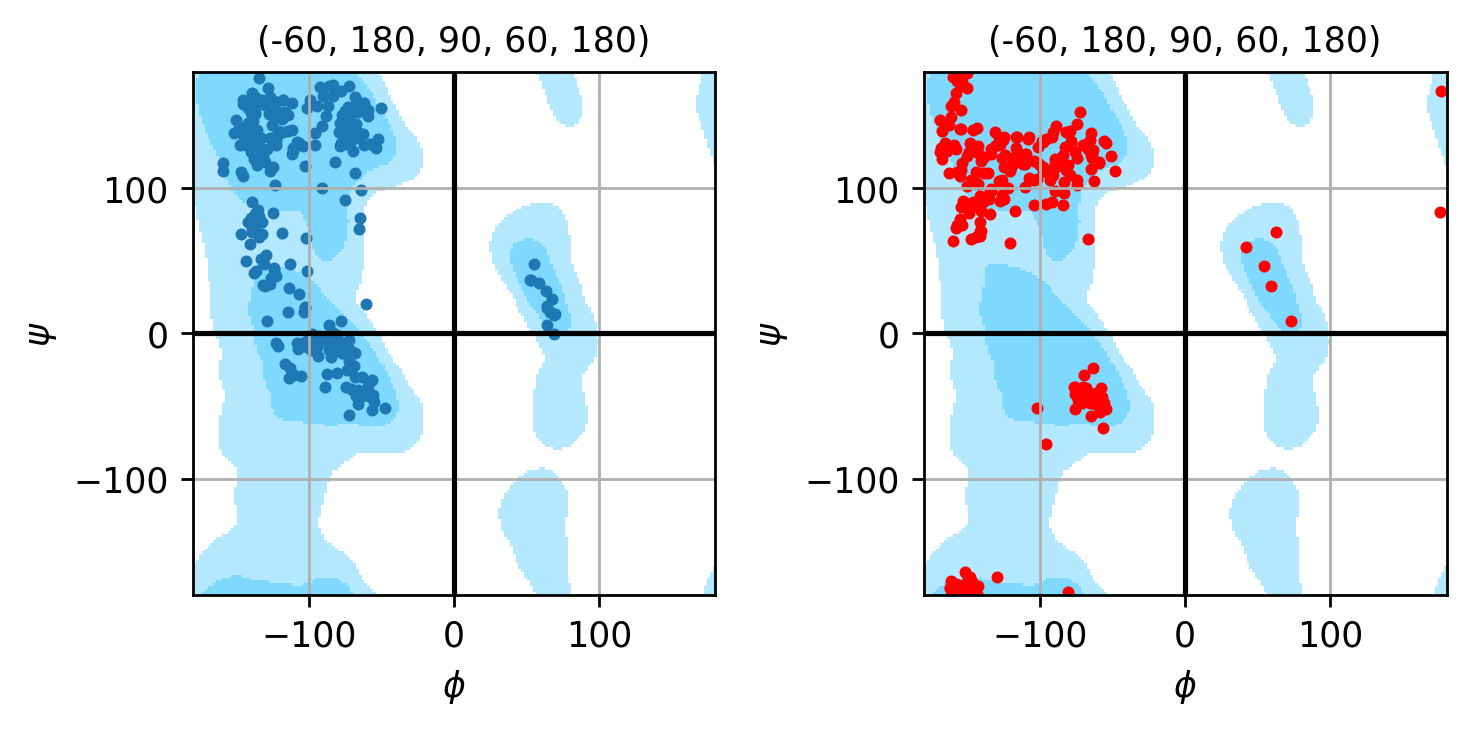

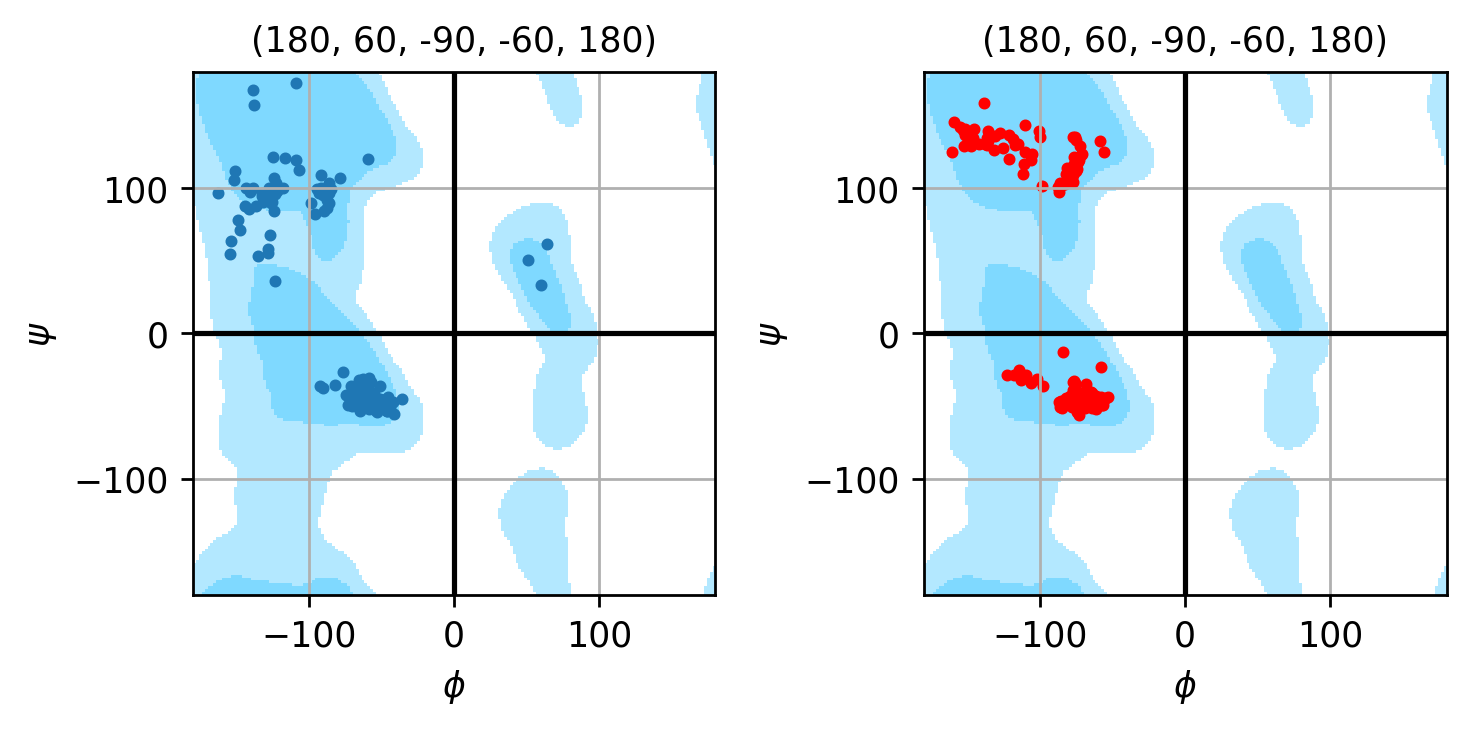

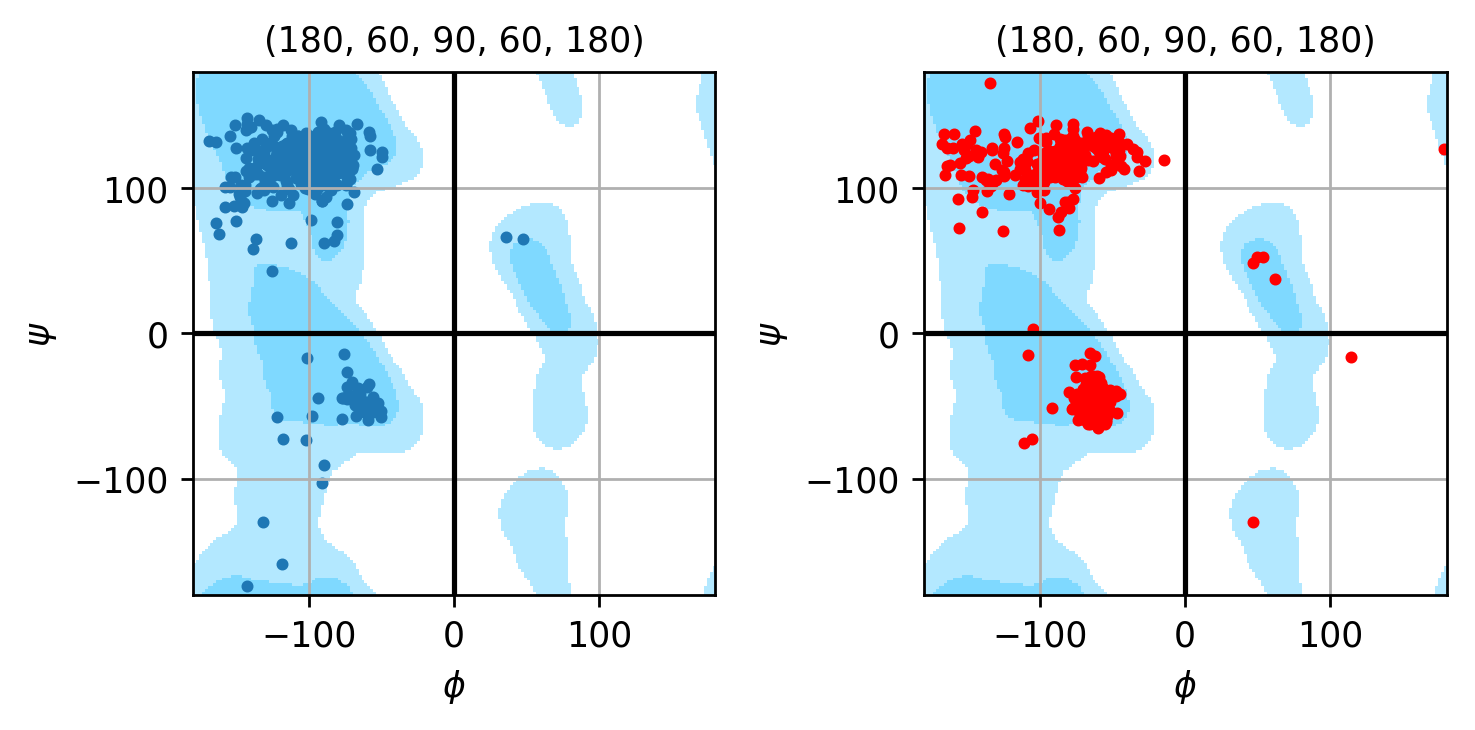

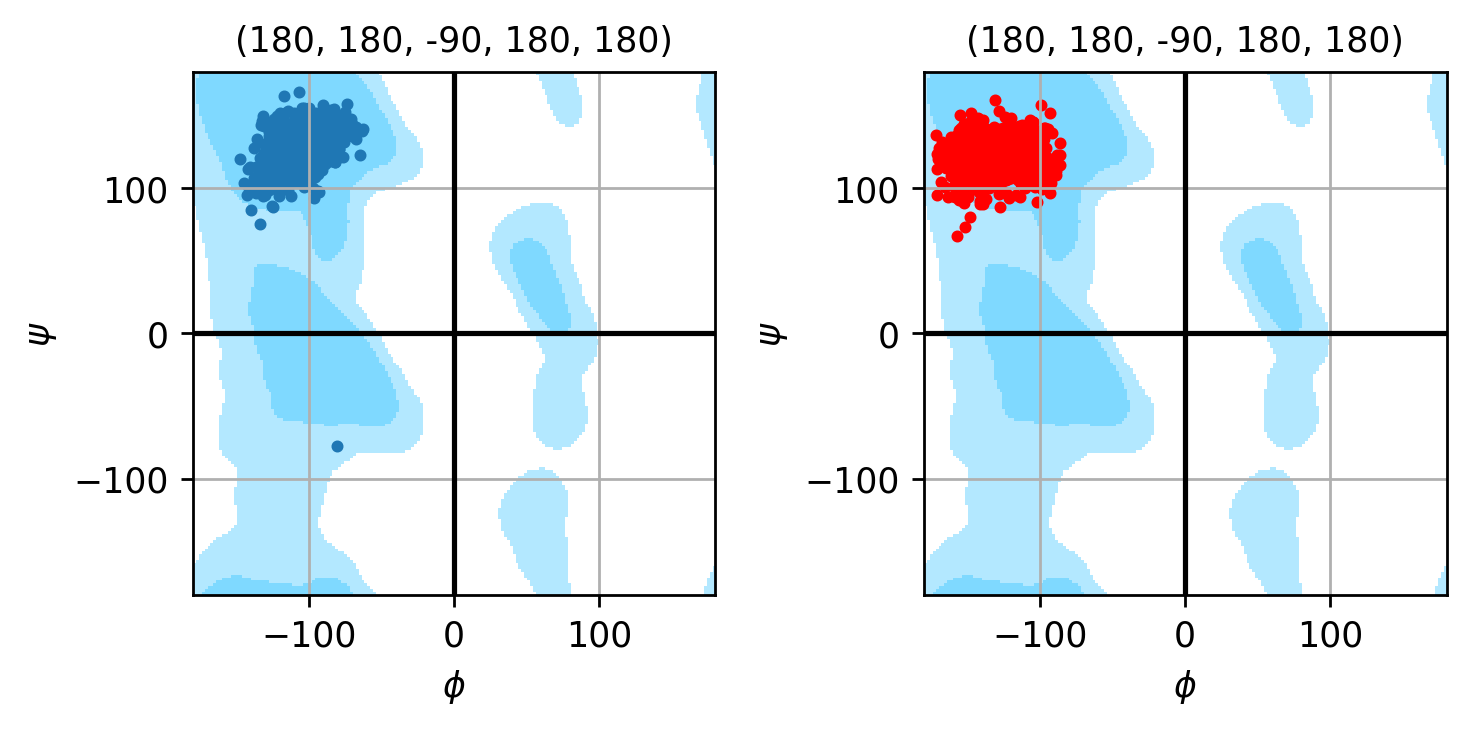

In [10]:
##########################################################################################
# Based on the configuration_dataframe function, generate a psi and phi list
######################################################################################
for config in configurations:
    #config_dataframe = configuration_dataframe_return(config)
    # Test if dictionary works first
    config_dataframe = configuration_dataframe_dict[config]
    cys1_phi_list    = config_dataframe['Cys1 phi'].tolist() 
    cys1_psi_list    = config_dataframe['Cys1 psi'].tolist() 
    cys2_phi_list    = config_dataframe['Cys2 phi'].tolist()
    cys2_psi_list    = config_dataframe['Cys2 psi'].tolist()

    if len(config_dataframe)> 75:
        ramachandran(cys1_phi_list,
                     cys1_psi_list,
                     cys2_phi_list,
                     cys2_psi_list,
                    config)

In [ ]:
from collections import Counter


secondary_structure = [
'Helix',
'B-Bridge',
'Strand',
'3-Helix',
'5-Helix',
'Turn',
'Bend',
'Coil']


fig, ax = plt.subplots()
image = np.random.uniform(size=(10, 10))

fig.subplots_adjust(hspace=0.3, wspace=0.05)

def generate_ss_bar_graph(frequency_dict,config_total,config):
    #y_pos = np.arange(len(ss_x_axis_top3))
    #plt.xticks(y_pos,ss_x_axis, rotation = 90)
    
    i= 0
    for key in frequency_dict:
        plt.bar(i,(float(key[1])/(float(config_total))))
        i =i+1
    #for key in frequency_dict:
    #    plt.bar(ss_x_axis_top3.index(key[0]),(float(key[1])/(float(config_total))), color = 'blue')
    #plt.xticks(y_pos,ss_x_axis_top3, rotation = 90)
    #plt.ylim(0,1)
    plt.title(config)
    plt.ylabel("Frequency")
    plt.xlabel('Cys1-Cys2 Secondary Structure')
    plt.show()

    
for config in configurations:
    config_dataframe = configuration_dataframe_return(config)
#    # Test if dictionary works first
#    config_dataframe = configuration_dataframe_dict[config]
#    
#    
    ss_list = config_dataframe[['Cys1_SS_cat','Cys2_SS_cat']]
    ss_list['combined'] = ss_list[['Cys1_SS_cat','Cys2_SS_cat']].apply(lambda x: ','.join(x), axis=1)
    if len(ss_list) > 100:
            common_ss = Counter(ss_list['combined'].tolist())
            common_ss = common_ss.most_common(3)
            generate_ss_bar_graph(common_ss, len(ss_list),config)
#            

### Major differences between X3 +90 and X3 -90 Secondary Structure

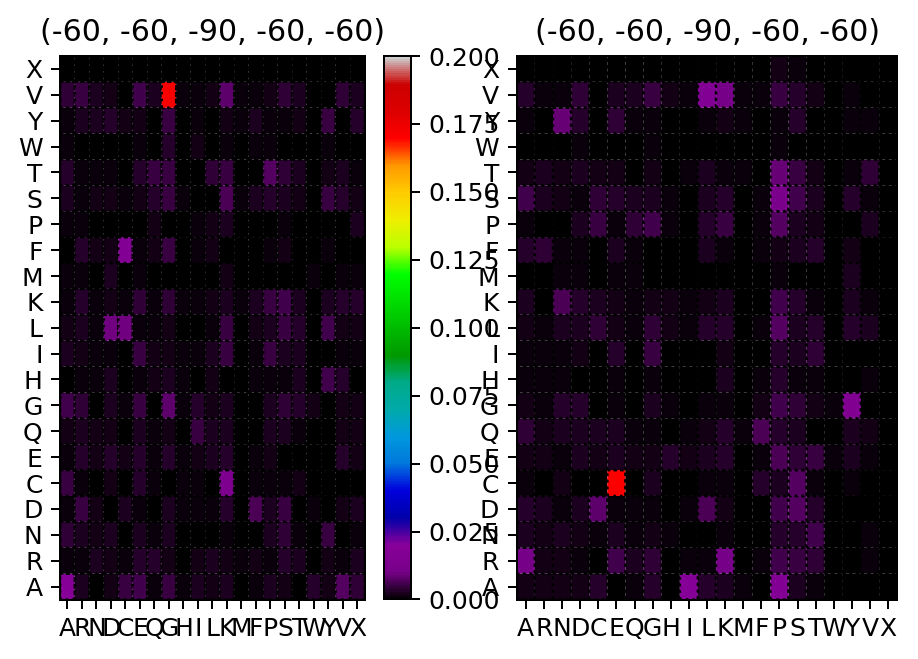

In [24]:
from matplotlib.pyplot import cm
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 180
# mpl.rcParams['figure.figsize'] = (20.0, 10.0)
aminos=['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V','X']
# aminos=['ALA','ARG','ASN','ASP','CYS','GLU','GLN','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL','X','Z']
amino_dict ={}
"""Assigning amino acid a number (1 to 20)"""
for k,value in enumerate(aminos):
    amino_dict[value]=k
# amino_dict['C']=amino_dict['c']




def amino_heatmaps(amino_array,amino_array_cys2,config):
        #plt.figure(figsize=(24, 6)) 
#         plt.figure(dpi  = 150)
#         mpl.rcParams['figure.dpi']= 150
        fig=plt.figure()
        fig = plt.subplot(1,2,1)
        
        amino_array=amino_array/np.sum(amino_array)
        amino_array_cys2=amino_array_cys2/np.sum(amino_array_cys2)
        
        for axis in [fig.xaxis, fig.yaxis]:
            axis.set(ticks=np.arange(0.5, len(aminos)), ticklabels=aminos)
        
        
        im = fig.pcolor(amino_array, cmap='nipy_spectral', edgecolor='black', linestyle=':', lw=1)
        im.set_clim(vmin=0,vmax =0.20)
        plt.colorbar(im)
        plt.title(config,size=12)
        

        fig = plt.subplot(1,2,2)
        im = fig.pcolor(amino_array_cys2, cmap='nipy_spectral', edgecolor='black', linestyle=':', lw=1)
        im.set_clim(vmin=0,vmax =0.20)
        #plt.colorbar(im,orientation='horizontal')
        plt.title(config,size=12)
        
        
        for axis in [fig.xaxis, fig.yaxis]:
            axis.set(ticks=np.arange(0.5, len(aminos)), ticklabels=aminos)
        plt.savefig(str(config)+'neighbours.png')
        plt.show()
        return()


for config in configurations:
    
    config_dataframe = configuration_dataframe_return(config)
    if len(config_dataframe)> 3000:
        amino_array = np.zeros(shape=(21,21))
        amino_array_cys2 = np.zeros(shape=(21,21))
        for index,row in config_dataframe.iterrows():
            cys1_b = row['Cys1 b res']
            cys1_a = row['Cys1 a res']
            cys2_b = row['Cys2 b res']
            cys2_a = row['Cys2 a res']
            amino_array[amino_dict[cys1_b],amino_dict[cys1_a]] = amino_array[amino_dict[cys1_b],amino_dict[cys1_a]]+1
            amino_array_cys2[amino_dict[cys2_b],amino_dict[cys2_a]] = amino_array_cys2[amino_dict[cys2_b],amino_dict[cys2_a]]+1
        amino_heatmaps(amino_array,amino_array_cys2,config)    
    

### Frequency of Amino Acid by Biochemical Property

(60, 60, -90, 60, 60)
(60, 60, -90, 60, -60)
(60, 60, -90, 60, 180)
(60, 60, -90, -60, 60)
(60, 60, -90, -60, -60)
(60, 60, -90, -60, -60)


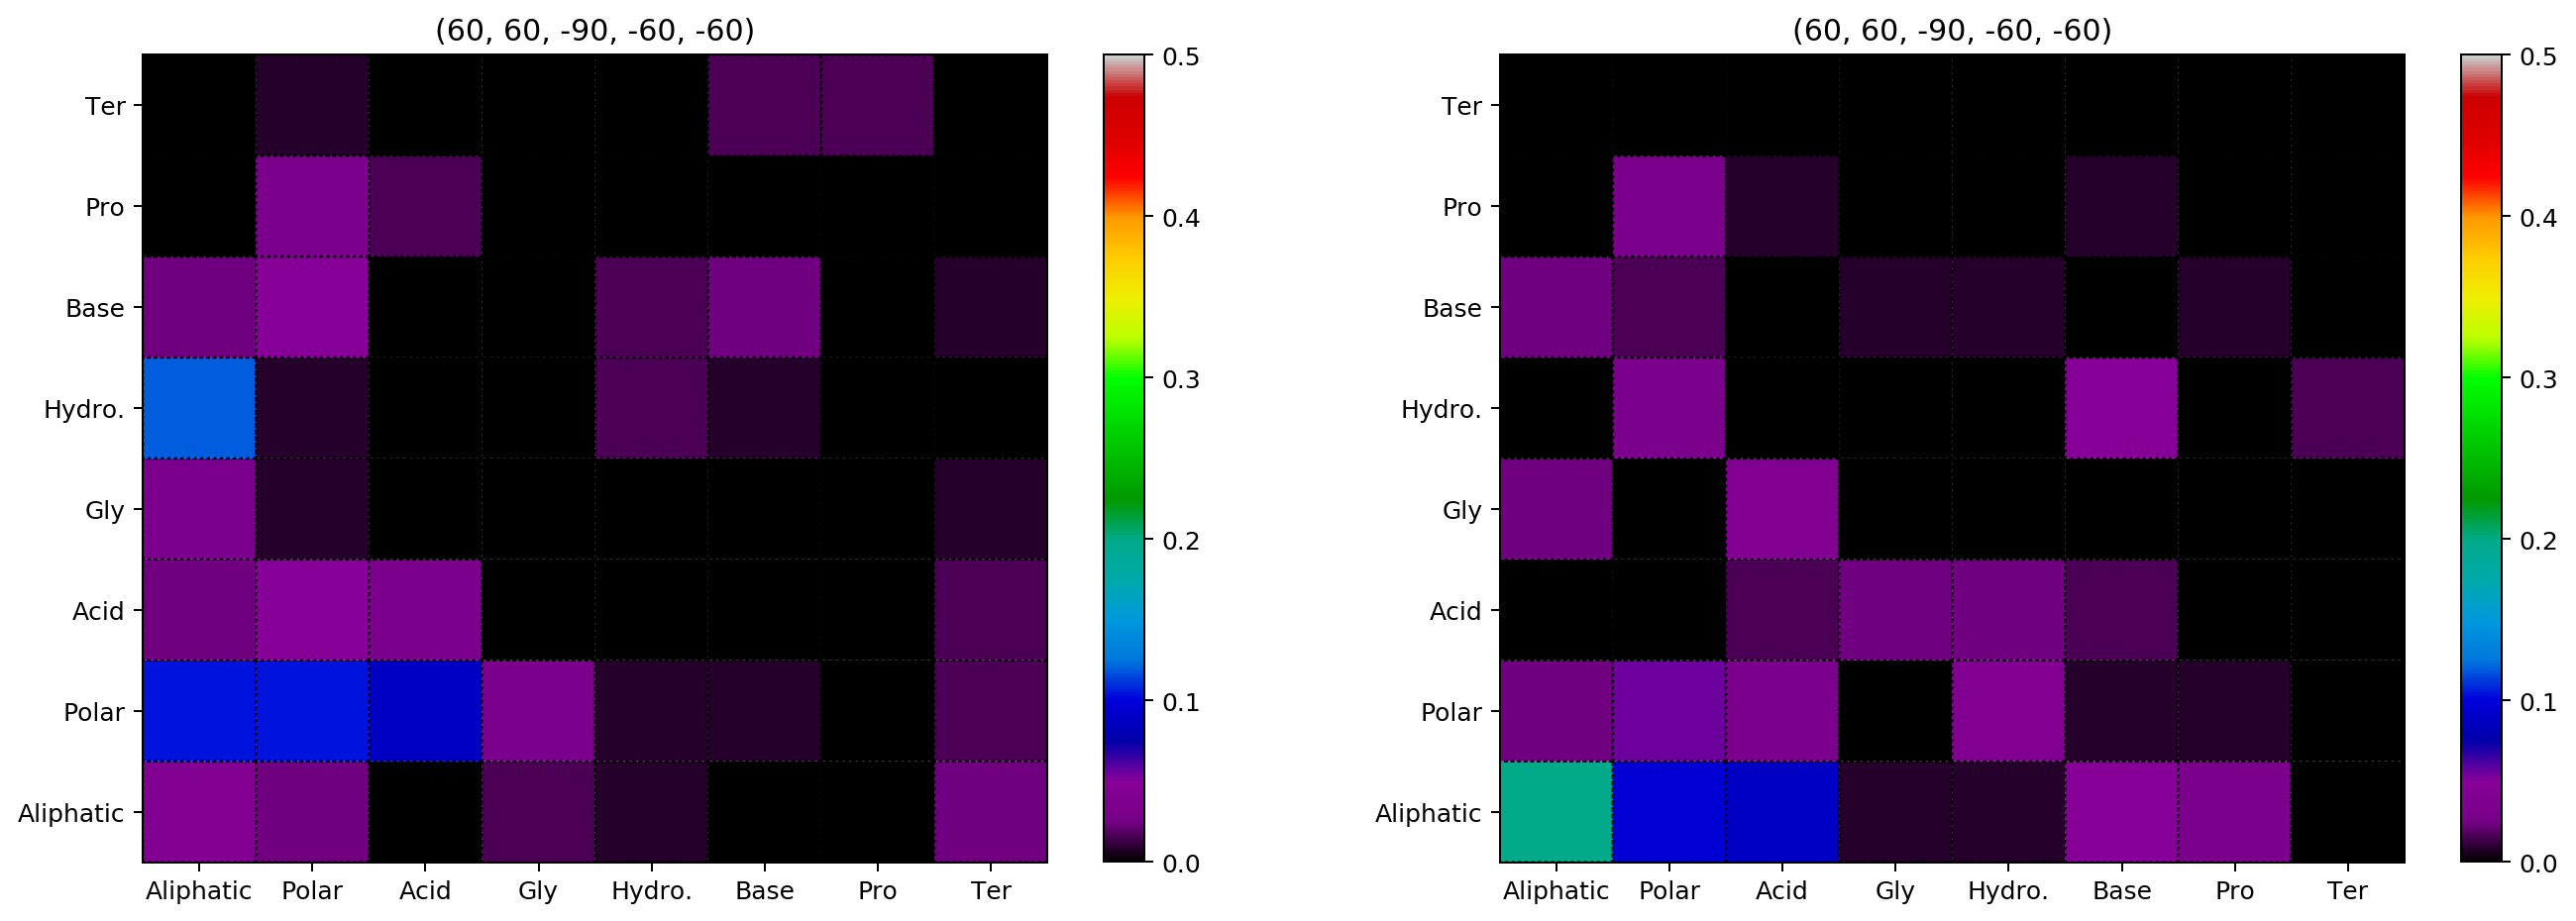

(60, 60, -90, -60, 180)
(60, 60, -90, 180, 60)
(60, 60, -90, 180, -60)
(60, 60, -90, 180, 180)
(60, 60, 90, 60, 60)
(60, 60, 90, 60, 60)


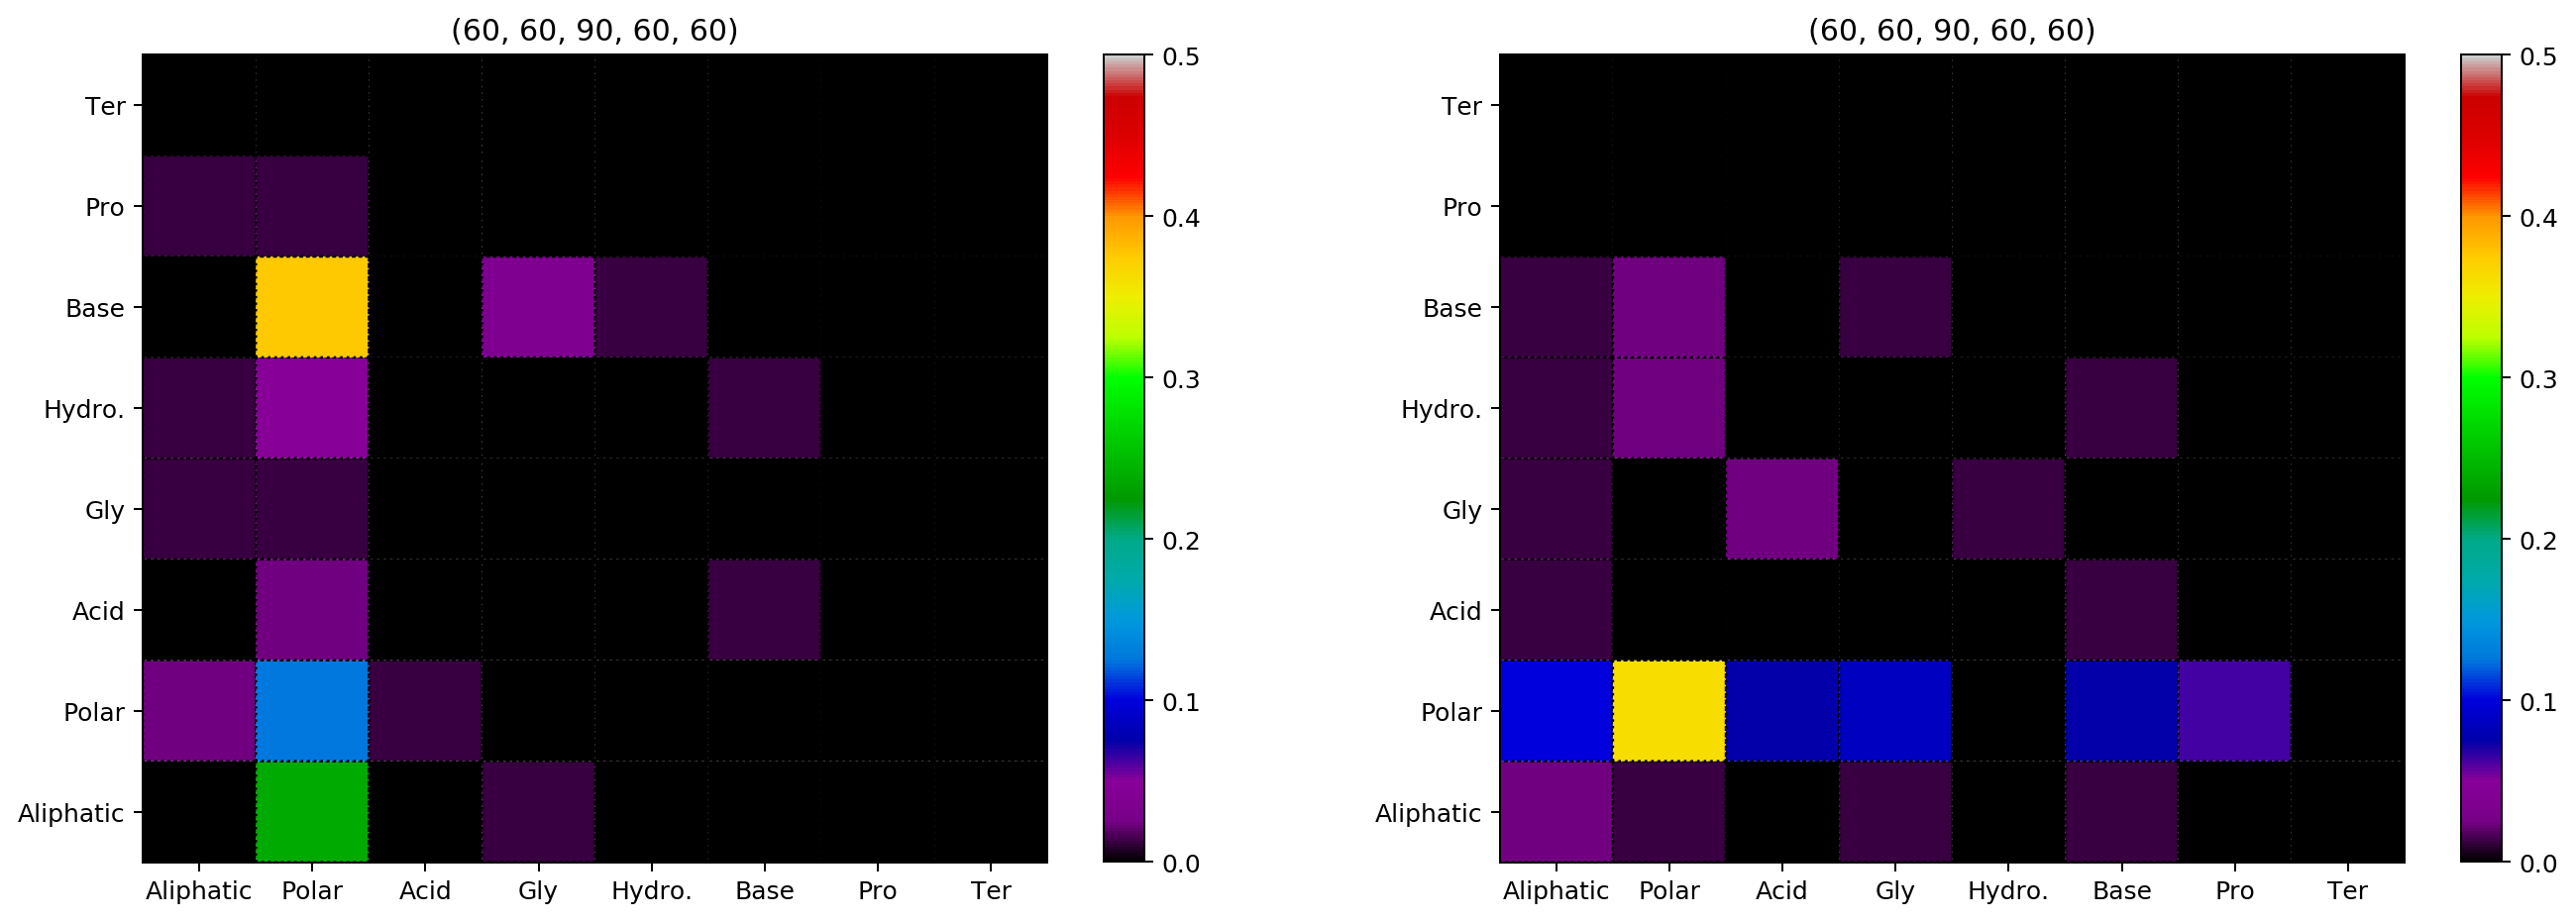

(60, 60, 90, 60, -60)
(60, 60, 90, 60, 180)
(60, 60, 90, 60, 180)


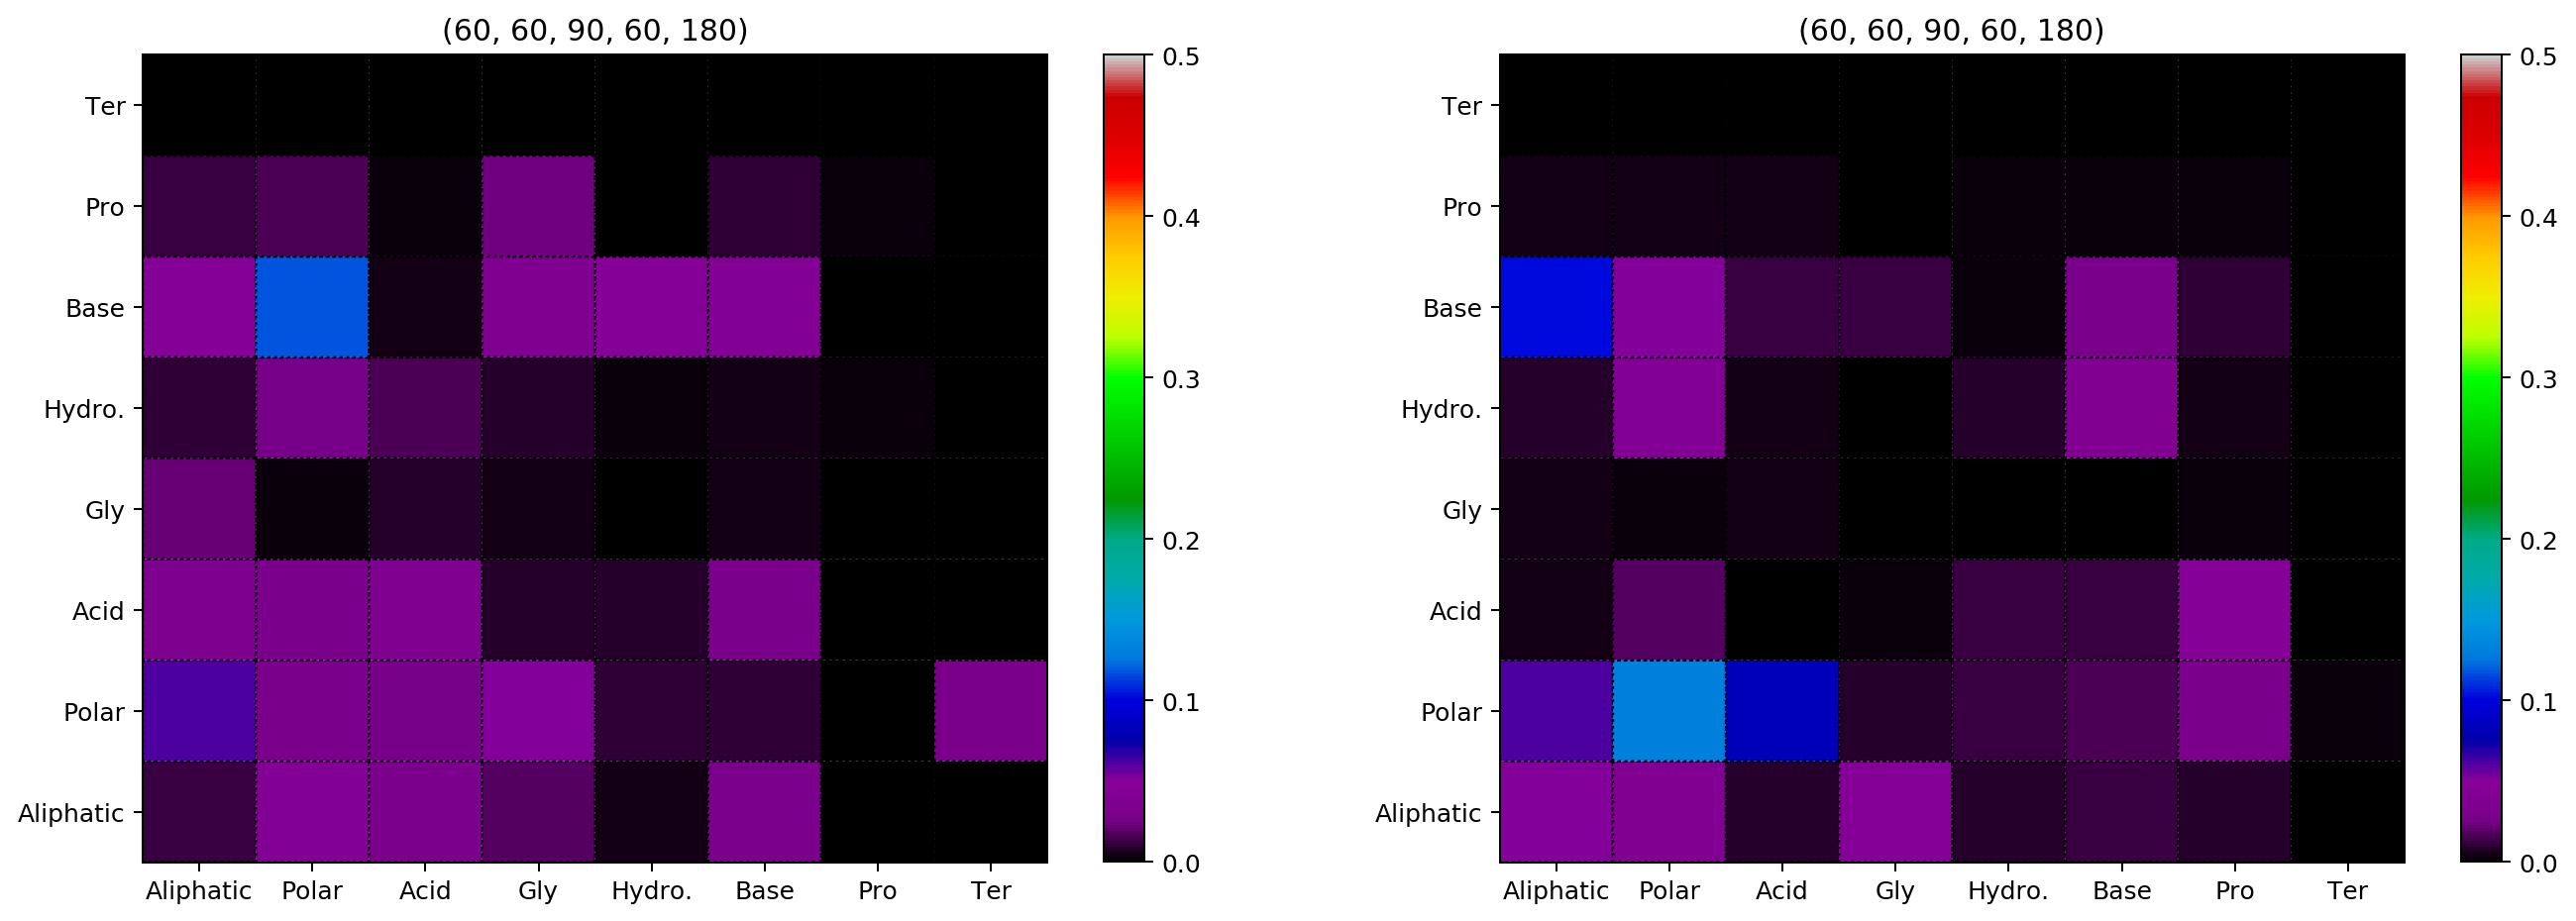

(60, 60, 90, -60, 60)
(60, 60, 90, -60, -60)
(60, 60, 90, -60, -60)


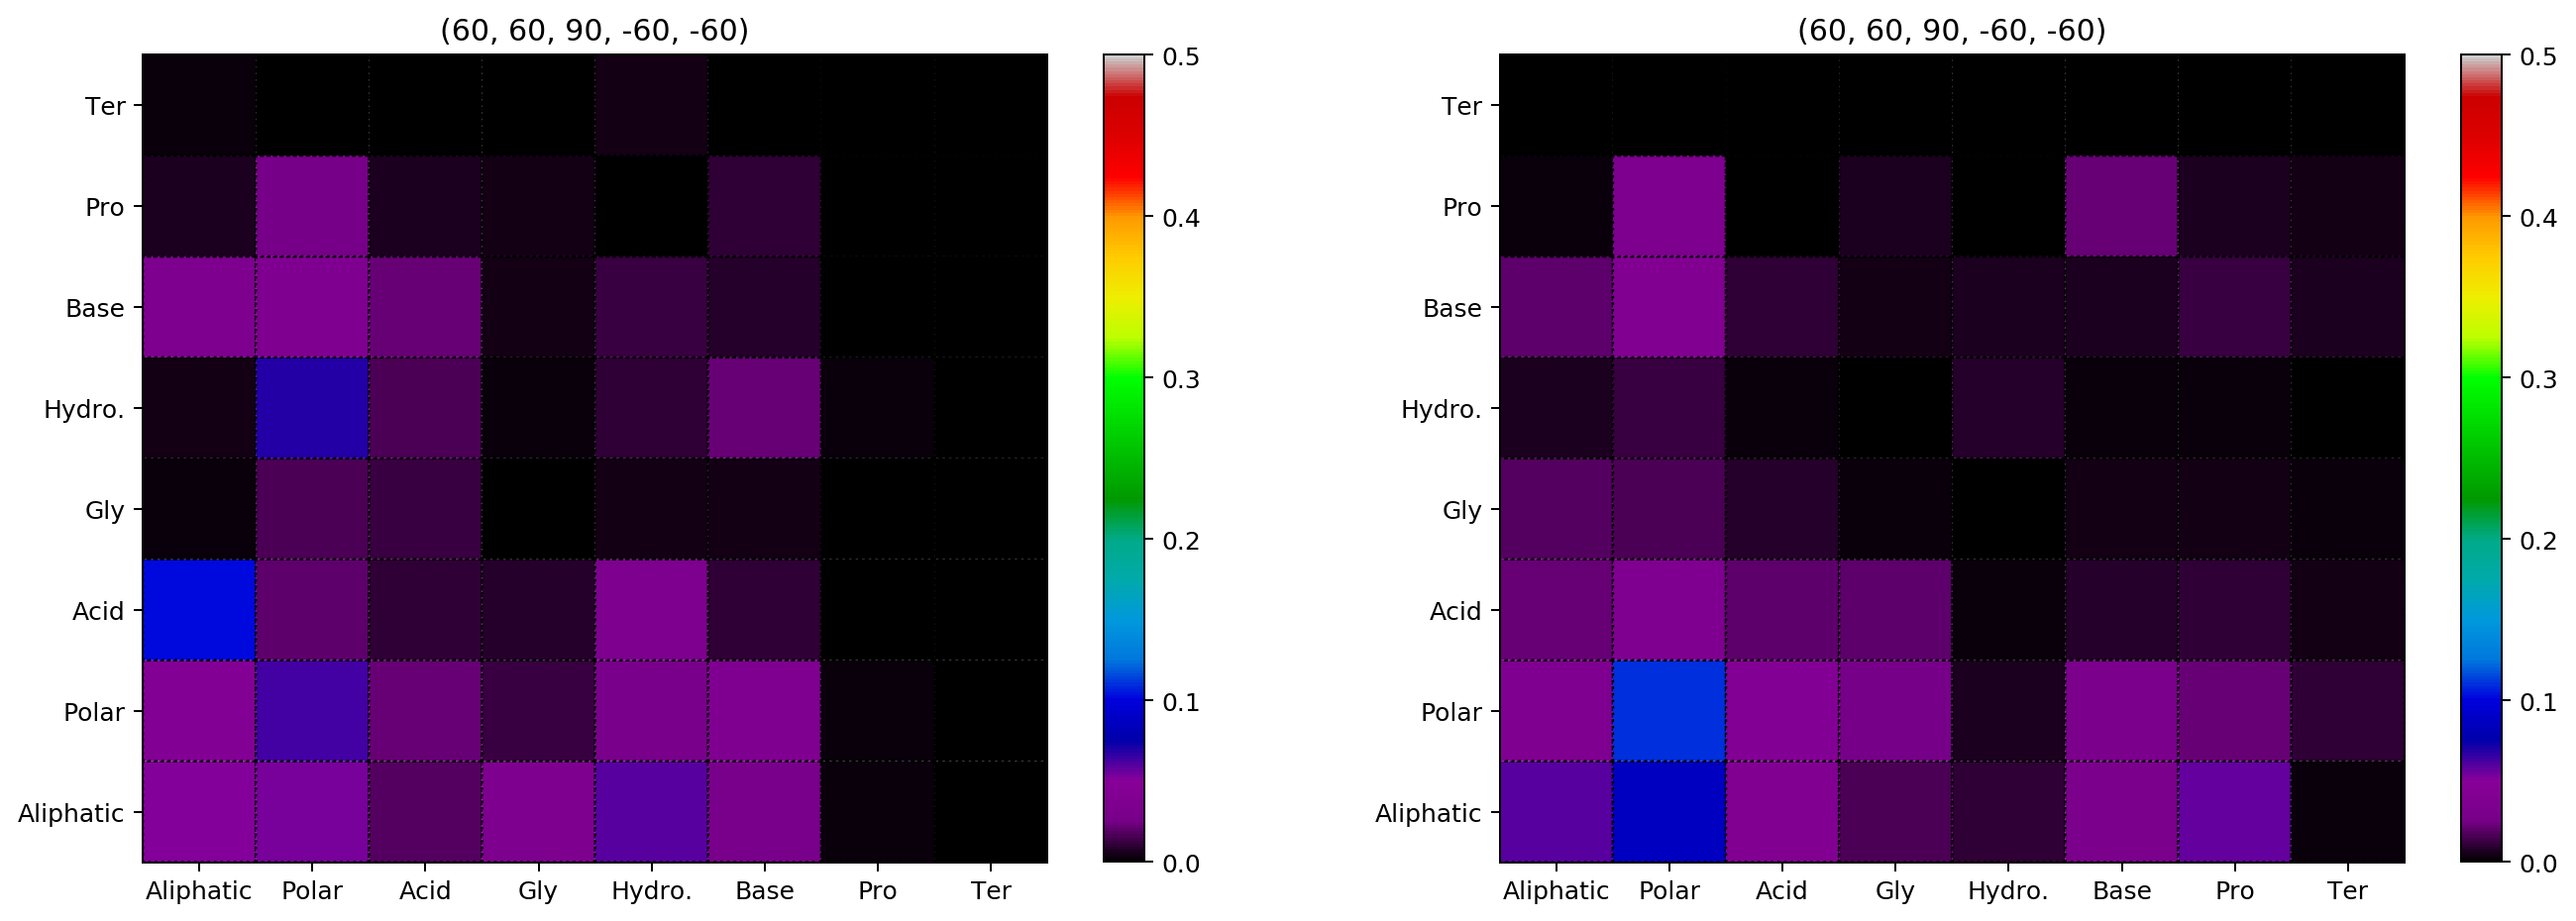

(60, 60, 90, -60, 180)
(60, 60, 90, 180, 60)
(60, 60, 90, 180, -60)
(60, 60, 90, 180, 180)
(60, -60, -90, 60, -60)
(60, -60, -90, 60, 180)
(60, -60, -90, -60, 60)
(60, -60, -90, -60, -60)
(60, -60, -90, -60, -60)


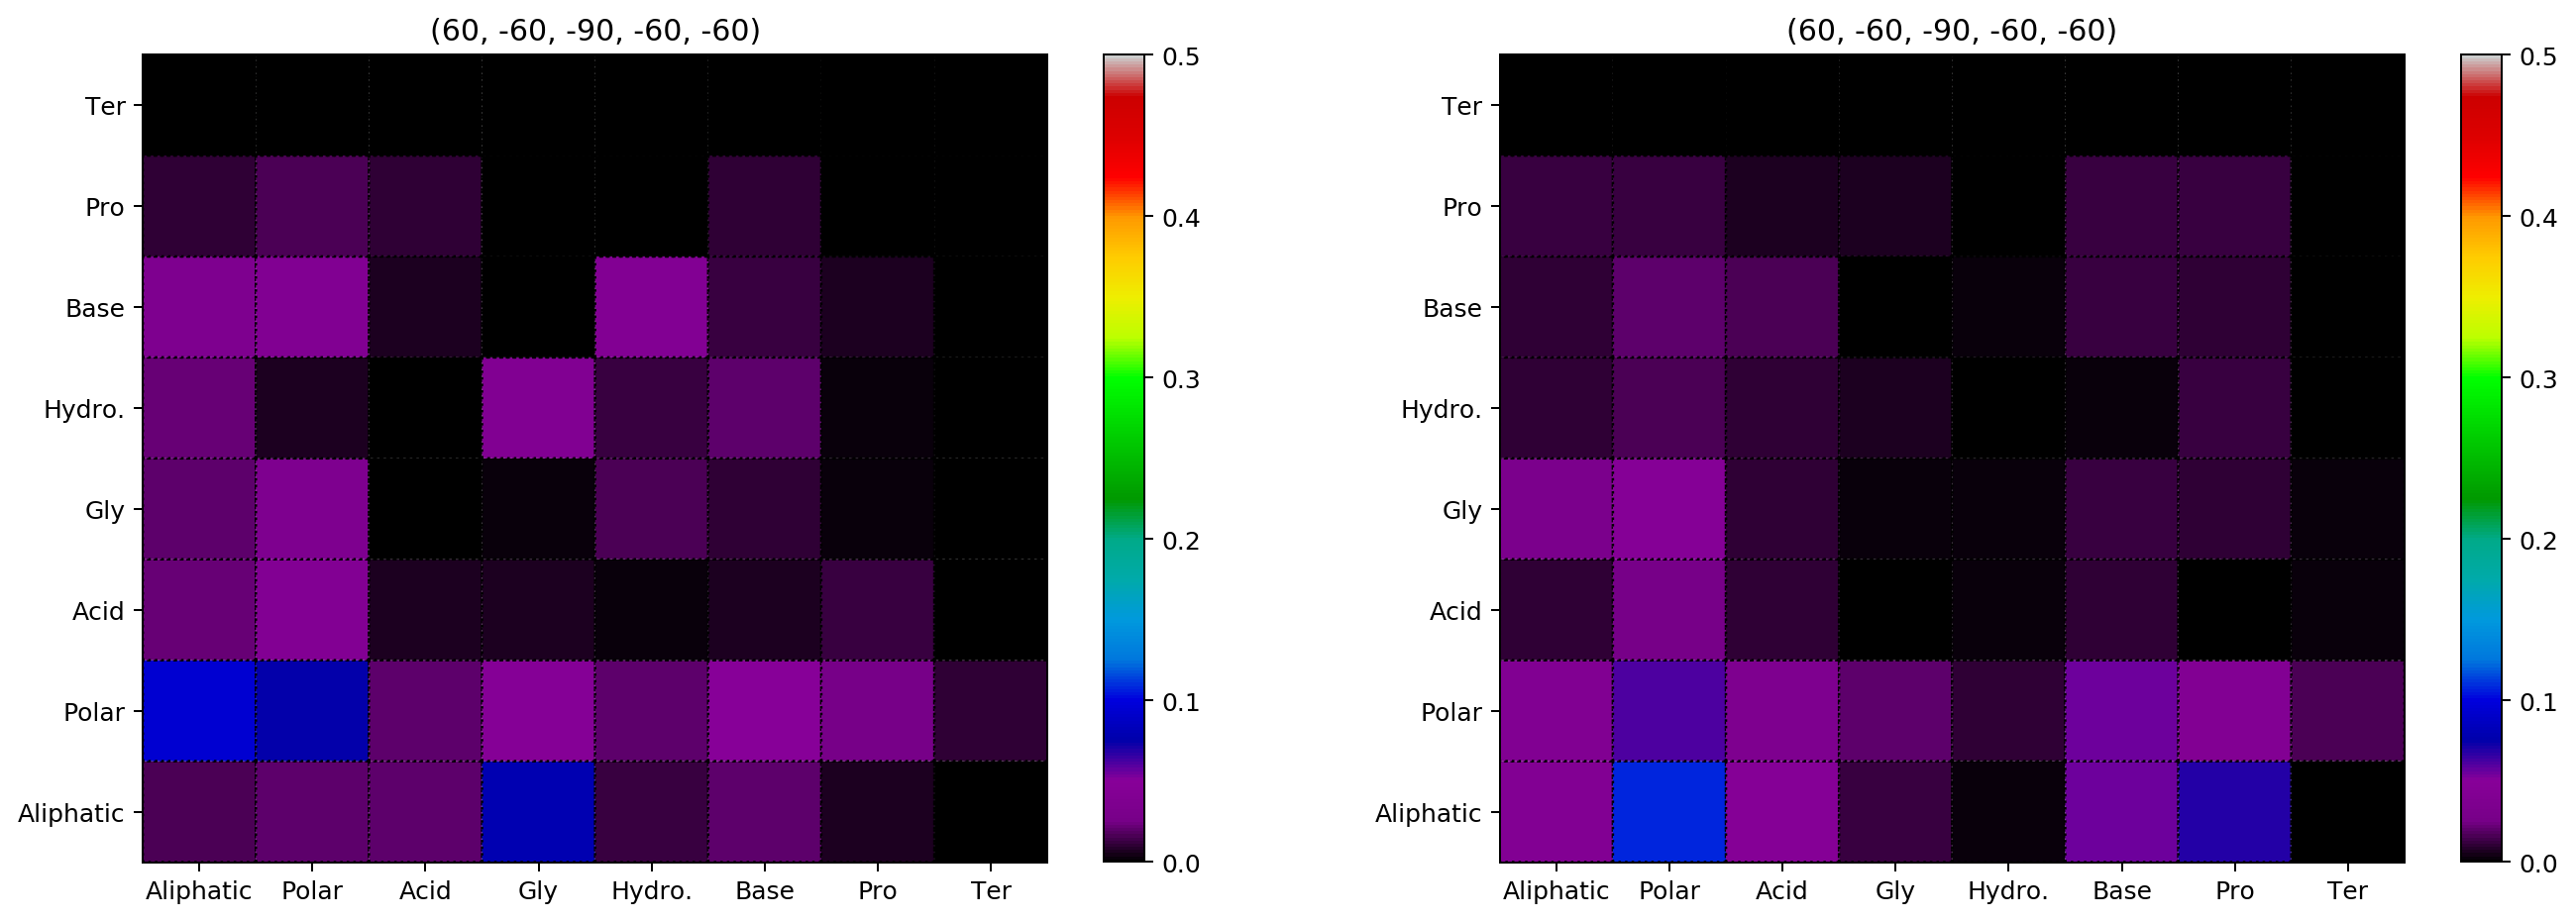

(60, -60, -90, -60, 180)
(60, -60, -90, -60, 180)


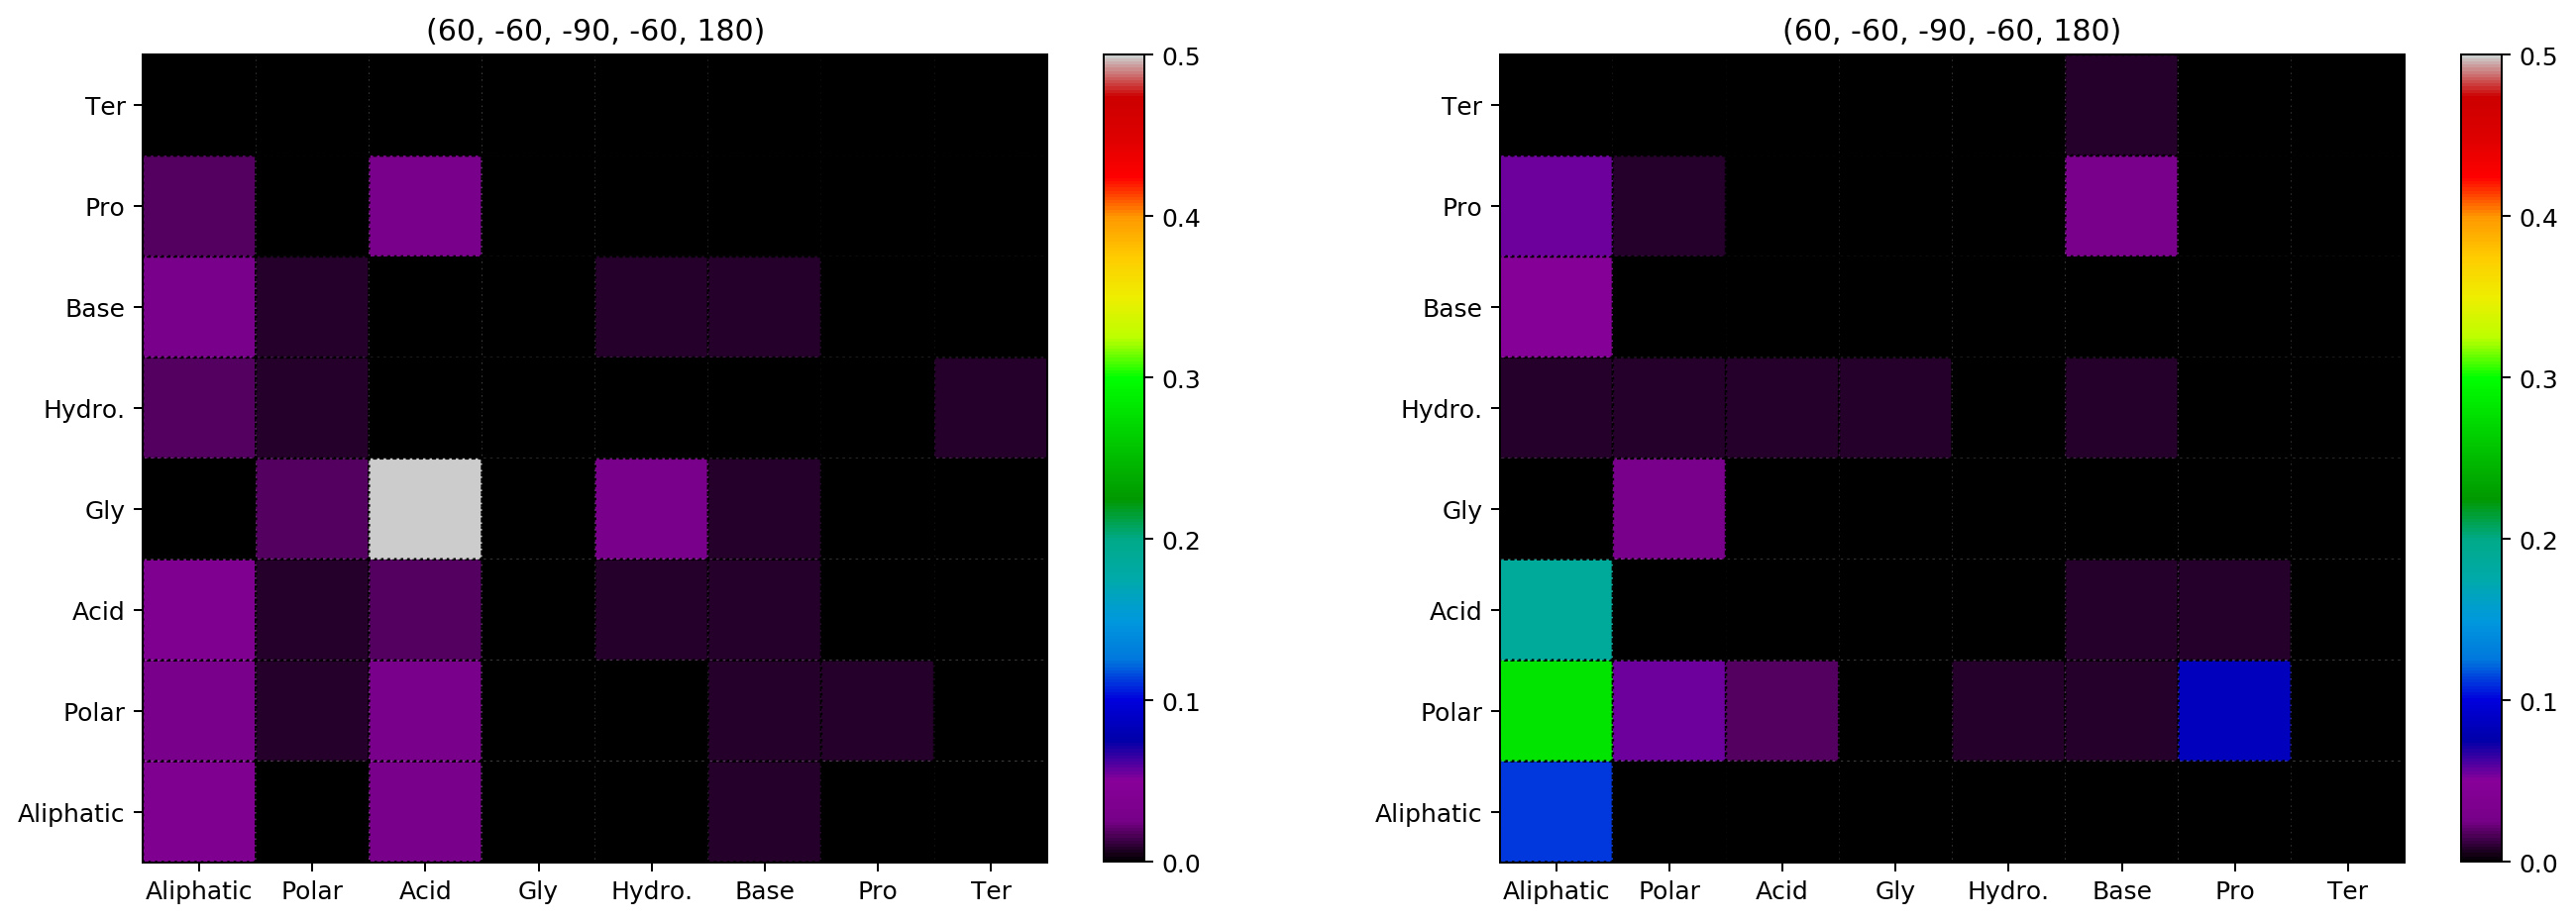

(60, -60, -90, 180, 60)
(60, -60, -90, 180, -60)
(60, -60, -90, 180, 180)
(60, -60, 90, 60, -60)
(60, -60, 90, 60, 180)
(60, -60, 90, -60, 60)
(60, -60, 90, -60, -60)
(60, -60, 90, -60, 180)
(60, -60, 90, 180, 60)
(60, -60, 90, 180, -60)
(60, -60, 90, 180, 180)
(60, 180, -90, 60, -60)
(60, 180, -90, 60, 180)
(60, 180, -90, -60, -60)
(60, 180, -90, -60, -60)


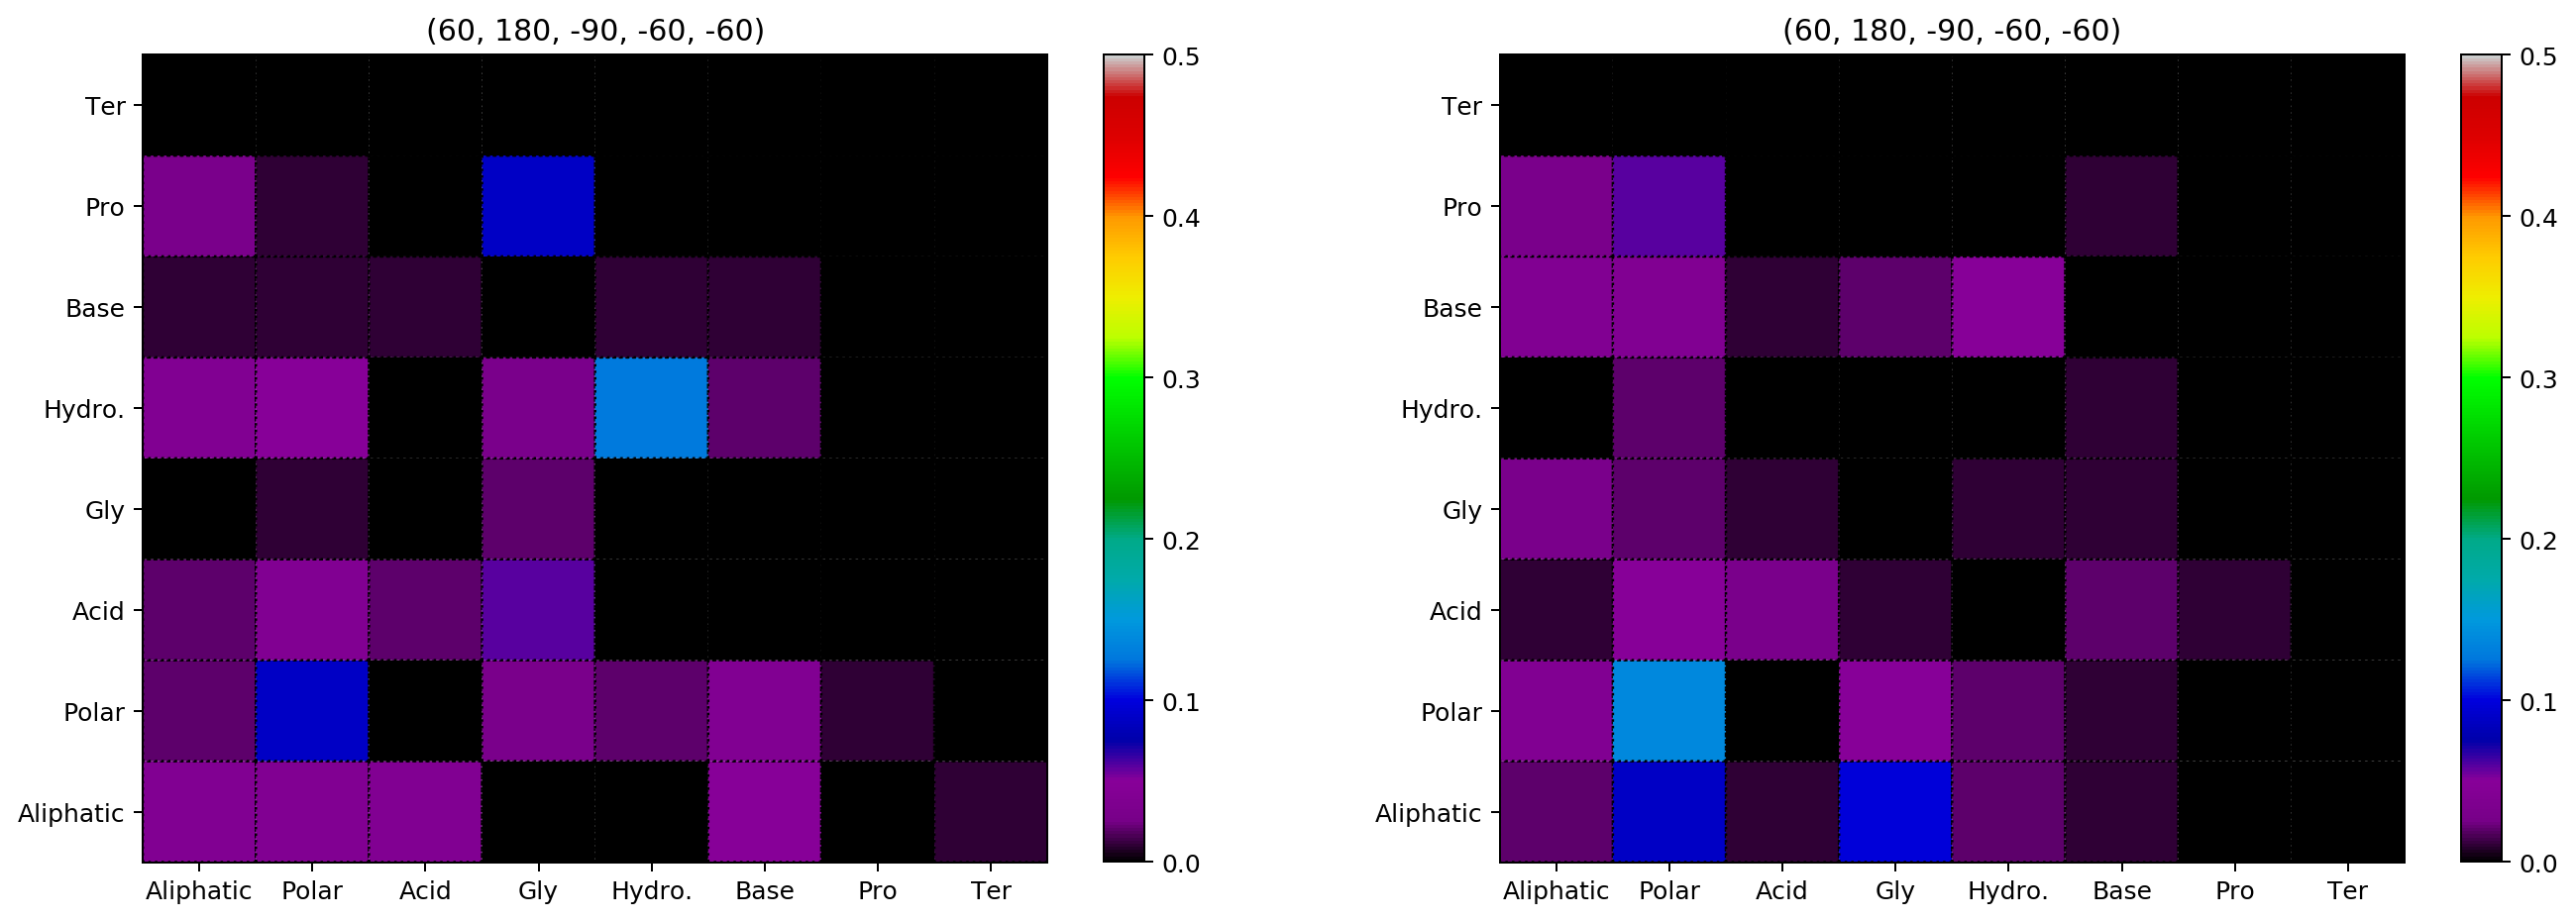

(60, 180, -90, -60, 180)
(60, 180, -90, 180, 60)
(60, 180, -90, 180, -60)
(60, 180, -90, 180, 180)
(60, 180, 90, 60, -60)
(60, 180, 90, 60, 180)
(60, 180, 90, 60, 180)


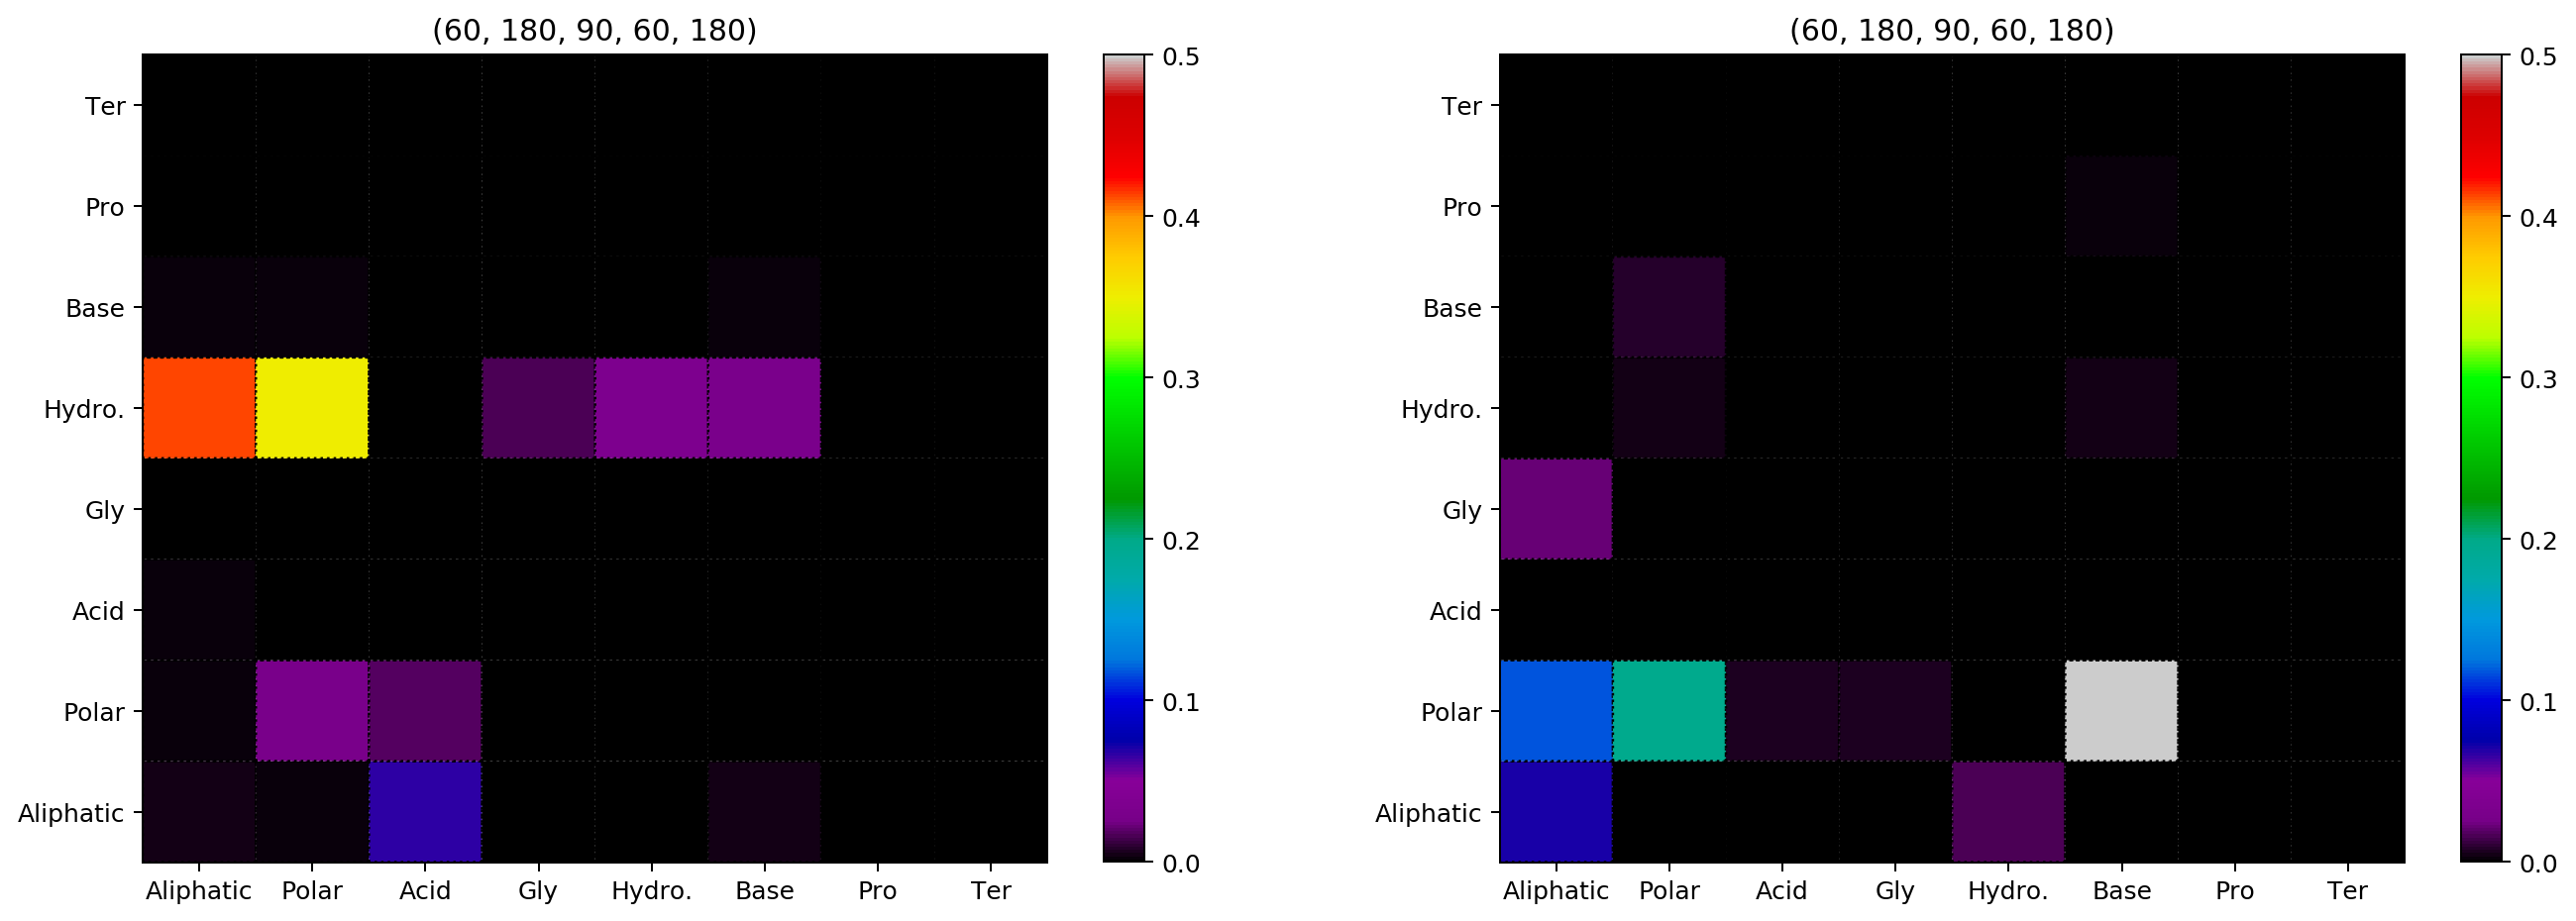

(60, 180, 90, -60, -60)
(60, 180, 90, -60, -60)


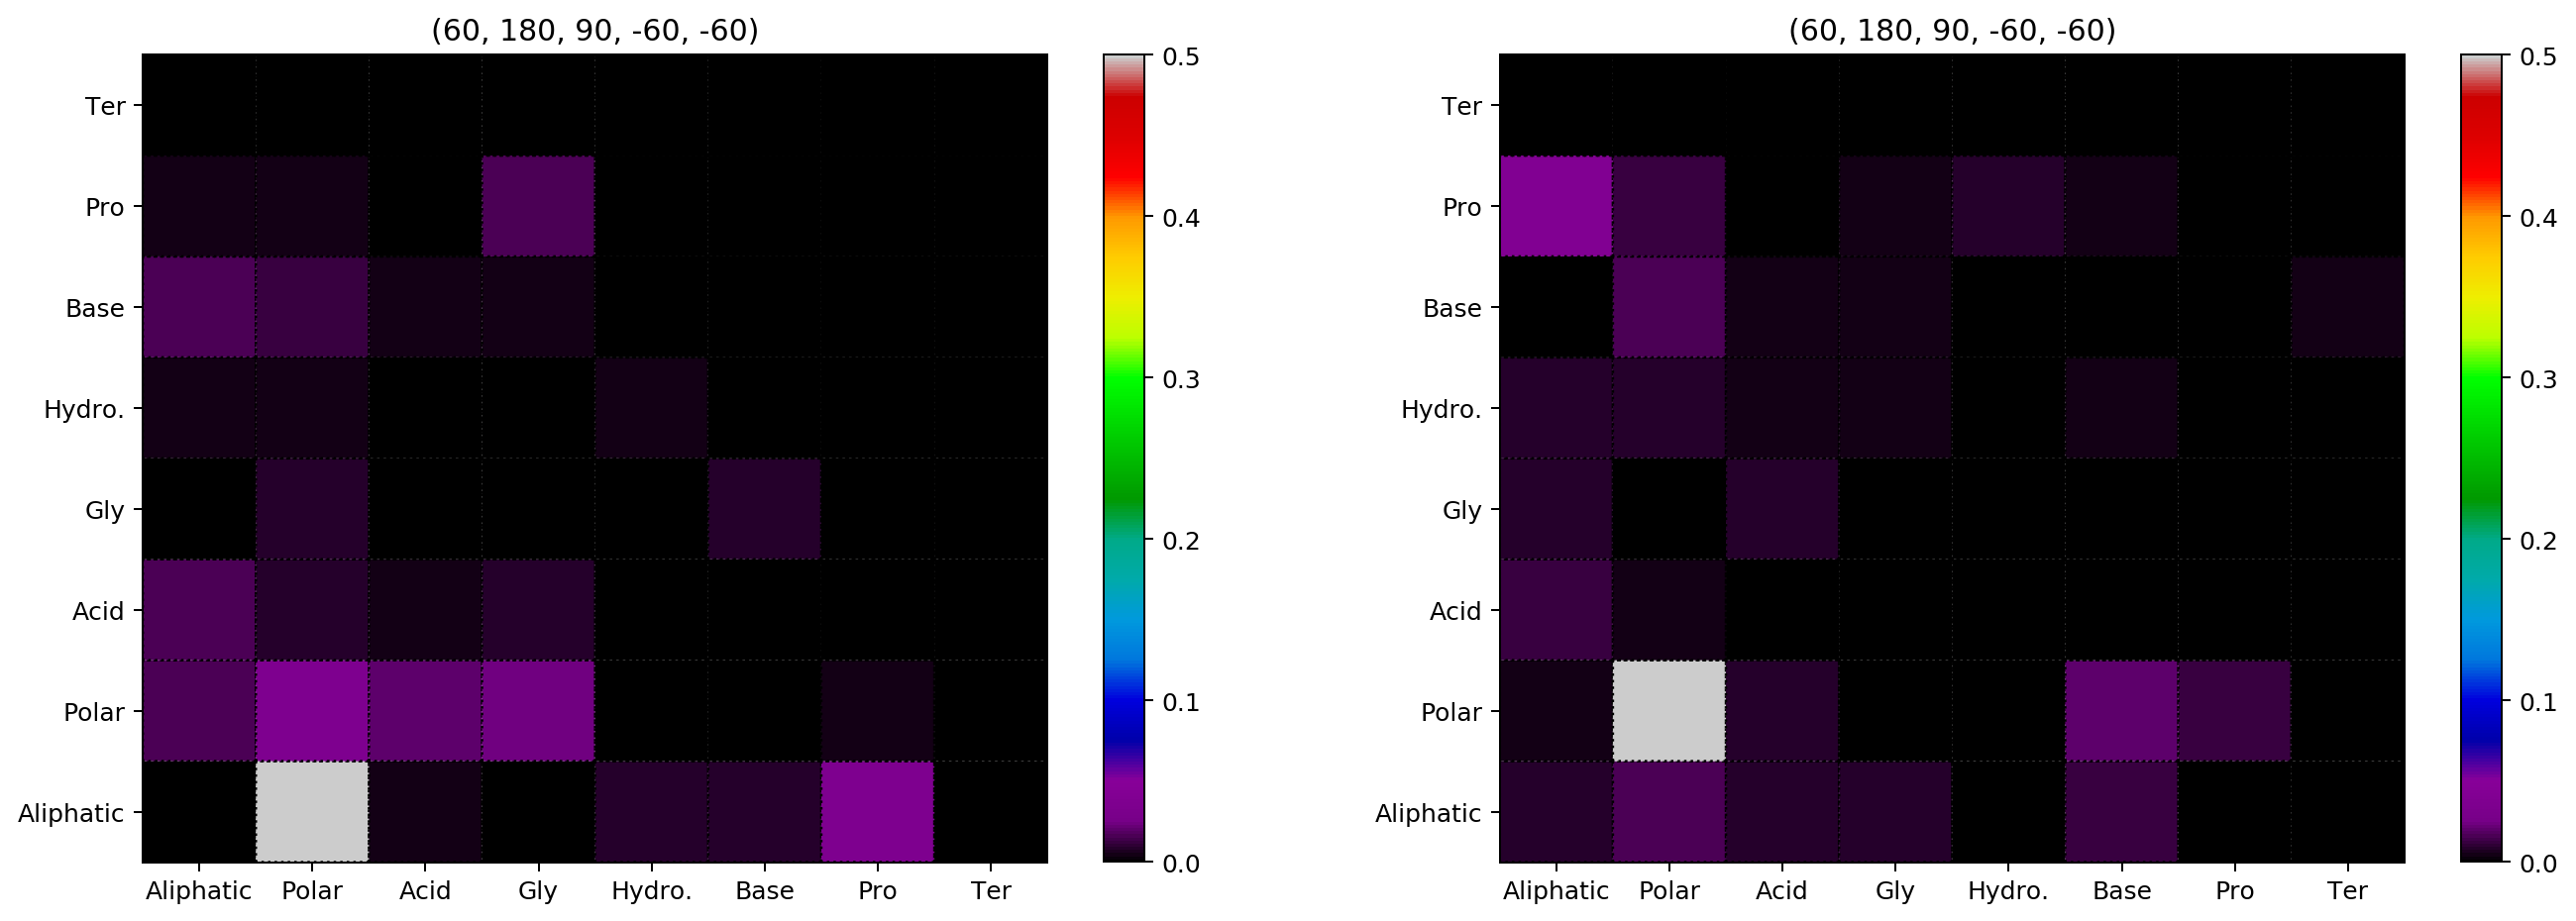

(60, 180, 90, -60, 180)
(60, 180, 90, 180, 60)
(60, 180, 90, 180, -60)
(60, 180, 90, 180, 180)
(-60, 60, -90, 60, -60)
(-60, 60, -90, 60, 180)
(-60, 60, -90, -60, -60)
(-60, 60, -90, -60, 180)
(-60, 60, -90, 180, -60)
(-60, 60, -90, 180, 180)
(-60, 60, 90, 60, -60)
(-60, 60, 90, 60, 180)
(-60, 60, 90, 60, 180)


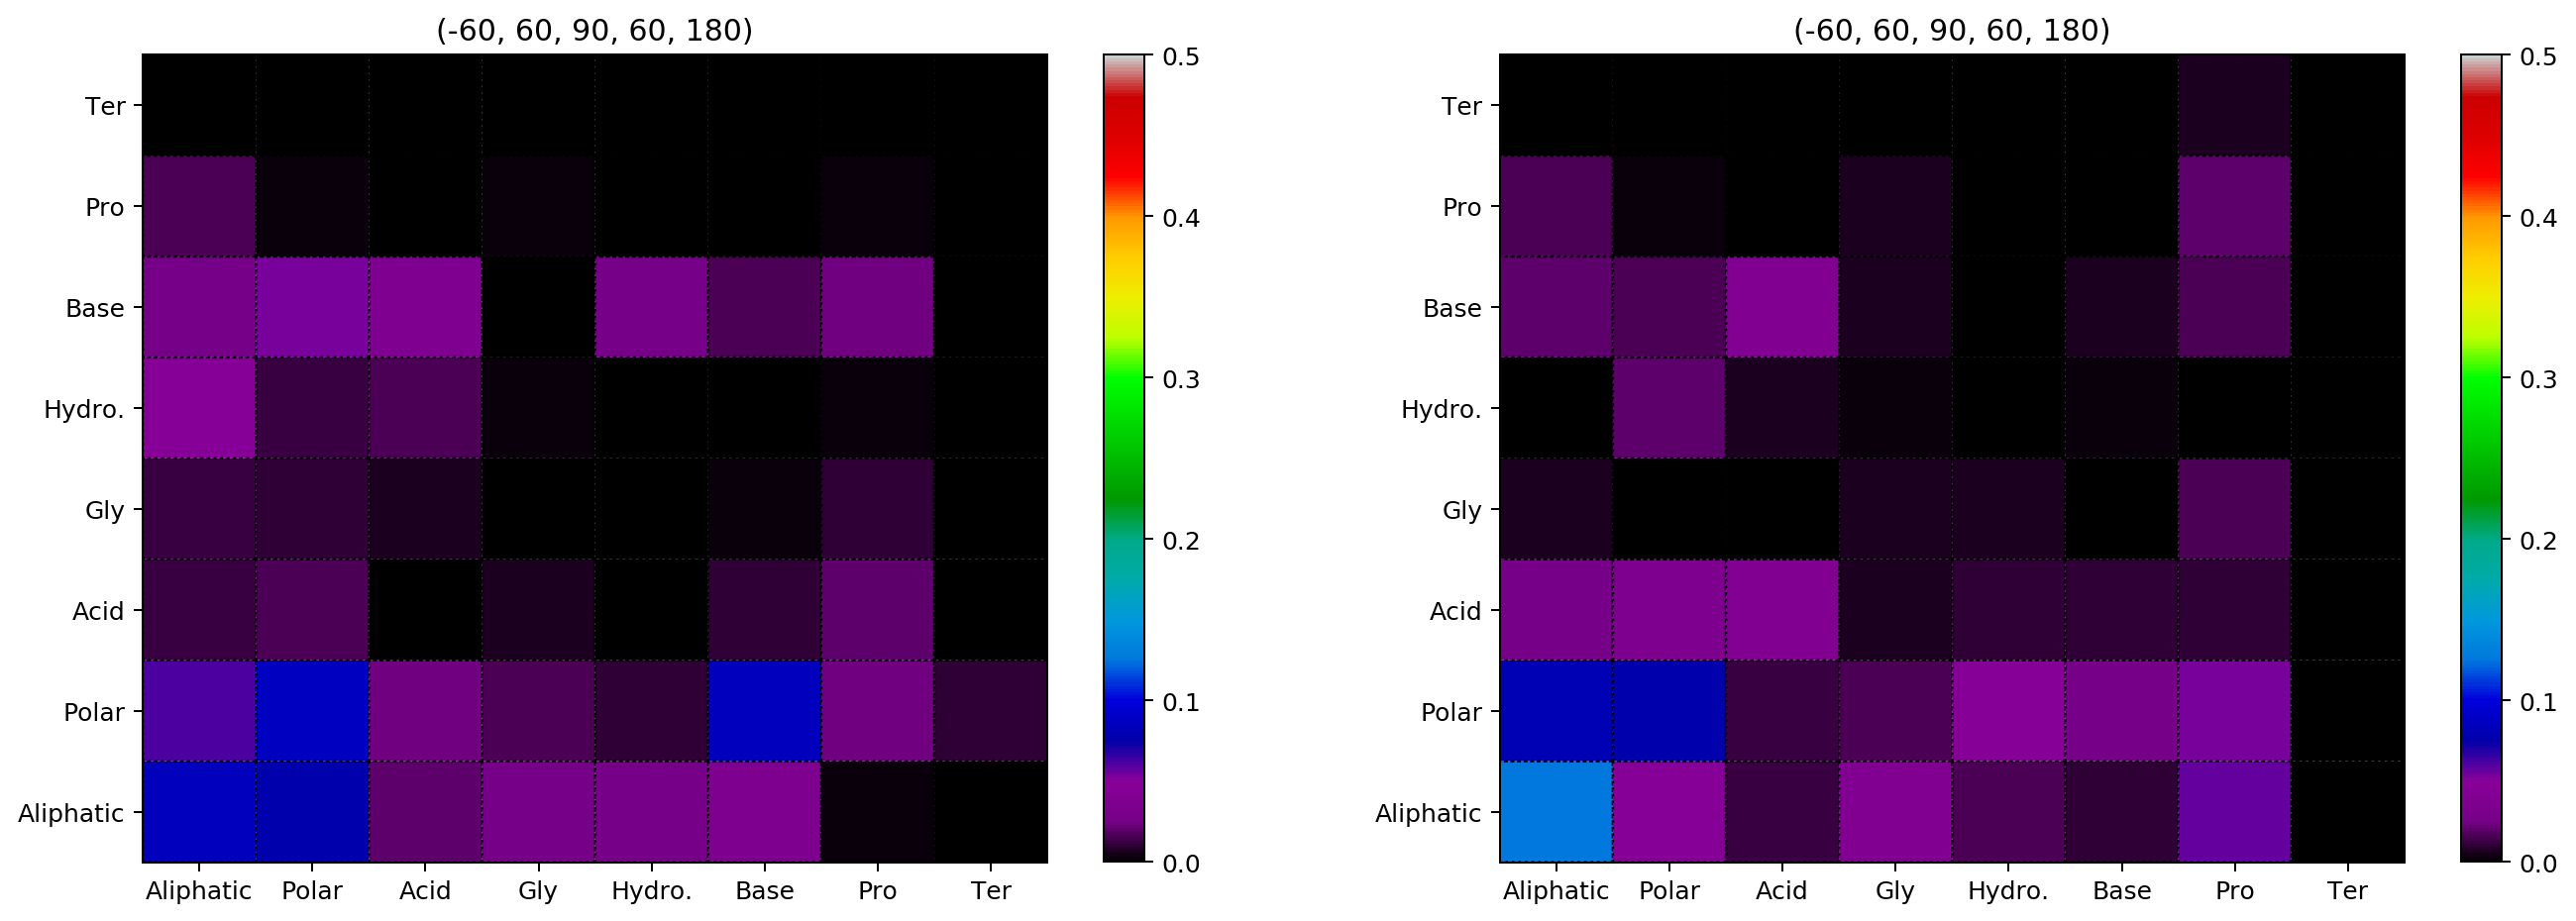

(-60, 60, 90, -60, -60)
(-60, 60, 90, -60, -60)


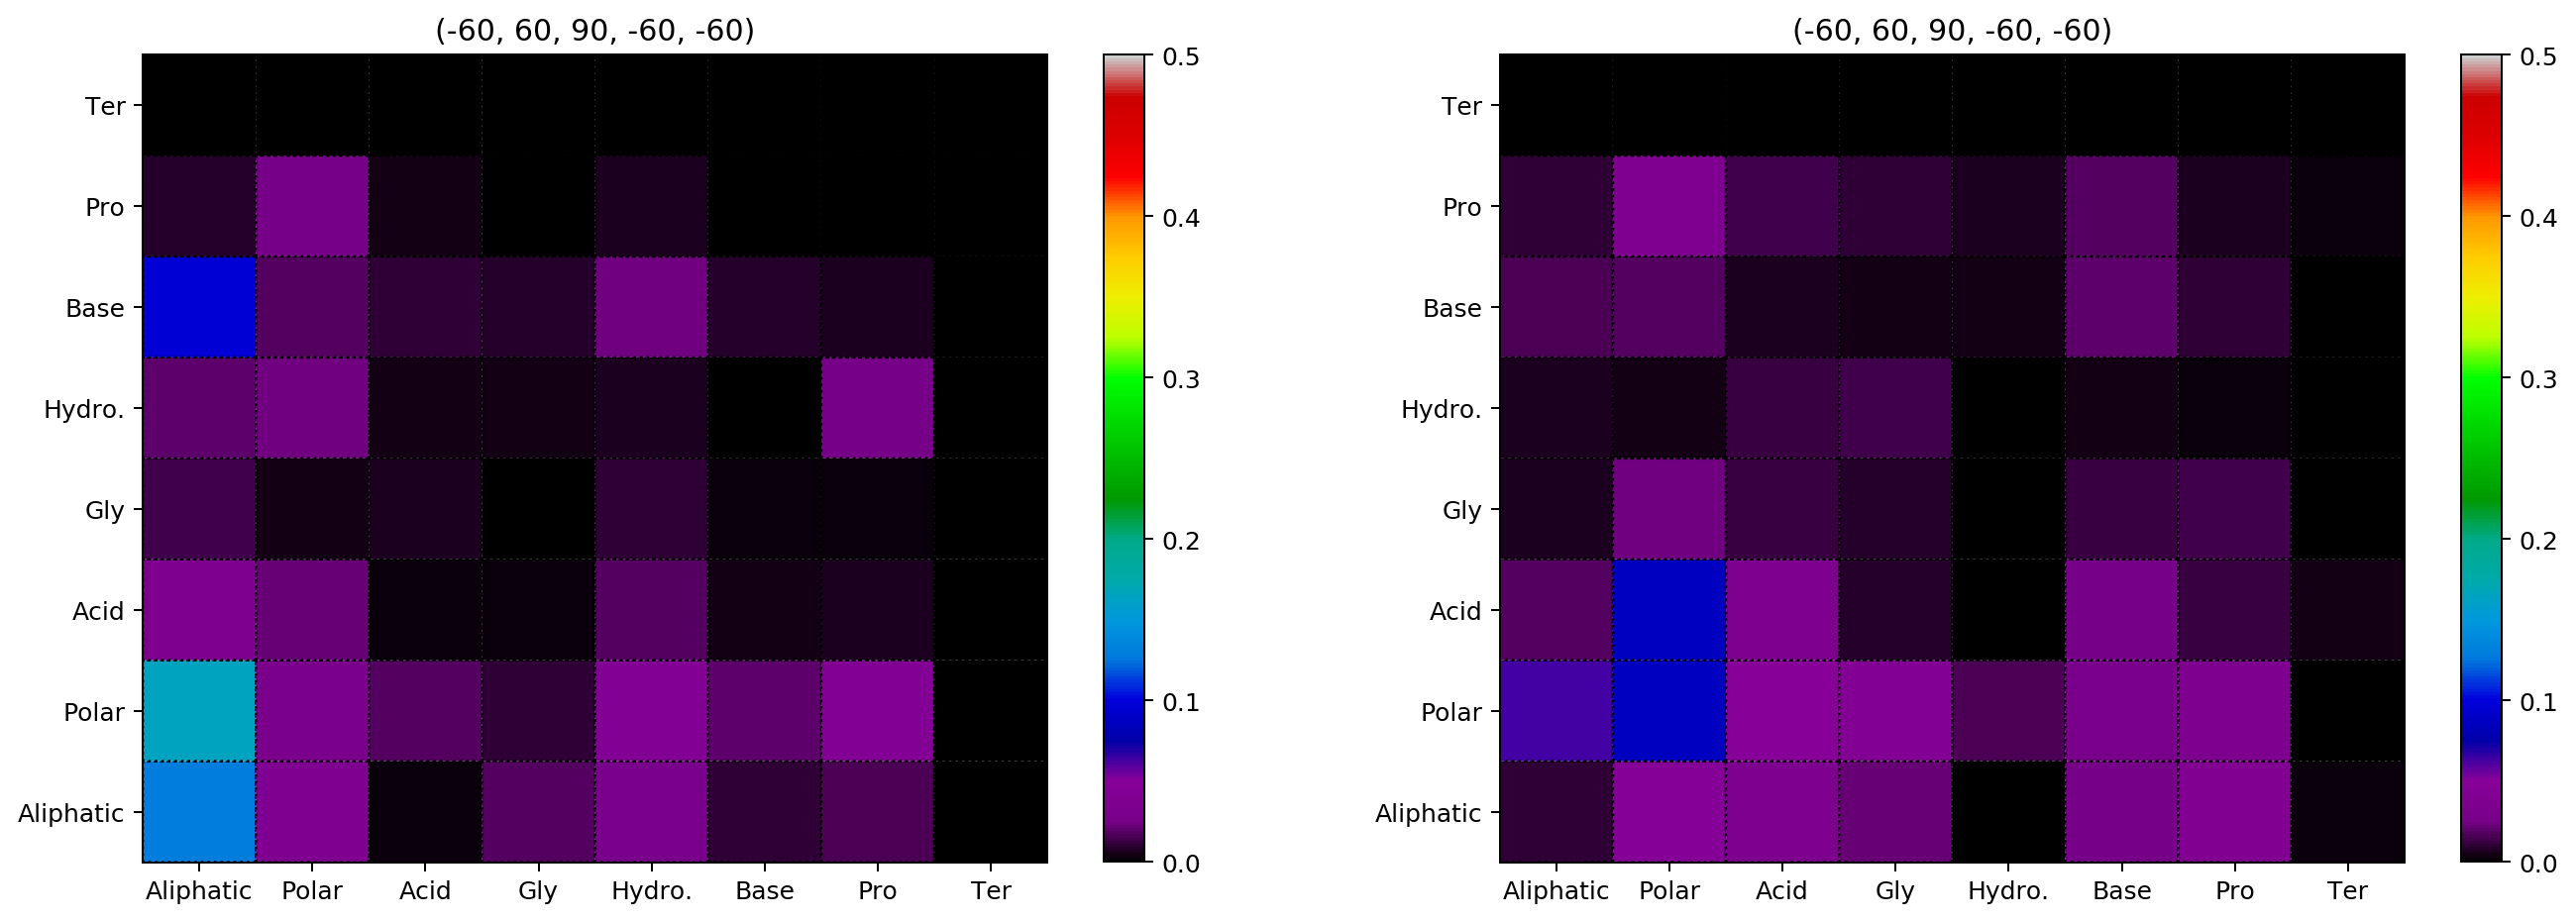

(-60, 60, 90, -60, 180)
(-60, 60, 90, 180, -60)
(-60, 60, 90, 180, 180)
(-60, -60, -90, 60, 180)
(-60, -60, -90, 60, 180)


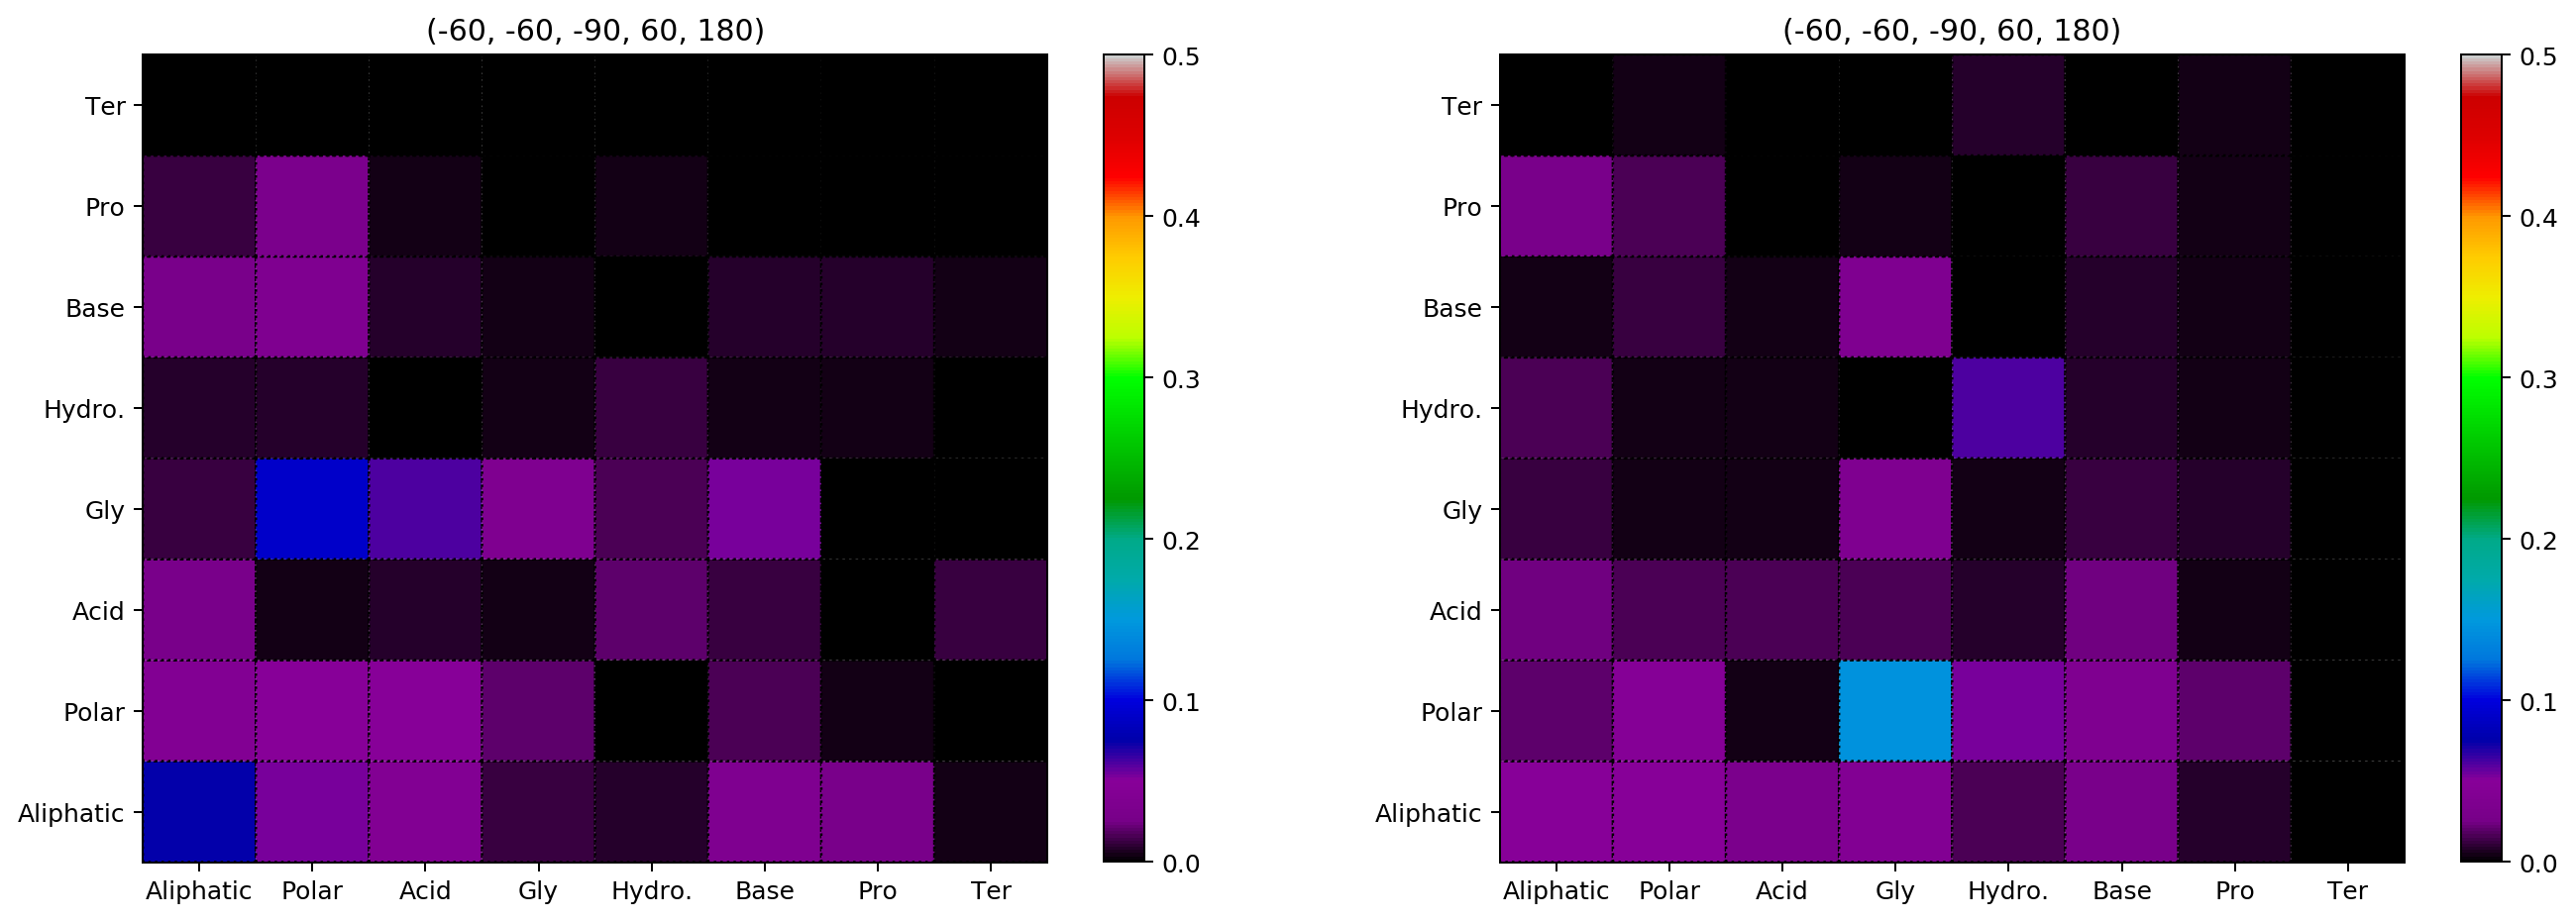

(-60, -60, -90, -60, -60)
(-60, -60, -90, -60, -60)


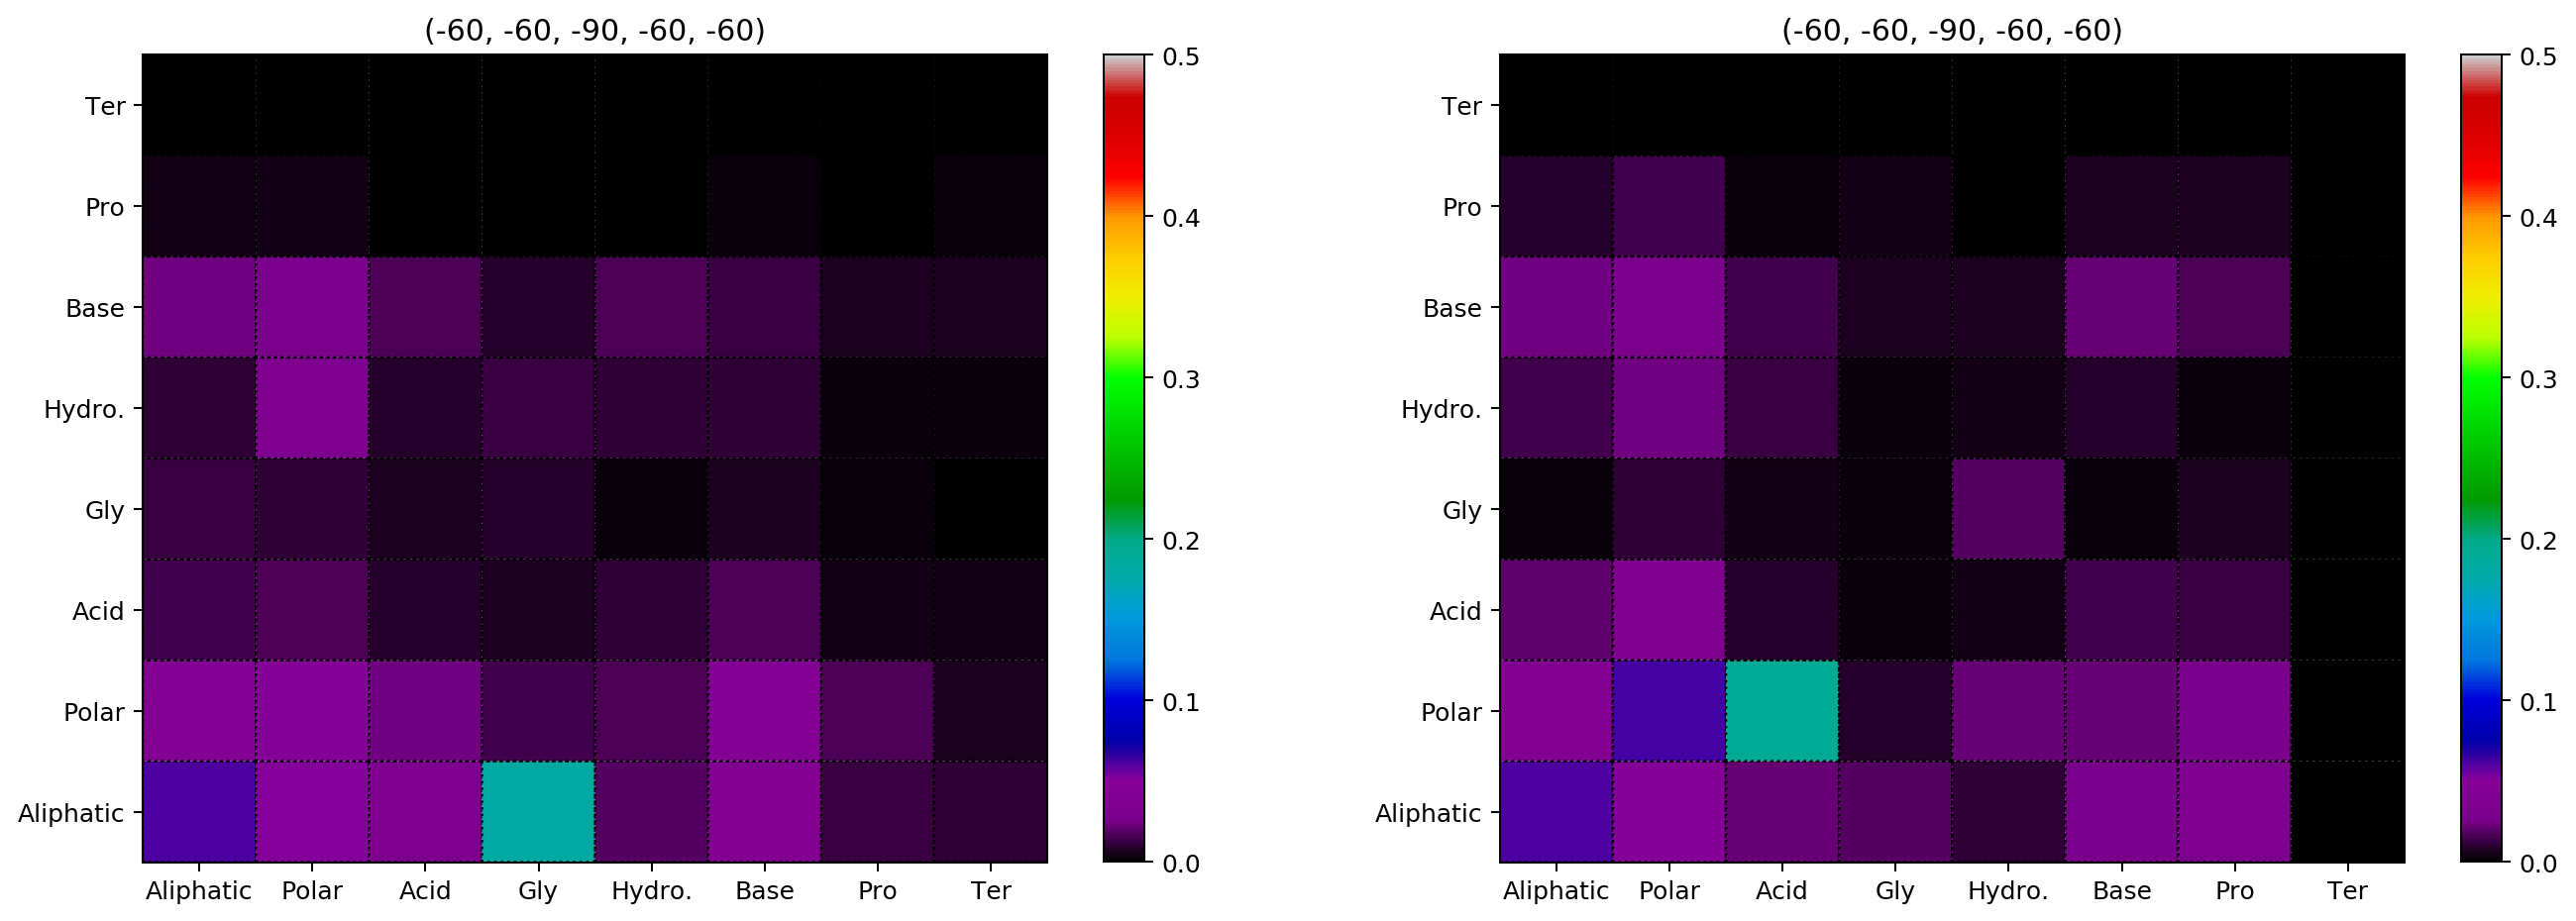

(-60, -60, -90, -60, 180)
(-60, -60, -90, -60, 180)


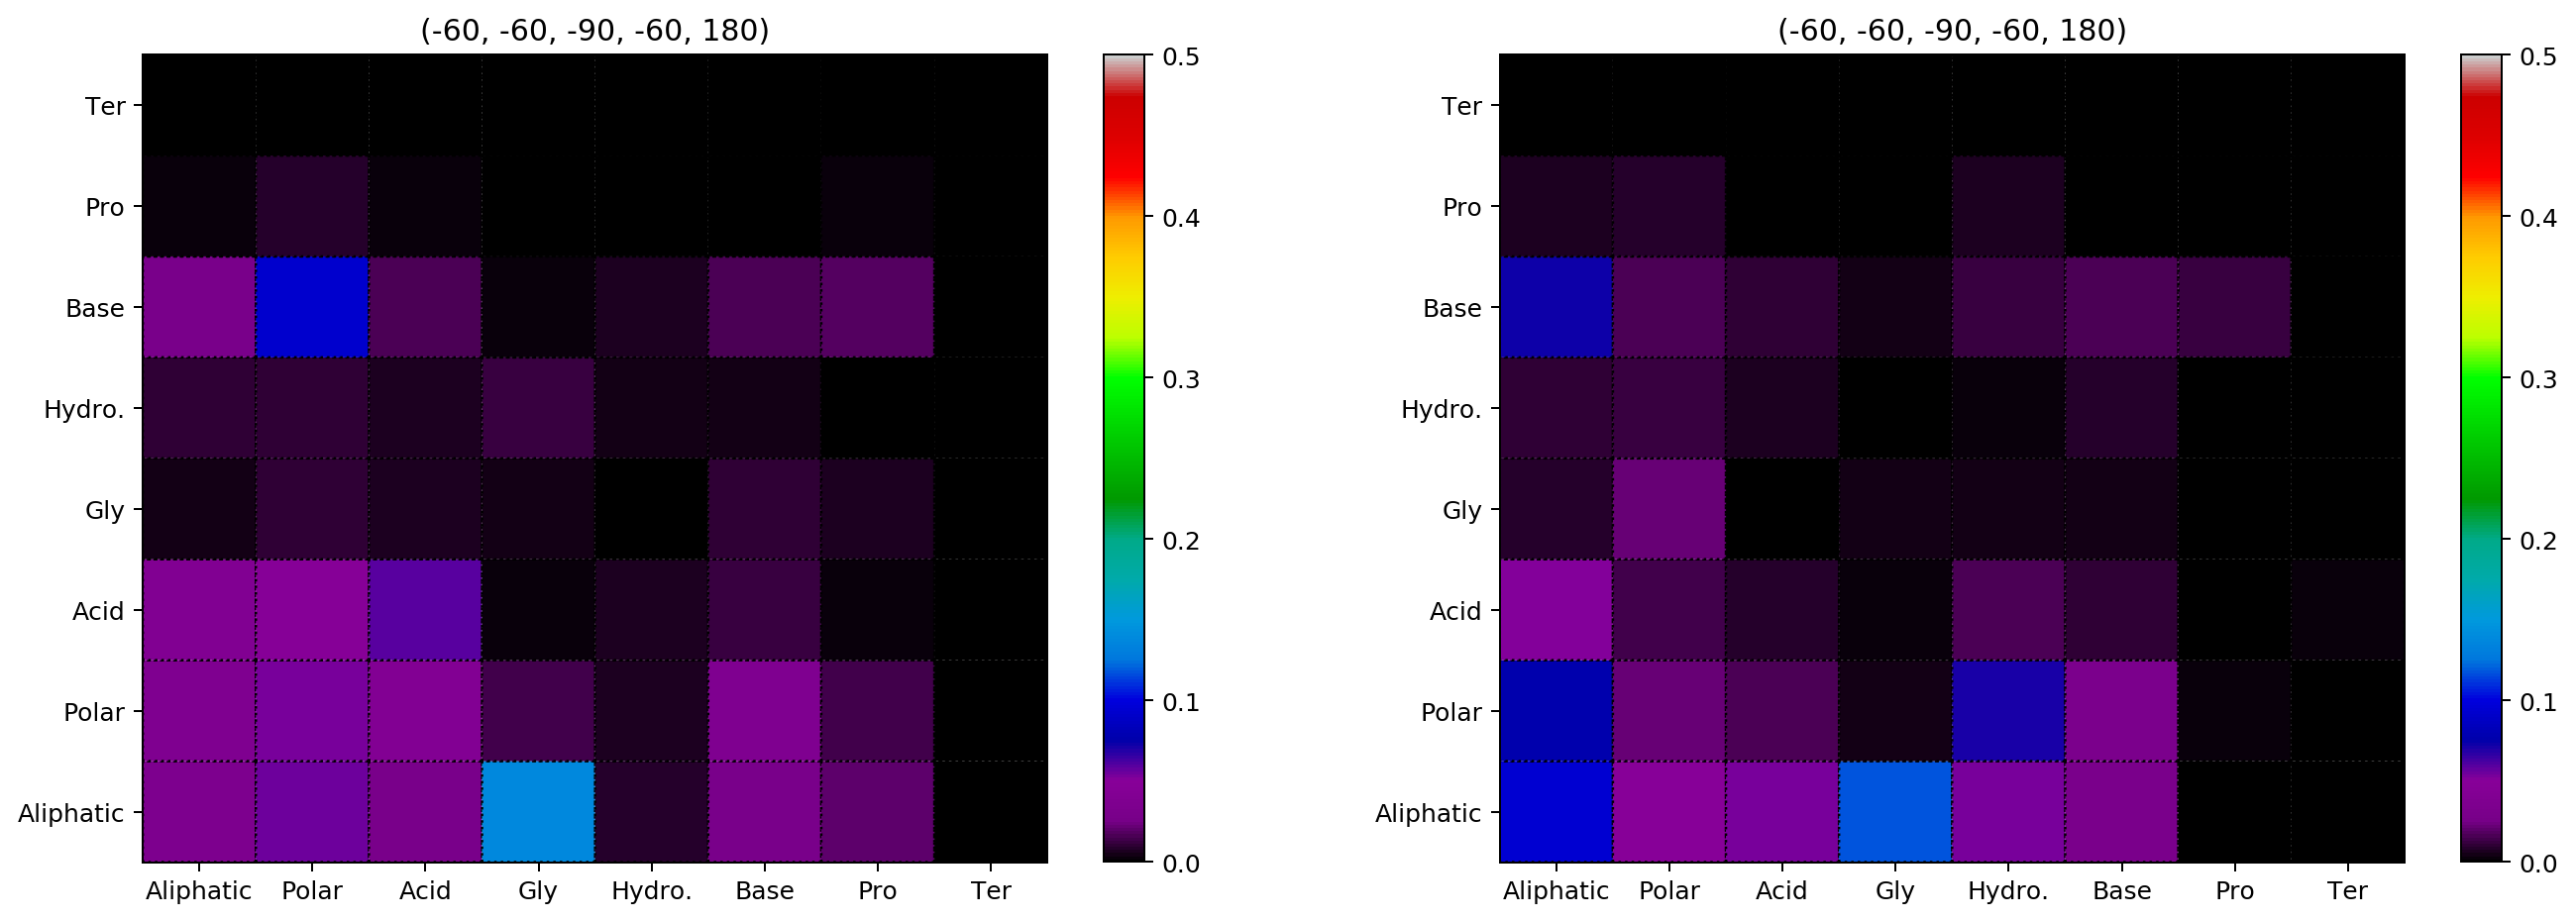

(-60, -60, -90, 180, -60)
(-60, -60, -90, 180, -60)


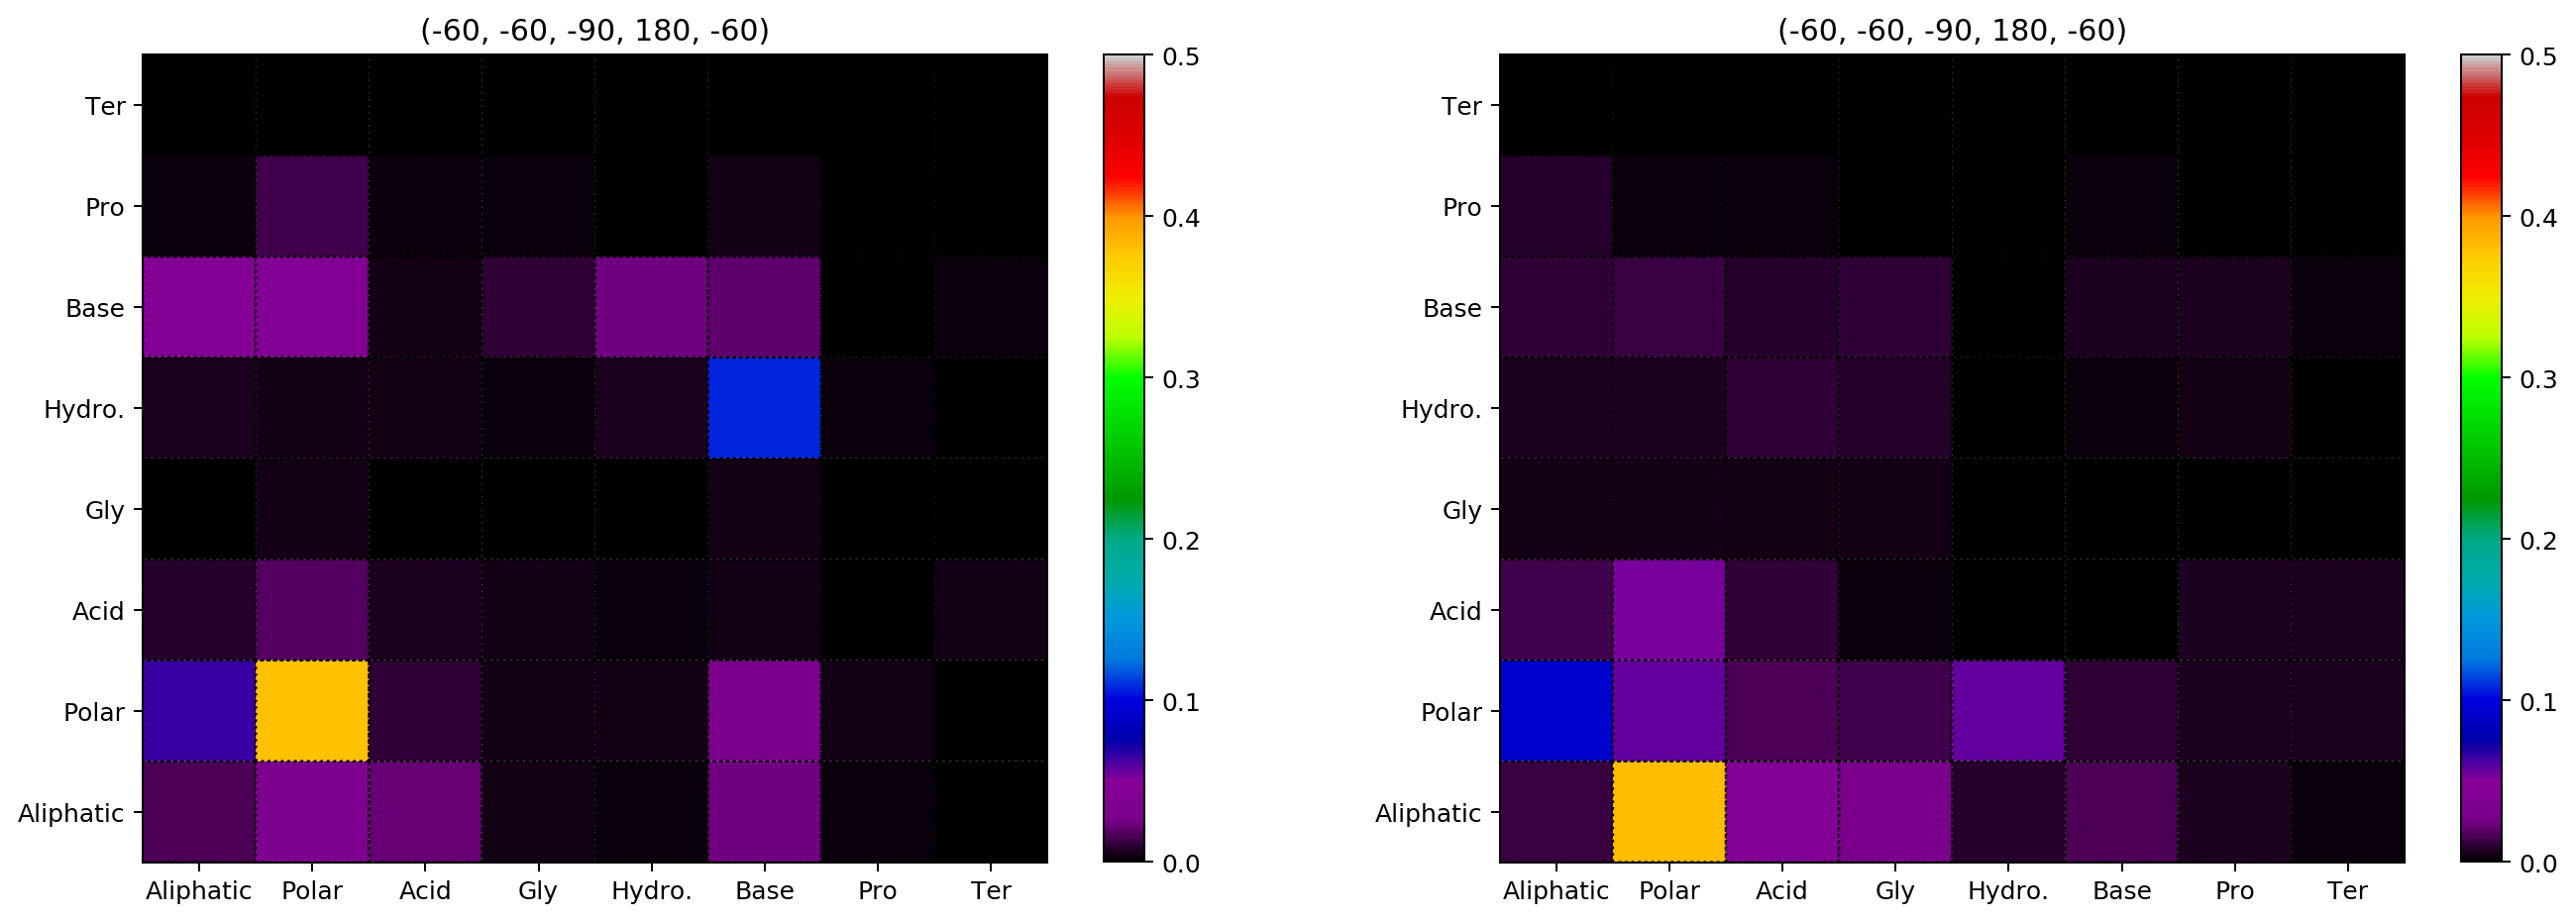

(-60, -60, -90, 180, 180)
(-60, -60, -90, 180, 180)


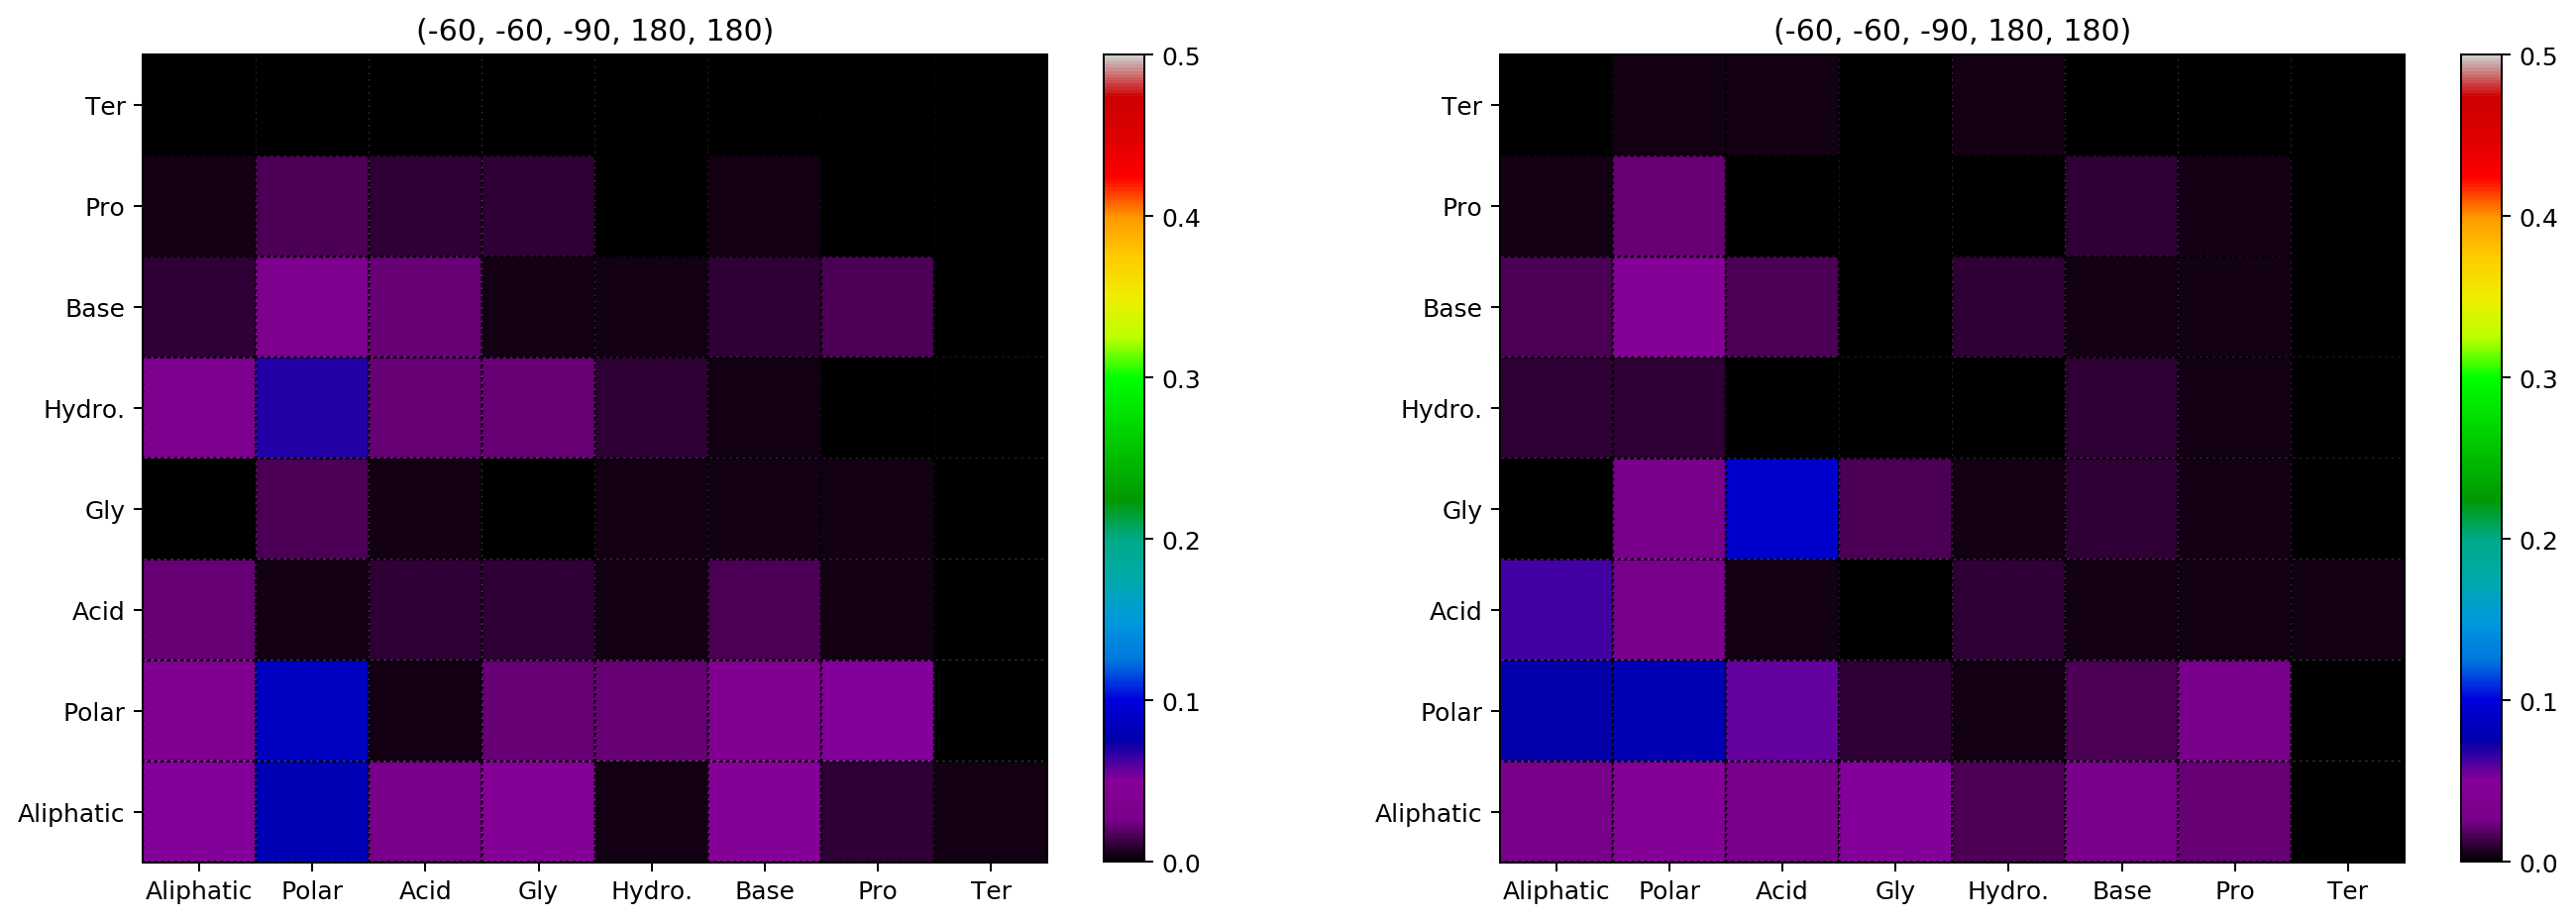

(-60, -60, 90, 60, 180)
(-60, -60, 90, 60, 180)


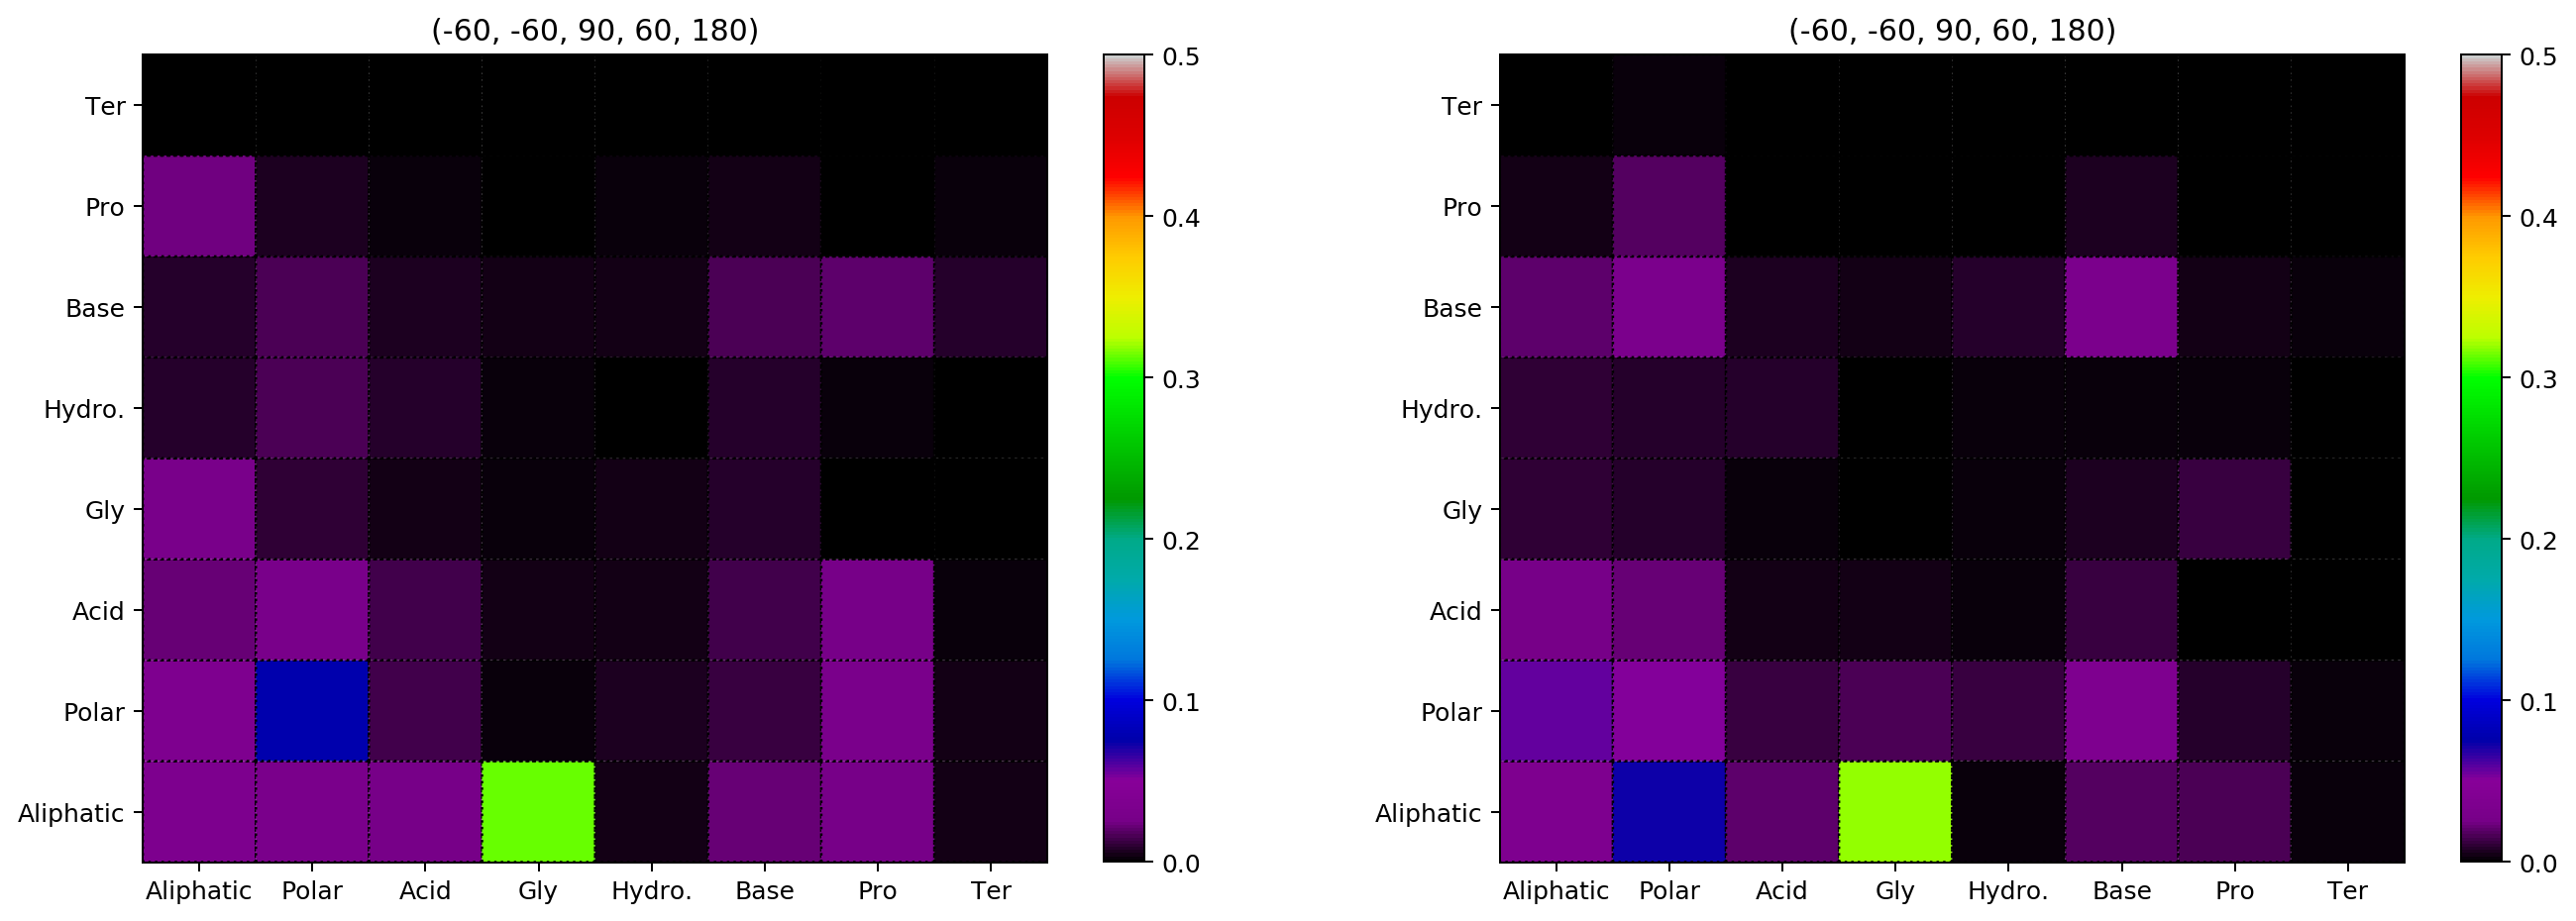

(-60, -60, 90, -60, -60)
(-60, -60, 90, -60, -60)


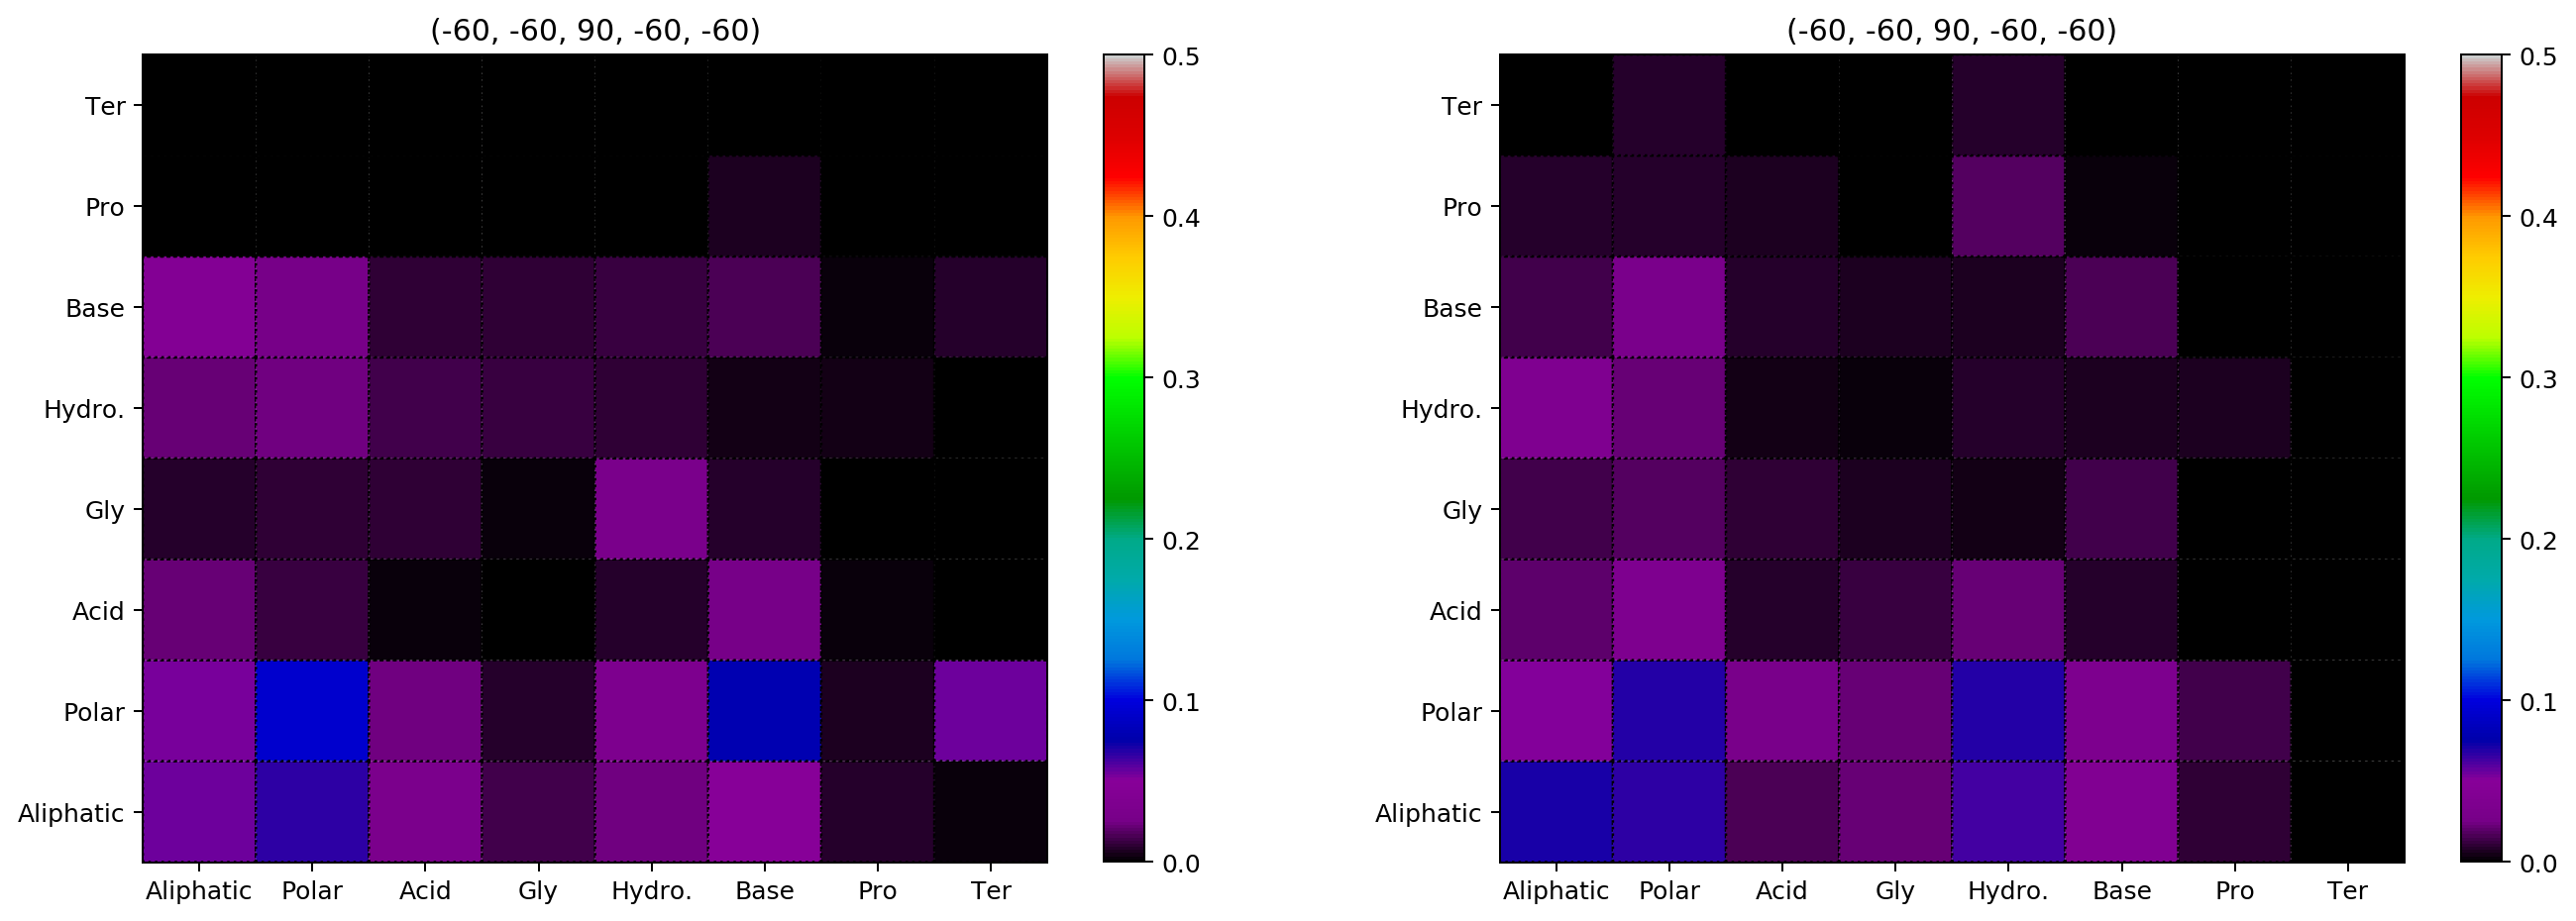

(-60, -60, 90, -60, 180)
(-60, -60, 90, 180, -60)
(-60, -60, 90, 180, -60)


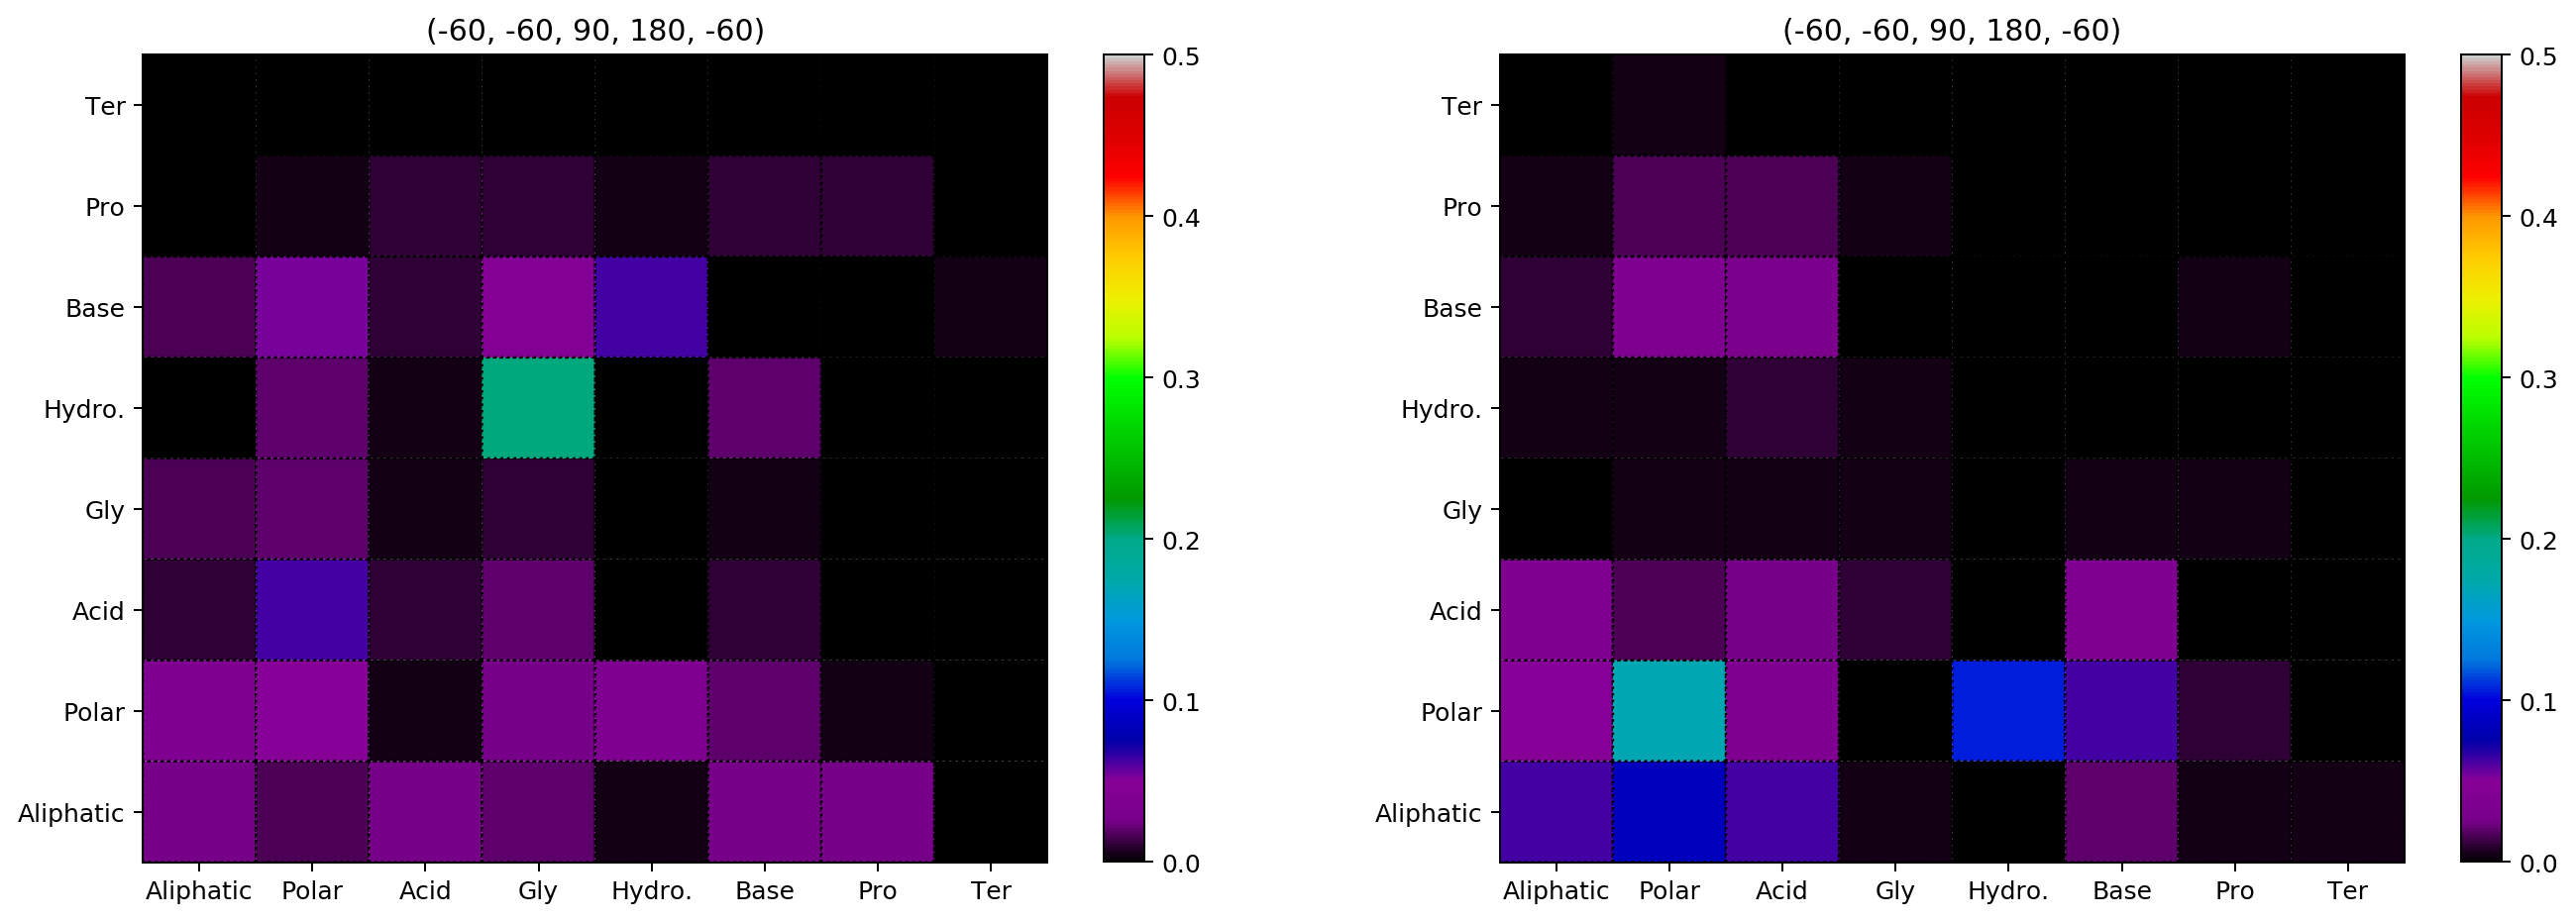

(-60, -60, 90, 180, 180)
(-60, 180, -90, 60, 180)
(-60, 180, -90, -60, 180)
(-60, 180, -90, 180, -60)
(-60, 180, -90, 180, 180)
(-60, 180, 90, 60, 180)
(-60, 180, 90, 60, 180)


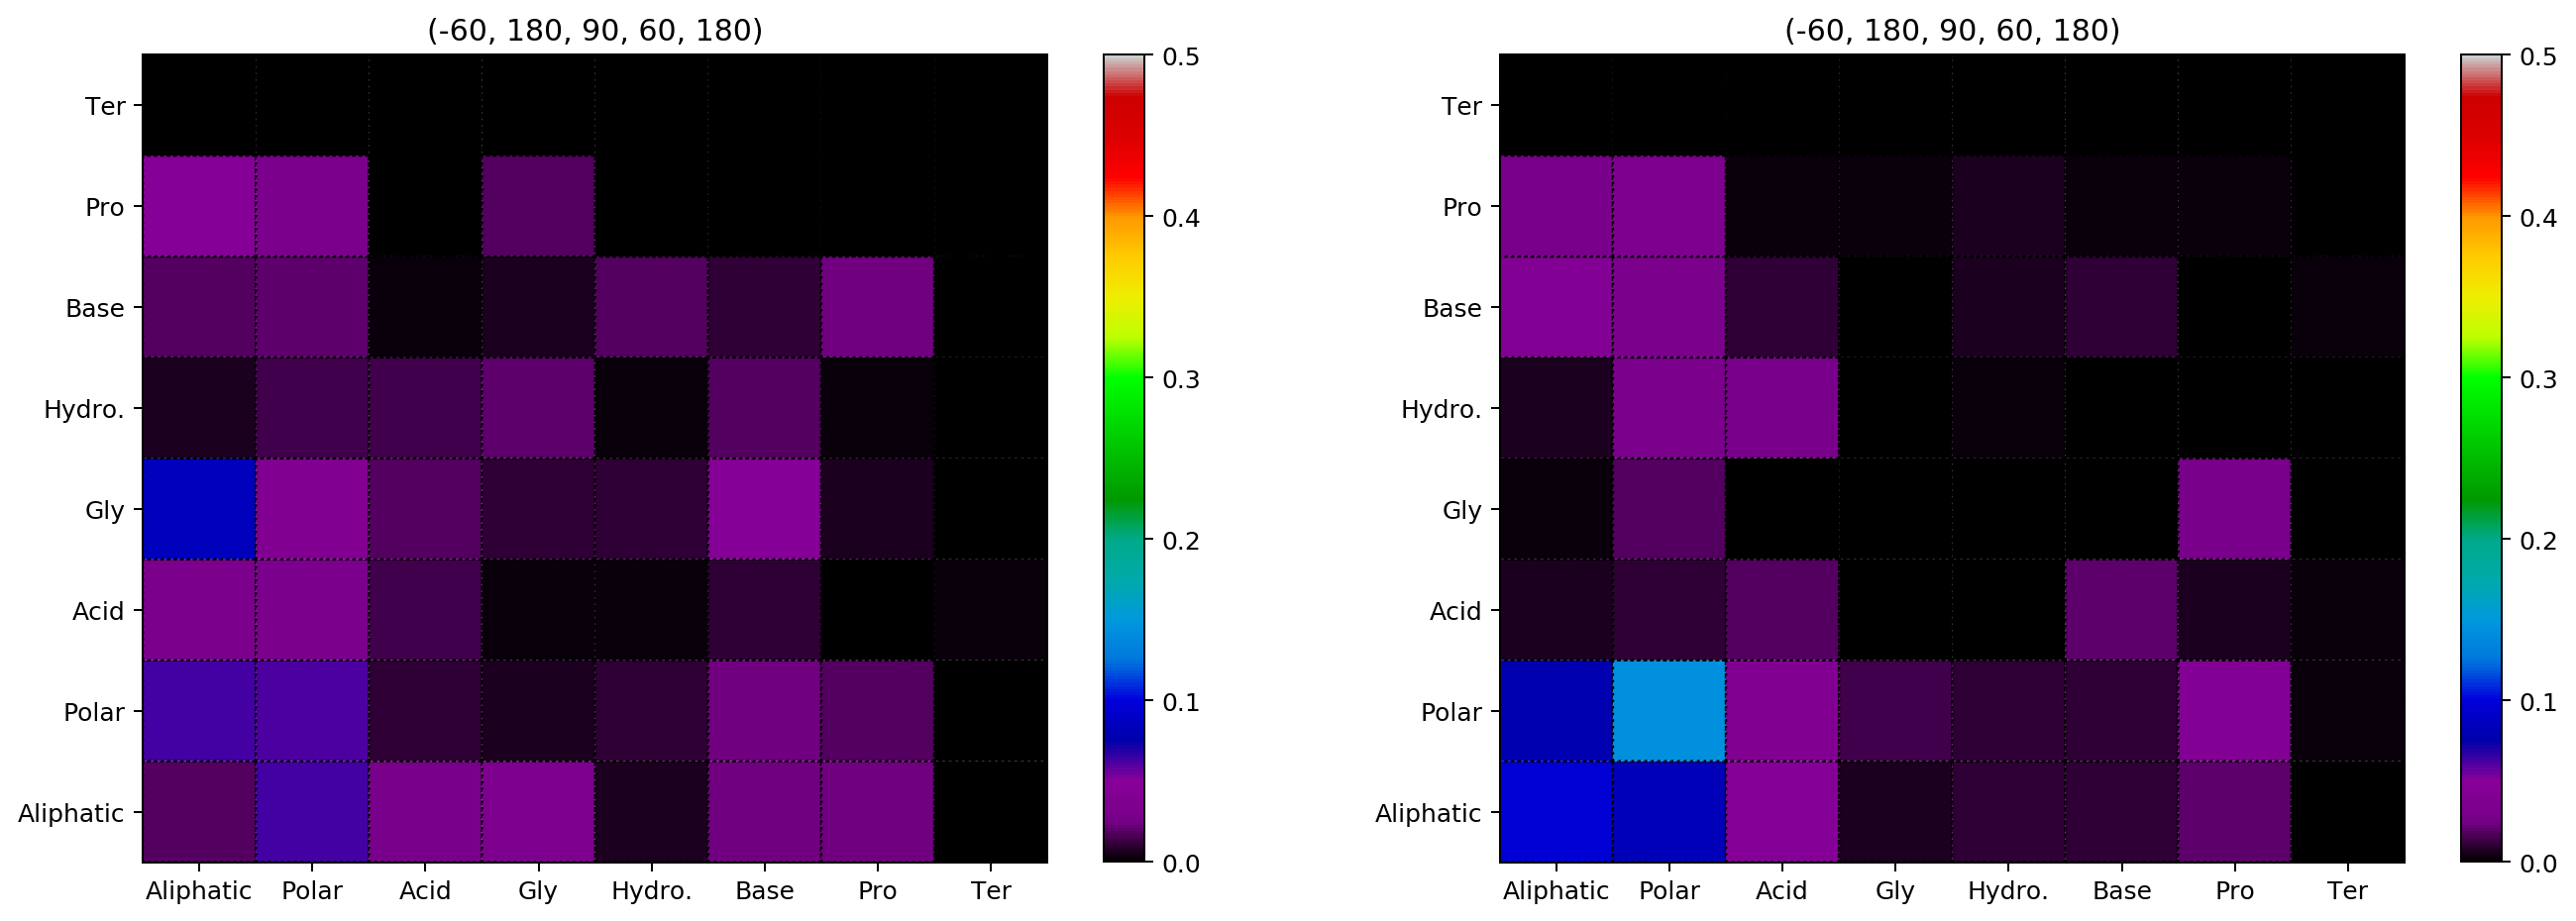

(-60, 180, 90, -60, 180)
(-60, 180, 90, 180, -60)
(-60, 180, 90, 180, 180)
(180, 60, -90, 60, 180)
(180, 60, -90, -60, 180)
(180, 60, -90, -60, 180)


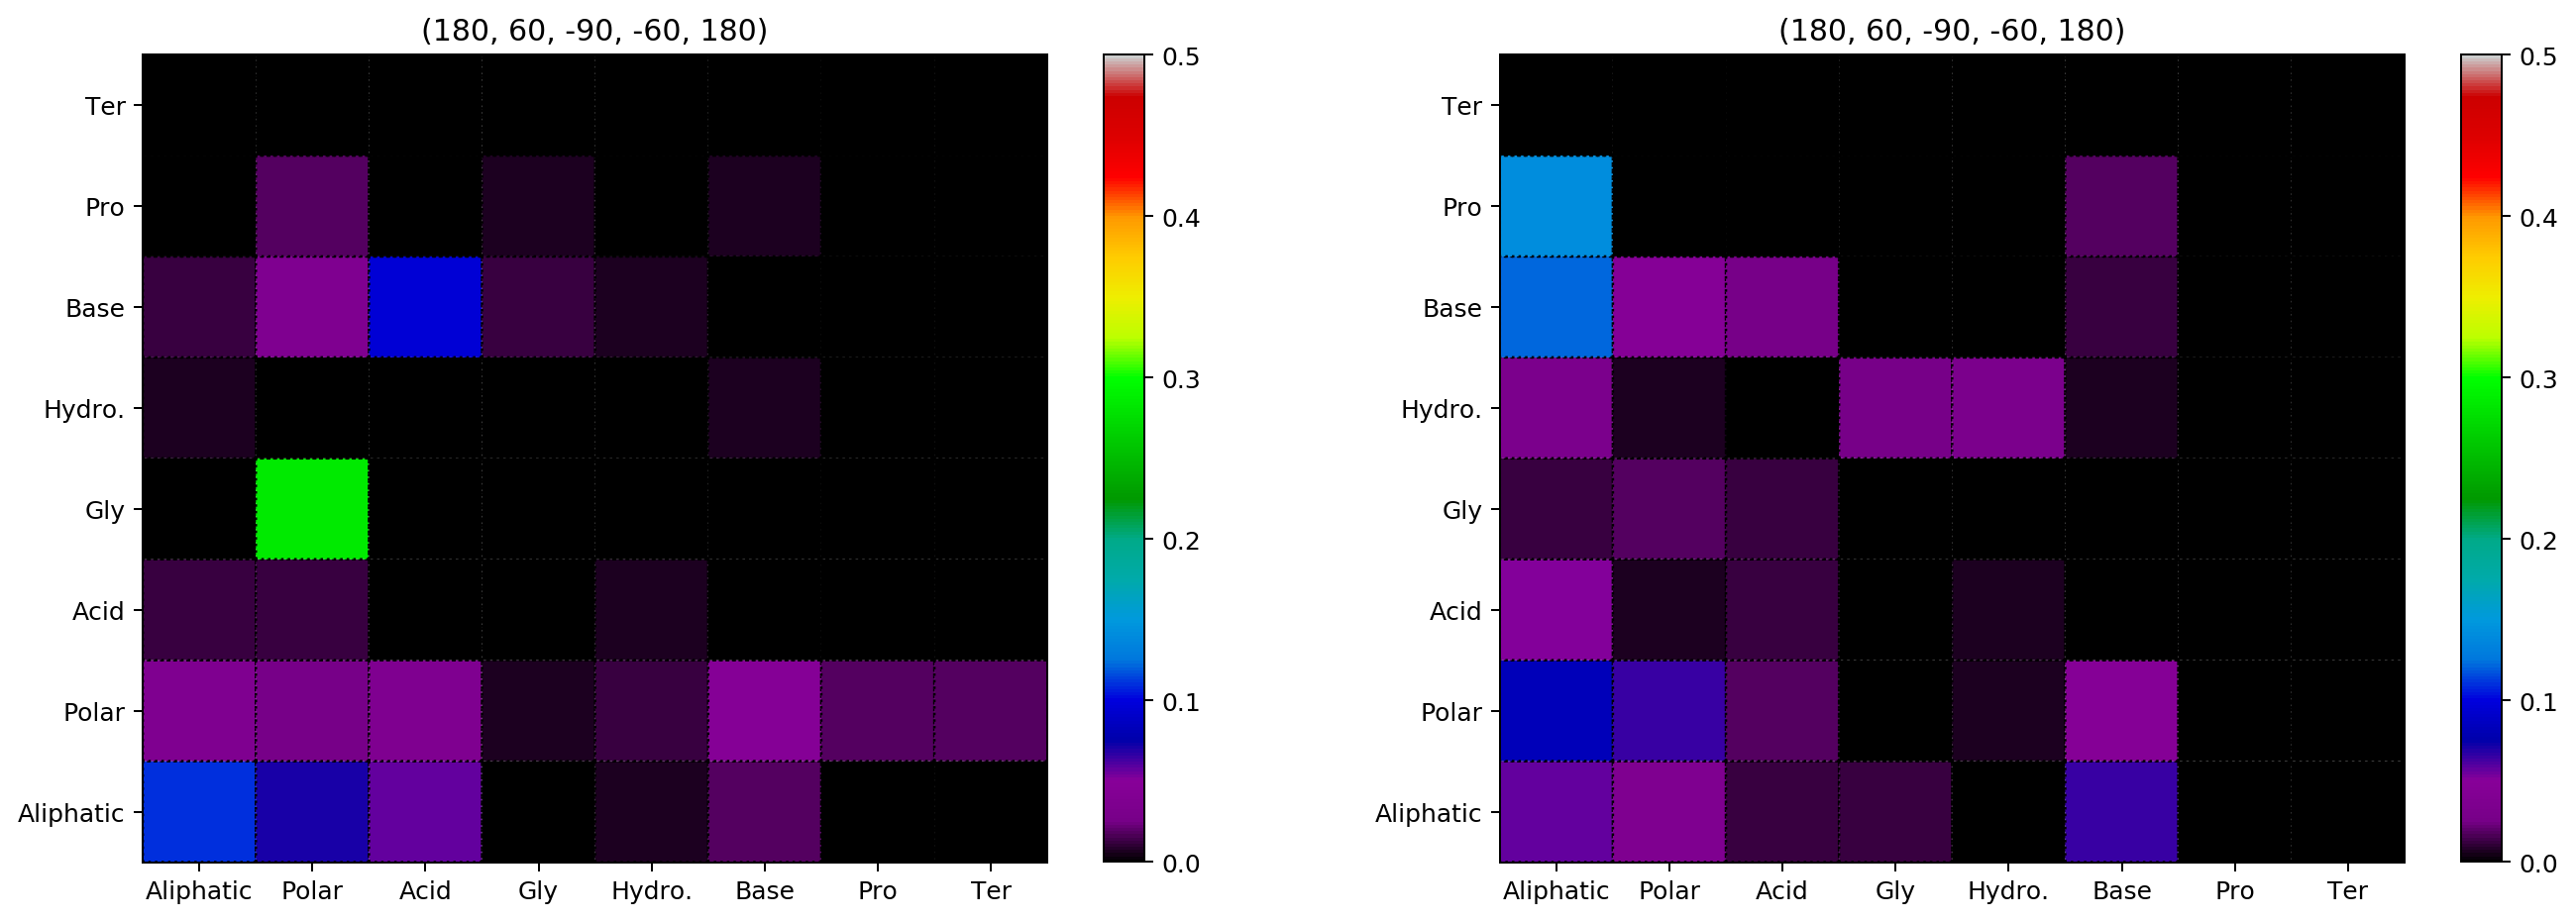

(180, 60, -90, 180, 180)
(180, 60, 90, 60, 180)
(180, 60, 90, 60, 180)


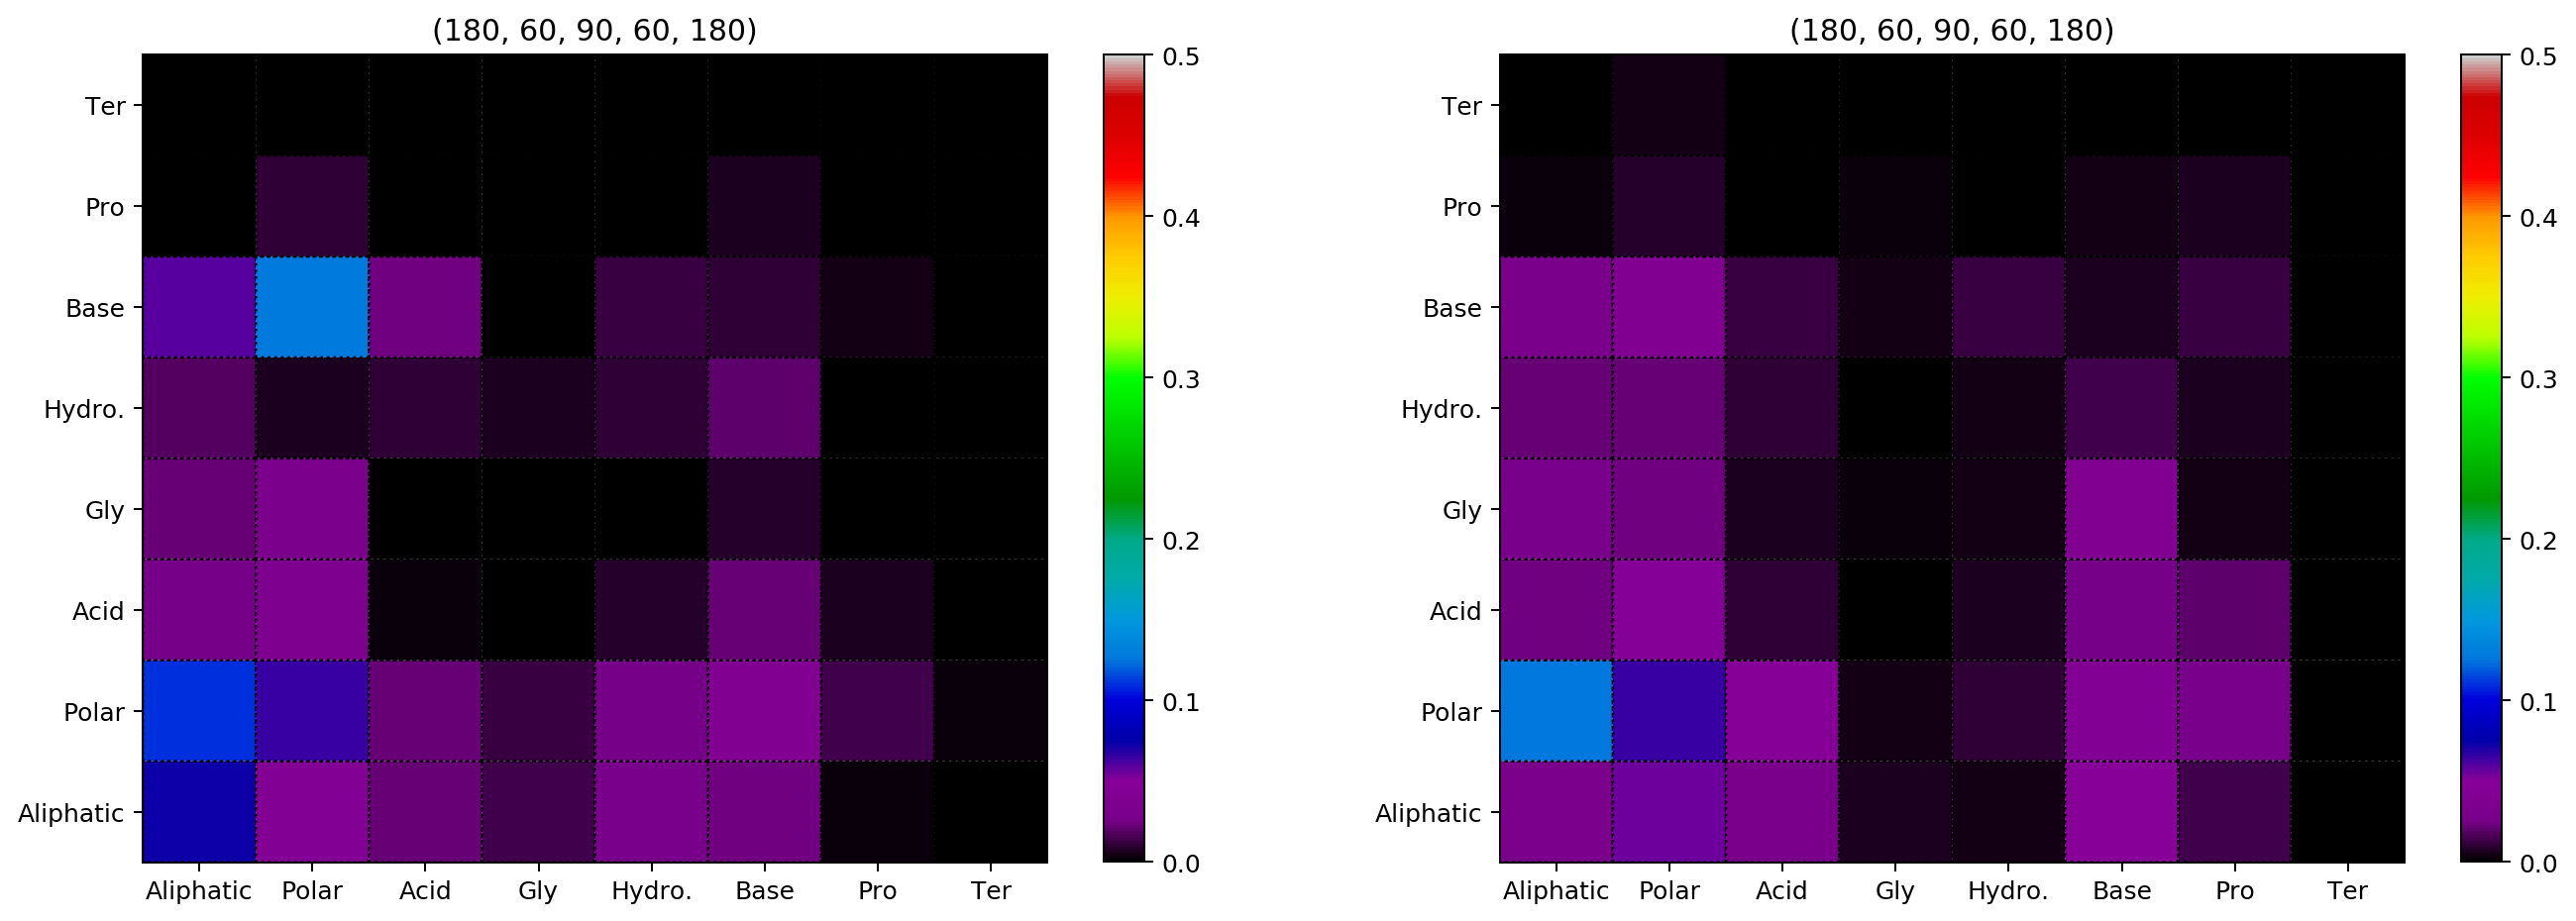

(180, 60, 90, -60, 180)
(180, 60, 90, 180, 180)
(180, -60, -90, -60, 180)
(180, -60, -90, 180, 180)
(180, -60, 90, -60, 180)
(180, -60, 90, 180, 180)
(180, 180, -90, 180, 180)
(180, 180, -90, 180, 180)


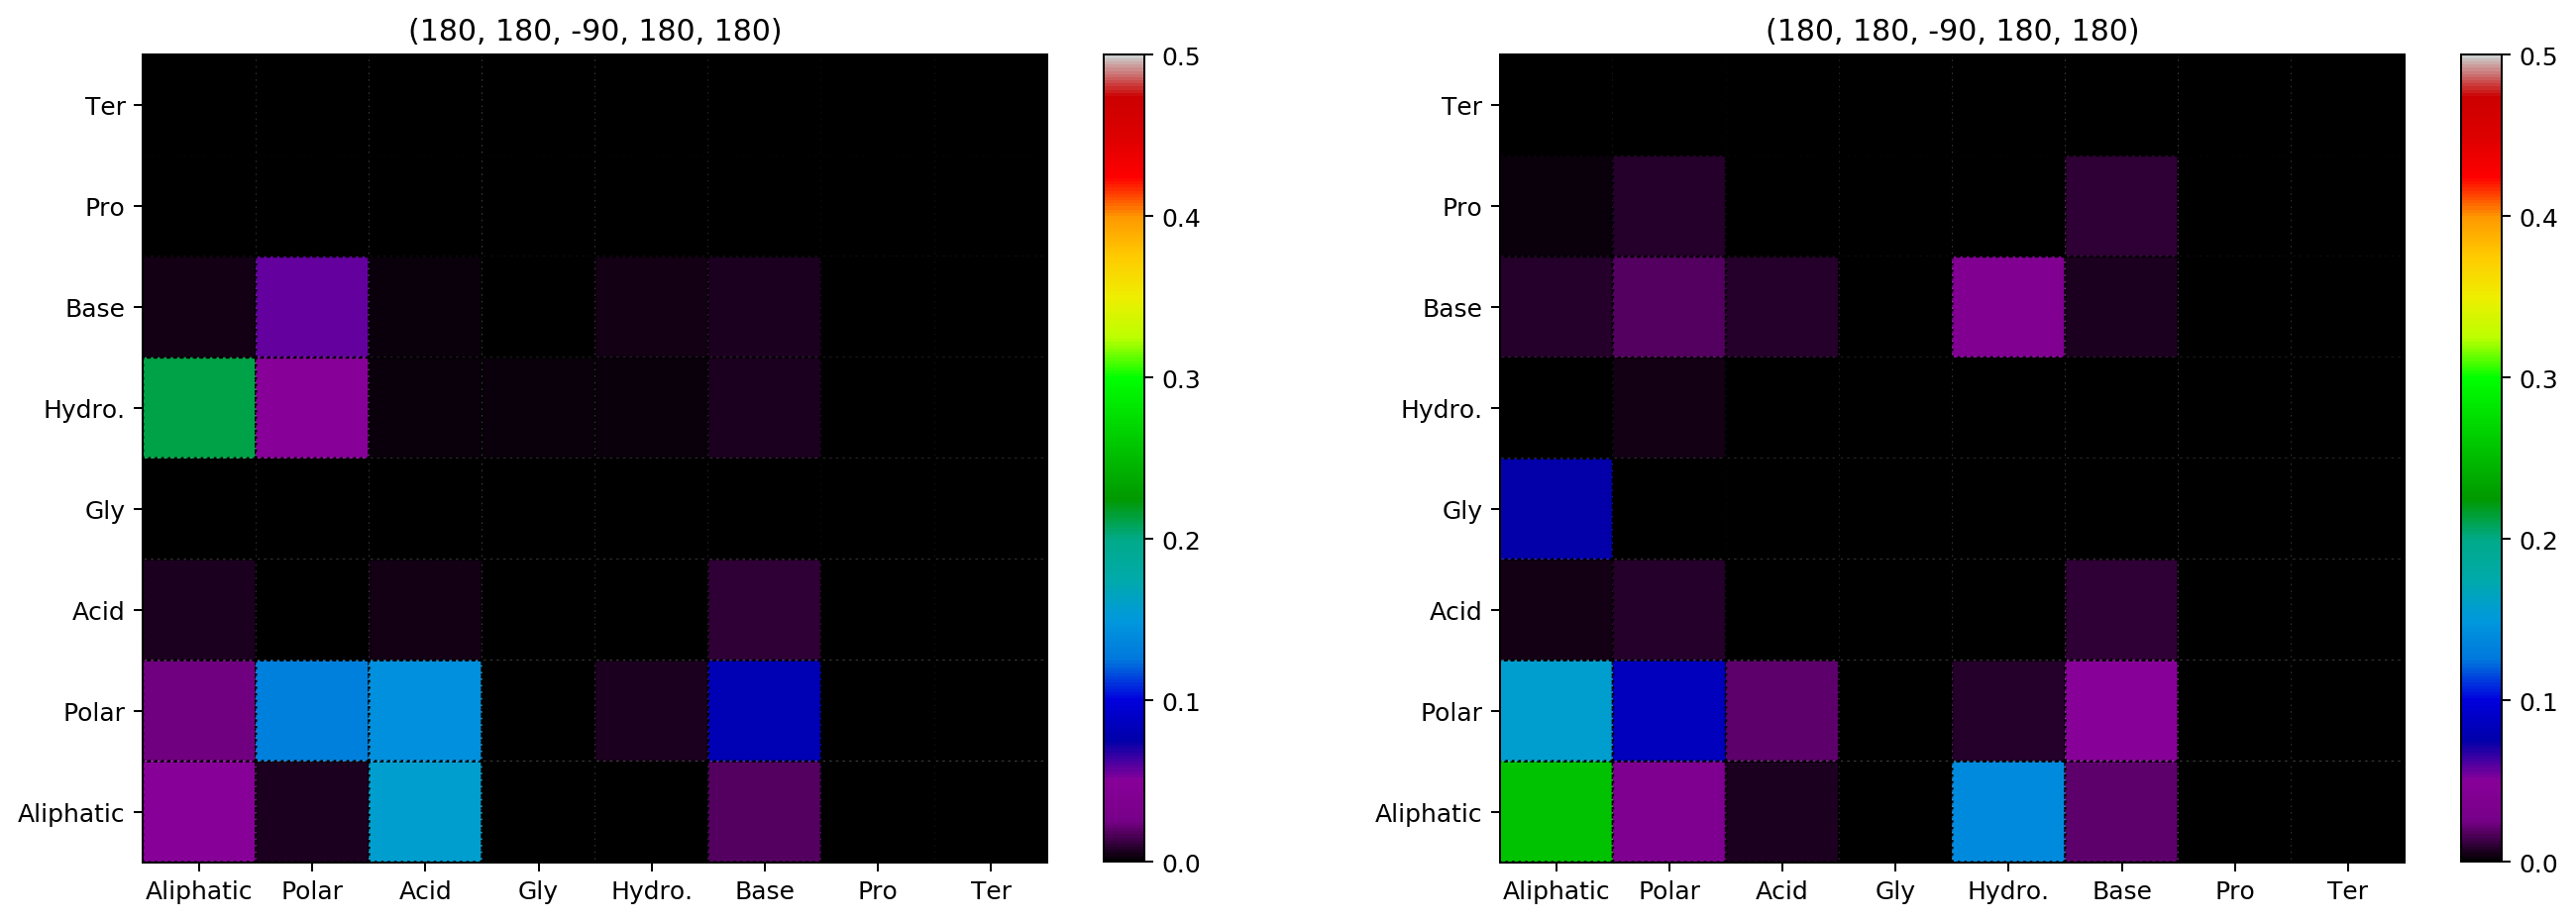

(180, 180, 90, 180, 180)


In [25]:
########################################################
# Frequency of Amino Acids By Biochemical Property
###########################################################
from matplotlib.pyplot import cm
import matplotlib as mpl
aminos=['A','R','N','D','c','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V','X']
aa_group_dict = {}

aa_group_dict = (dict.fromkeys(['D', 'E'], 'Acid'))
aa_group_dict.update(dict.fromkeys(['K', 'R','H'], 'Base'))
aa_group_dict.update(dict.fromkeys(['P'], 'Pro'))
aa_group_dict.update(dict.fromkeys(['G'], 'Gly'))
aa_group_dict.update(dict.fromkeys(['F', 'W','Y'], 'Hydro.'))
aa_group_dict.update(dict.fromkeys(['S', 'T','C','c','N','Q'], 'Polar'))
aa_group_dict.update(dict.fromkeys(['A', 'V','L','M','I'], 'Aliphatic'))
aa_group_dict.update(dict.fromkeys(['X'], 'Ter'))

group_list = []
for k,value in enumerate(aa_group_dict.values()):
    if value not in group_list:
        group_list.append(value)
amino_dict = {}
for k,value in enumerate(group_list):
    amino_dict[value]=k

def aa_group(aa):
    aa_biochem_group = aa_group_dict[aa]
    return aa_biochem_group

"""Assigning amino acid a number (1 to 20)"""

df['Cys1 b res group'] = df['Cys1 b res'].apply(aa_group)
df['Cys2 b res group'] = df['Cys2 b res'].apply(aa_group)
df['Cys1 a res group'] = df['Cys1 a res'].apply(aa_group)
df['Cys2 a res group'] = df['Cys2 a res'].apply(aa_group)   

def amino_heatmaps(amino_array,amino_array_cys2,config):
        plt.figure(figsize=(18, 6)) 
        fig = plt.subplot(1,2,1)
        
        amino_array=amino_array/np.sum(amino_array)
        amino_array_cys2=amino_array_cys2/np.sum(amino_array_cys2)
        
        for axis in [fig.xaxis, fig.yaxis]:
            axis.set(ticks=np.arange(0.5, len(group_list)), ticklabels=group_list)
        
        
        im = fig.pcolor(amino_array, cmap='nipy_spectral', edgecolor='black', linestyle=':', lw=1)
        im.set_clim(vmin=0,vmax =0.50)
        plt.title(config)
        plt.colorbar(im)
        
        #plt.figure(figsize=(18, 8)) 
        fig = plt.subplot(1,2,2)
        im = fig.pcolor(amino_array_cys2, cmap='nipy_spectral', edgecolor='black', linestyle=':', lw=1)
        im.set_clim(vmin=0,vmax =0.50)
        plt.colorbar(im)
        
        print config
        
        for axis in [fig.xaxis, fig.yaxis]:
            axis.set(ticks=np.arange(0.5, len(group_list)), ticklabels=group_list)
        plt.title(config)
        plt.savefig(str(config)+'amino_properties.png')
        plt.show()
        return()
#


def search_config(config):   
    config_dataframe = configuration_dataframe_return(config)
    if len(config_dataframe)> 75:
        amino_array = np.zeros(shape=(8,8))
        amino_array_cys2 = np.zeros(shape=(8,8))
        for index,row in config_dataframe.iterrows():
            cys1_b = row['Cys1 b res group']
            cys1_a = row['Cys1 a res group']
            cys2_b = row['Cys2 b res group']
            cys2_a = row['Cys2 a res group']
            amino_array[amino_dict[cys1_b],amino_dict[cys1_a]] = amino_array[amino_dict[cys1_b],amino_dict[cys1_a]]+1
            amino_array_cys2[amino_dict[cys2_b],amino_dict[cys2_a]] = amino_array_cys2[amino_dict[cys2_b],amino_dict[cys2_a]]+1
        amino_heatmaps(amino_array,amino_array_cys2,config)
    return()

for config in configurations:
    print config
    search_config(config)

### Frequency of Amino Acid by VDW Radi


### Hydrophobicity

### Frequency of amino acids by configuration

### Hydrogen Bonded 

### Individual X1 angle breakdown